In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import random
from sklearn.mixture import GaussianMixture as GMM
from scipy.stats import gompertz
from sklearn import mixture
import os
import re
from math import nan

from scipy import stats
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import astropy
from scipy.stats import norm
# import rpy2
import warnings
warnings.filterwarnings("ignore")

from random import sample

In [2]:
# def mixnorm(n,w,mu,sigma):
#     k = np.random.choice(len(w),n,replace = True, p = w)
#     s = []
#     for pos in k:
#         sim = np.random.normal(mu[pos], sigma[pos], 1)
#         s.append(np.rint(sim[0]))
# #         print(sim)
#     return s


# def sim_mixnorm(n,w,mu,sigma, data):
#     sim = []
#     i = 1
#     while i <=n:
#         s = mixnorm(1,w,mu,sigma)
#         if (s[0]>min(data) and s[0]<max(data)):
# #             return s[0]
#             sim.append(s[0])
#             i = i+1
#     return sim

In [3]:
# a = sim_mixnorm(n,w,mu,sigma, train1[feature])
# # a = mixnorm(n,w,mu,sigma)
# a

In [4]:
# def mixnorm(n,w,mu,sigma):
#     k = np.random.choice(len(w),n,replace = True, p = w)
#     s = []
#     for pos in k:
#         sim = np.random.normal(mu[pos], sigma[pos], 1)
#         s.append(sim[0])
# #         print(sim)
#     return s
# a = mixnorm(n,w,mu,sigma)
# plt.plot(a)

### Funciones para simulación de mezclas gaussianas

In [5]:
def clusters(data):
    #La función clusters() encuentra el númer óptimo de clústers basados en BIC, como máximo toma 4 clusters
    x = data.dropna().to_numpy().reshape(-1, 1)
    bics = [] #En donde se guardan los valores BIC
    min_bic = 0
    counter=1
    for i in range (4):
        # Generación de las mezclas gaussianas
        gmm = GMM(n_components = counter, max_iter=len(data), random_state=0, covariance_type = 'full')
        labels = gmm.fit(x).predict(x)
        bic = gmm.bic(x)
        bics.append(bic)
        if bic < min_bic or min_bic == 0:
            min_bic = bic
            opt_bic = counter
        counter = counter + 1
    print(f"El número óptimo de clústers es {opt_bic}")
    fig = plt.figure(figsize=(8, 3))
    plt.plot(np.arange(1,5), bics, 'o-', lw=3, c='black', label='BIC')
    plt.legend(frameon=False, fontsize=15)
    plt.xlabel('Número de clústers', fontsize=20)
    plt.show()
    return opt_bic

In [6]:
def mixnorm(n,w,mu,sigma, integ = True):
    #La función mixnorm() genera números aleatorios provenientes de mezcla gaussiana, como parámetros recibe:
    #n: cuantos número aleatorios se quieren simular
    #w: los pesos de la mezcla 
    #mu: las medias
    #sigma: las desviaciones estándar
    #integ = True, si se requiere que las simulaciones sean valores enteros
    
    #Si es una mezcla de 2 gaussianas, entonces k generaría una lista con ceros y unos según el peso w, sobre los cuales
    #se tomarán las medias y sigmas
    k = np.random.choice(len(w),n,replace = True, p = w)
    s = []
    for pos in k:
        #según el valor de k, tomará mu y sigma para simular el valor normal
        sim = np.random.normal(mu[pos], sigma[pos], 1)
        if integ == True:
            s.append(np.rint(sim[0]))
        else:
            s.append(sim[0])
    return s


def sim_mixnorm(n,w,mu,sigma, data, integ):
    #La función sim_mixnorm() genera números provenientes de una mezcla gaussiana topando los valores al minimo y máximo
    #de la data que recibe
    #Como parámetros recibe:
    #n: cuántos números aleatorios provenientes de la mezcla se quieren generar
    #w:los pesos de la mezcla 
    #mu: las medias
    #sigma: las desviaciones estándar
    #data: los datos desde los cuales se topan por arriba y abajo los valores a simular
    #integ = True, si se requiere que las simulaciones sean valores enteros    
    sim = []
    i = 1
    while i <=n:
        s = mixnorm(1,w,mu,sigma, integ)
        if (s[0]>min(data) and s[0]<max(data)):
            sim.append(s[0])
            i = i+1
    return sim

In [7]:
def mixed_normal_sim(data, state, feature, integ = True, zero = False):
    #La función mixed_normal_sim() genera simulaciones de una mezcla gaussiana. Recibe como parámetros:
    #data: la información sobre la cual se obtiene la densidad para después generar las mezclas gaussianas a partir de ella
    #state: el estado en el que estamos, solo sirve como bandera/titulo de los plots
    #feature: la variable sobre la cual se está iterando
    #integ = True, si se requiere que las simulaciones sean valores enteros
    #zero = Si la información puede contener valores cero
    print('_______')
    print(state)
    print('_______')
    #Primera visualización de la densidad de los datos
    plt.figure(figsize = (18, 3))
    sns.kdeplot(data, color = '#ffd514')
    plt.title(state +' '+feature + " distribution")
    print(f'{len(data)} registros')
    plt.show()
    print(f"Originalmente hay {data.isna().sum()} na's")
    if zero == False:
        data = np.select([data==0], [nan], default = data)
        data = pd.Series(data)
        print(f"Se tienen {data.isna().sum()} na's, convirtiendo ceros en na's")
    else:
        data = data
    #Summary de la informaciób    
    data = pd.Series(data)
    print(f"Información general: {data.describe()}")
    plt.figure(figsize = (18, 3))
    sns.kdeplot(data, color = '#ffd514')
    plt.title(state +' '+feature + " distribution")
    print(f'{len(data)-data.isna().sum()} registros')
    plt.show()
    
    #Visualización de los datos en diagrama de caja y como grafico de lineas
    plt.figure(figsize = (15,3))
    plt.subplot(121)
    sns.boxplot(data, color = 'lavender')
    plt.title(state +' '+feature )
    plt.subplot(122)
    plt.plot(data, color = 'lavender')
    plt.title(state +' '+feature )
    plt.show()
    
    #Obtención del número óptimo de clústers
    clust = clusters(data)
    
    data1 = data.dropna().to_numpy().reshape(-1, 1)
    #Mezcla Gaussiana según el numero óptimo de clústers
    g = mixture.GaussianMixture(n_components = clust, random_state=0, max_iter=200).fit(data1)
    #Generar el soporte de la densidad
    xpdf = np.linspace(min(data1), max(data1), len(data))
    #Densidad
    density = (np.exp(g.score(xpdf)))
    
    #Plot con el histograma y densidad de los datos originales; y guassianas ajustadas al histograma
    plt.figure(figsize = (8,3))
    for i in range(g.n_components):
        pdf = g.weights_[i]*stats.norm(g.means_[i,0],
                                      np.sqrt(g.covariances_[i,0])).pdf(xpdf)
        plt.fill(xpdf, pdf, facecolor = 'gray', edgecolor = 'none', alpha = 0.5)
        sns.kdeplot(data, color = '#ffd514')
        plt.hist(data, density = True, bins = 25, alpha = 0.05, color = 'b')
        plt.title(state +' '+feature)
        
    g_mixture = [0]*len(data)
    
    #Densidad de la mezcla
    for w in range(len(g.weights_)):
        g_mixture1 = g.weights_[w]*stats.norm(g.means_[w,0], np.sqrt(g.covariances_[w,0])).pdf(xpdf)
        for i in range(len(g_mixture1)):
            g_mixture[i] = (g_mixture[i] + g_mixture1[i])[0]
    g_mixture = np.array(g_mixture)
    
    #Histograma y densidad de los datos originales y densidad de la mezcla
    plt.figure(figsize = (8,3))
    sns.kdeplot(data, color = '#ffd514', label = 'original data')
    plt.hist(data, density = True, bins = 20, alpha = 0.2, color = 'plum')
    plt.title(f"{feature} distribution on {state}")
    plt.plot(xpdf,g_mixture, label = 'gaussian mixture', color = 'y')
    plt.legend()
    plt.show()
    
    #Una vez encontrados los parámetros y pesos de las mezclas, se simulan los datos con esa densidad
    mu =[]
    sigma = []
    w = []
    #Se simularan n datos donde n es el número de na's que la a información original
    n = data.isna().sum()
    for i in range(len(g.means_)):
        mu.append(g.means_[i,0])
        sigma.append((np.sqrt(g.covariances_[i,0]))[0])
        w.append(g.weights_[i])
    #Gráficos de los valores simulados    
    plt.figure(figsize = (8,3))    
    np.random.seed(0)
    simulation = sim_mixnorm(n,w,mu,sigma, data, integ)
    plt.hist(simulation,  bins = 20, density = True, label = 'simulation', alpha = 0.15, color = 'b')
    sns.kdeplot(simulation, label = 'density simulation')
    plt.title(f'Data simulation for {feature} data on {state}')
    plt.legend()
    plt.show()
    
    nans = pd.DataFrame(data)
    if zero == False:
        nans = list(nans[nans[0].isna()].index)
    else:
        nans = list(nans[nans[feature].isna()].index)
    inputed_data = data.copy()
    
    #Imputación de los valores simulados en los na's de la información original
    for k in nans:
        inputed_data[k] = np.random.choice(simulation,1, replace =False)[0]
    sns.kdeplot(inputed_data, label = 'Data with inputed values', color = 'gray')
    sns.kdeplot(data, color = '#ffd514', label = 'Original data')
    plt.hist(data, bins = 20, density = True, label = 'Original data hist', alpha = 0.15, color = 'b')
    plt.title(state +' '+feature + " distribution with inputed data")
    plt.legend()
    plt.show()
    
    #Plots de la información 'limpia'
    plt.figure(figsize = (15,3))
    plt.subplot(121)
    sns.boxplot(inputed_data, color = 'lavender')
    plt.title(state +' '+feature +' with inputed data' )
    plt.subplot(122)
    plt.plot(inputed_data)
    plt.title(state +' '+feature+' with inputed data' )
    plt.show()

    return inputed_data

## Simulación por variable

In [8]:
path = os.getcwd()
train = pd.read_csv(f'{path}\\train.csv', sep=',') 
train.head(1)

Year_Factor State_Factor building_class                 facility_type  \
0            1      State_1     Commercial  Grocery_store_or_food_market   

   floor_area  year_built  energy_star_rating  ELEVATION  january_min_temp  \
0     61242.0      1942.0                11.0        2.4                36   

   january_avg_temp  ...  days_above_80F  days_above_90F  days_above_100F  \
0              50.5  ...              14               0                0   

   days_above_110F  direction_max_wind_speed  direction_peak_wind_speed  \
0                0                       1.0                        1.0   

   max_wind_speed  days_with_fog    site_eui  id  
0             1.0            NaN  248.682615   0  

[1 rows x 64 columns]

In [9]:
#Valores faltantes
na = pd.DataFrame(train.isna().sum(), columns = ['na'])
na[na.na >0]

na
year_built                  1837
energy_star_rating         26709
direction_max_wind_speed   41082
direction_peak_wind_speed  41811
max_wind_speed             41082
days_with_fog              45796

In [10]:
train.describe()

Year_Factor    floor_area    year_built  energy_star_rating  \
count  75757.000000  7.575700e+04  73920.000000        49048.000000   
mean       4.367755  1.659839e+05   1952.306764           61.048605   
std        1.471441  2.468758e+05     37.053619           28.663683   
min        1.000000  9.430000e+02      0.000000            0.000000   
25%        3.000000  6.237900e+04   1927.000000           40.000000   
50%        5.000000  9.136700e+04   1951.000000           67.000000   
75%        6.000000  1.660000e+05   1977.000000           85.000000   
max        6.000000  6.385382e+06   2015.000000          100.000000   

          ELEVATION  january_min_temp  january_avg_temp  january_max_temp  \
count  75757.000000      75757.000000      75757.000000      75757.000000   
mean      39.506323         11.432343         34.310468         59.054952   
std       60.656596          9.381027          6.996108          5.355458   
min       -6.400000        -19.000000         10.806452         42.000000   
25%       11.900000          6.000000         29.827586         56.000000   
50%       25.000000         11.000000         34.451613         59.000000   
75%       42.700000         13.000000         37.322581         62.000000   
max     1924.500000         49.000000         64.758065         91.000000   

       february_min_temp  february_avg_temp  ...  days_above_80F  \
count       75757.000000       75757.000000  ...    75757.000000   
mean           11.720567          35.526837  ...       82.709809   
std            12.577272           8.866697  ...       25.282913   
min           -13.000000          13.250000  ...        0.000000   
25%             2.000000          31.625000  ...       72.000000   
50%             9.000000          34.107143  ...       84.000000   
75%            20.000000          40.879310  ...       97.000000   
max            48.000000          65.107143  ...      260.000000   

       days_above_90F  days_above_100F  days_above_110F  \
count    75757.000000     75757.000000     75757.000000   
mean        14.058701         0.279539         0.002442   
std         10.943996         2.252323         0.142140   
min          0.000000         0.000000         0.000000   
25%          6.000000         0.000000         0.000000   
50%         12.000000         0.000000         0.000000   
75%         17.000000         0.000000         0.000000   
max        185.000000       119.000000        16.000000   

       direction_max_wind_speed  direction_peak_wind_speed  max_wind_speed  \
count              34675.000000               33946.000000    34675.000000   
mean                  66.552675                  62.779974        4.190601   
std                  131.147834                 130.308106        6.458789   
min                    1.000000                   1.000000        1.000000   
25%                    1.000000                   1.000000        1.000000   
50%                    1.000000                   1.000000        1.000000   
75%                    1.000000                   1.000000        1.000000   
max                  360.000000                 360.000000       23.300000   

       days_with_fog      site_eui            id  
count   29961.000000  75757.000000  75757.000000  
mean      109.142051     82.584693  37878.000000  
std        50.699751     58.255403  21869.306509  
min        12.000000      1.001169      0.000000  
25%        88.000000     54.528601  18939.000000  
50%       104.000000     75.293716  37878.000000  
75%       131.000000     97.277534  56817.000000  
max       311.000000    997.866120  75756.000000  

[8 rows x 61 columns]

In [11]:
train1 = train[train.State_Factor == 'State_1']
train2 = train[train.State_Factor == 'State_2']
train4 = train[train.State_Factor == 'State_4']
train6 = train[train.State_Factor == 'State_6']
train8 = train[train.State_Factor == 'State_8']
train10 = train[train.State_Factor == 'State_10']
train11 = train[train.State_Factor == 'State_11']

In [12]:
t1index = list(train1.index)
t2index = list(train2.index)
t4index = list(train4.index)
t6index = list(train6.index)
t8index = list(train8.index)
t10index = list(train10.index)
t11index = list(train11.index)

In [13]:
path = os.getcwd()
test = pd.read_csv(f'{path}\\test.csv', sep=',') 
test.head(2)

Year_Factor State_Factor building_class                 facility_type  \
0            7      State_1     Commercial  Grocery_store_or_food_market   
1            7      State_1     Commercial  Grocery_store_or_food_market   

   floor_area  year_built  energy_star_rating  ELEVATION  january_min_temp  \
0     28484.0      1994.0                37.0        2.4                38   
1     21906.0      1961.0                55.0       45.7                38   

   january_avg_temp  ...  days_below_0F  days_above_80F  days_above_90F  \
0         50.596774  ...              0              29               5   
1         50.596774  ...              0              29               5   

   days_above_100F  days_above_110F  direction_max_wind_speed  \
0                2                0                       NaN   
1                2                0                       NaN   

   direction_peak_wind_speed  max_wind_speed  days_with_fog     id  
0                        NaN             NaN            NaN  75757  
1                        NaN             NaN            NaN  75758  

[2 rows x 63 columns]

In [14]:
#Valores faltantes
na = pd.DataFrame(test.isna().sum(), columns = ['na'])
na[na.na >0]

na
year_built                   92
energy_star_rating         2254
direction_max_wind_speed   8575
direction_peak_wind_speed  8575
max_wind_speed             8575
days_with_fog              9117

In [15]:
list(test.State_Factor.unique())

['State_1', 'State_2', 'State_4', 'State_8', 'State_11', 'State_10']

In [16]:
test1 = test[test.State_Factor == 'State_1']
test2 = test[test.State_Factor == 'State_2']
test4 = test[test.State_Factor == 'State_4']
test8 = test[test.State_Factor == 'State_8']
test10 = test[test.State_Factor == 'State_10']
test11 = test[test.State_Factor == 'State_11']

In [17]:
te1index = list(test1.index)
te2index = list(test2.index)
te4index = list(test4.index)
te8index = list(test8.index)
te10index = list(test10.index)
te11index = list(test11.index)

## floor_area

In [18]:
feature = 'floor_area'

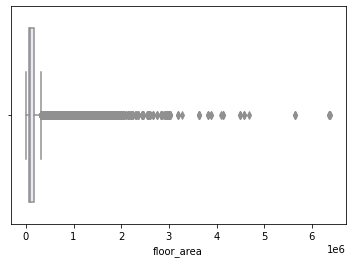

In [19]:
sns.boxplot(train[feature], color = 'lavender')
plt.show()

In [20]:
train[feature].describe()

count    7.575700e+04
mean     1.659839e+05
std      2.468758e+05
min      9.430000e+02
25%      6.237900e+04
50%      9.136700e+04
75%      1.660000e+05
max      6.385382e+06
Name: floor_area, dtype: float64

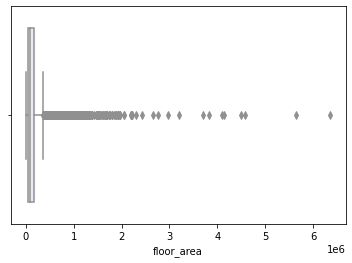

In [21]:
sns.boxplot(test[feature], color = 'lavender')
plt.show()

In [22]:
test[feature].describe()

count    9.705000e+03
mean     1.632143e+05
std      2.624759e+05
min      5.982000e+03
25%      4.802000e+04
50%      8.248600e+04
75%      1.775200e+05
max      6.353396e+06
Name: floor_area, dtype: float64

## ELEVATION

In [23]:
feature = 'ELEVATION'

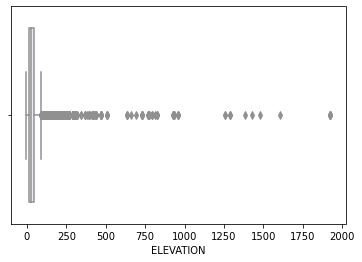

In [24]:
sns.boxplot(train[feature], color = 'lavender')
plt.show()

In [25]:
train[feature].describe()

count    75757.000000
mean        39.506323
std         60.656596
min         -6.400000
25%         11.900000
50%         25.000000
75%         42.700000
max       1924.500000
Name: ELEVATION, dtype: float64

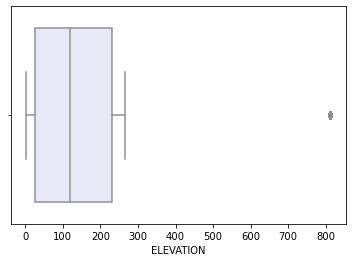

In [26]:
sns.boxplot(test[feature], color = 'lavender')
plt.show()

In [27]:
test[feature].describe()

count    9705.000000
mean      205.231190
std       264.822814
min         1.800000
25%        26.500000
50%       118.900000
75%       231.300000
max       812.000000
Name: ELEVATION, dtype: float64

## temp variables

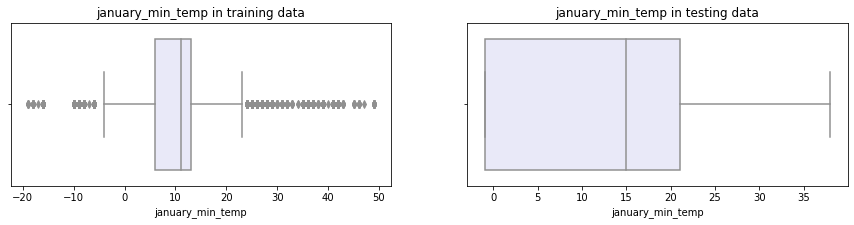

Summary for training: count    75757.000000
mean        11.432343
std          9.381027
min        -19.000000
25%          6.000000
50%         11.000000
75%         13.000000
max         49.000000
Name: january_min_temp, dtype: float64
Summary for testing: count    9705.000000
mean       13.520762
std        12.458365
min        -1.000000
25%        -1.000000
50%        15.000000
75%        21.000000
max        38.000000
Name: january_min_temp, dtype: float64


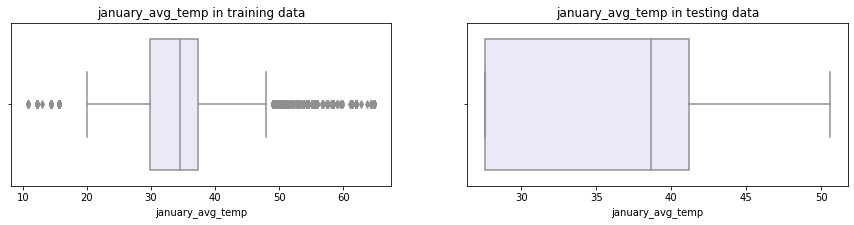

Summary for training: count    75757.000000
mean        34.310468
std          6.996108
min         10.806452
25%         29.827586
50%         34.451613
75%         37.322581
max         64.758065
Name: january_avg_temp, dtype: float64
Summary for testing: count    9705.000000
mean       36.678081
std         6.968520
min        27.548387
25%        27.548387
50%        38.661290
75%        41.177419
max        50.596774
Name: january_avg_temp, dtype: float64


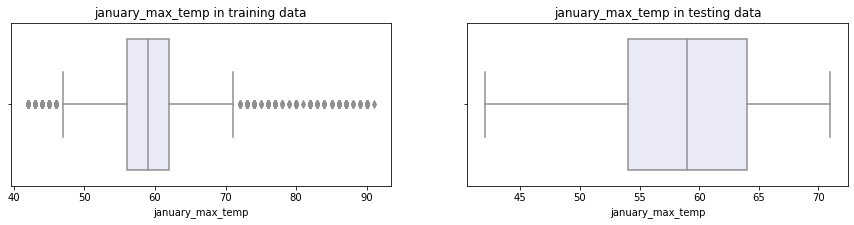

Summary for training: count    75757.000000
mean        59.054952
std          5.355458
min         42.000000
25%         56.000000
50%         59.000000
75%         62.000000
max         91.000000
Name: january_max_temp, dtype: float64
Summary for testing: count    9705.000000
mean       60.008449
std         5.874699
min        42.000000
25%        54.000000
50%        59.000000
75%        64.000000
max        71.000000
Name: january_max_temp, dtype: float64


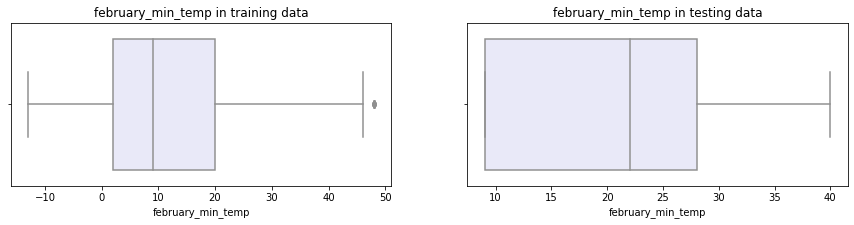

Summary for training: count    75757.000000
mean        11.720567
std         12.577272
min        -13.000000
25%          2.000000
50%          9.000000
75%         20.000000
max         48.000000
Name: february_min_temp, dtype: float64
Summary for testing: count    9705.000000
mean       21.705100
std         9.774624
min         9.000000
25%         9.000000
50%        22.000000
75%        28.000000
max        40.000000
Name: february_min_temp, dtype: float64


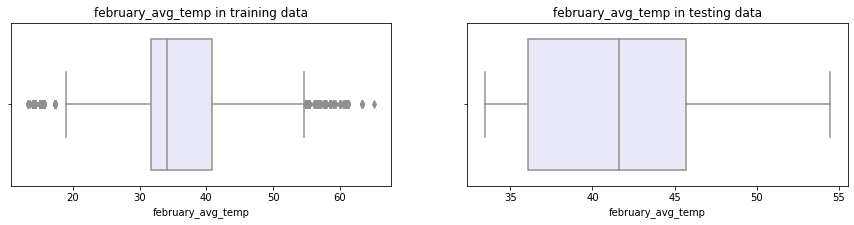

Summary for training: count    75757.000000
mean        35.526837
std          8.866697
min         13.250000
25%         31.625000
50%         34.107143
75%         40.879310
max         65.107143
Name: february_avg_temp, dtype: float64
Summary for testing: count    9705.000000
mean       41.634886
std         5.528689
min        33.428571
25%        36.053571
50%        41.625000
75%        45.685185
max        54.482143
Name: february_avg_temp, dtype: float64


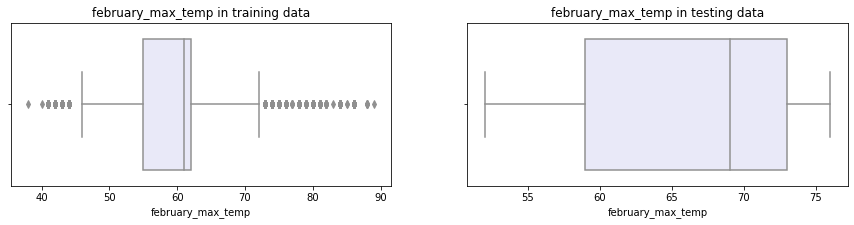

Summary for training: count    75757.000000
mean        58.486278
std          8.414611
min         38.000000
25%         55.000000
50%         61.000000
75%         62.000000
max         89.000000
Name: february_max_temp, dtype: float64
Summary for testing: count    9705.000000
mean       66.940958
std         6.397885
min        52.000000
25%        59.000000
50%        69.000000
75%        73.000000
max        76.000000
Name: february_max_temp, dtype: float64


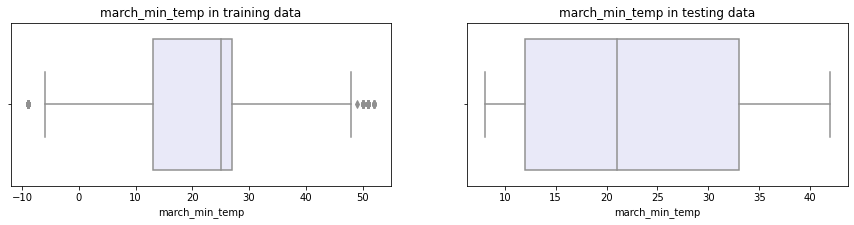

Summary for training: count    75757.000000
mean        21.606281
std         10.004303
min         -9.000000
25%         13.000000
50%         25.000000
75%         27.000000
max         52.000000
Name: march_min_temp, dtype: float64
Summary for testing: count    9705.000000
mean       23.146419
std        11.553421
min         8.000000
25%        12.000000
50%        21.000000
75%        33.000000
max        42.000000
Name: march_min_temp, dtype: float64


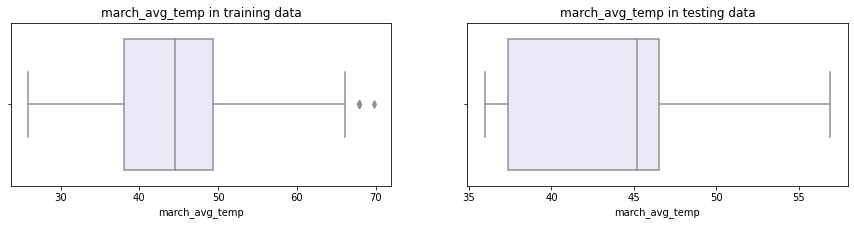

Summary for training: count    75757.000000
mean        44.469292
std          6.657142
min         25.854839
25%         38.096774
50%         44.516129
75%         49.354839
max         69.758065
Name: march_avg_temp, dtype: float64
Summary for testing: count    9705.000000
mean       43.568863
std         6.321471
min        35.935484
25%        37.354839
50%        45.216667
75%        46.500000
max        56.935484
Name: march_avg_temp, dtype: float64


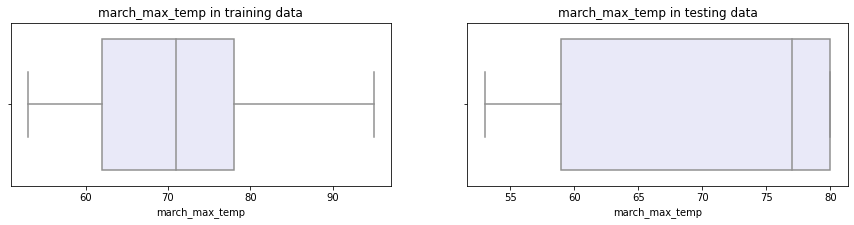

Summary for training: count    75757.000000
mean        70.897831
std          7.680982
min         53.000000
25%         62.000000
50%         71.000000
75%         78.000000
max         95.000000
Name: march_max_temp, dtype: float64
Summary for testing: count    9705.000000
mean       71.160639
std         9.369843
min        53.000000
25%        59.000000
50%        77.000000
75%        80.000000
max        80.000000
Name: march_max_temp, dtype: float64


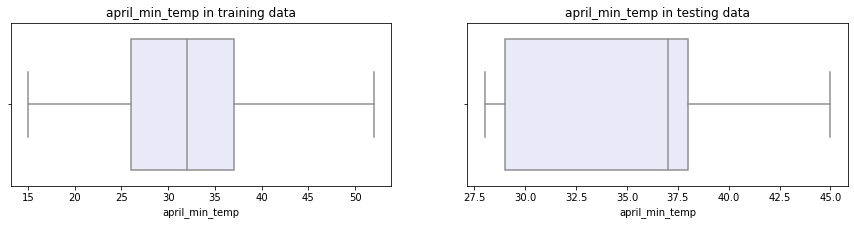

Summary for training: count    75757.000000
mean        32.037171
std          5.577279
min         15.000000
25%         26.000000
50%         32.000000
75%         37.000000
max         52.000000
Name: april_min_temp, dtype: float64
Summary for testing: count    9705.000000
mean       34.715920
std         5.395467
min        28.000000
25%        29.000000
50%        37.000000
75%        38.000000
max        45.000000
Name: april_min_temp, dtype: float64


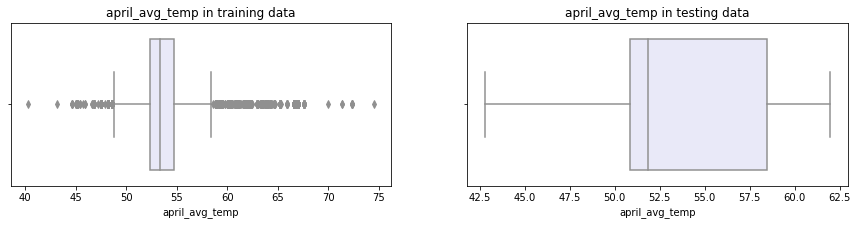

Summary for training: count    75757.000000
mean        53.784863
std          2.500473
min         40.280000
25%         52.333333
50%         53.333333
75%         54.766667
max         74.500000
Name: april_avg_temp, dtype: float64
Summary for testing: count    9705.000000
mean       54.208665
std         4.162475
min        42.766667
25%        50.833333
50%        51.857143
75%        58.450000
max        61.983333
Name: april_avg_temp, dtype: float64


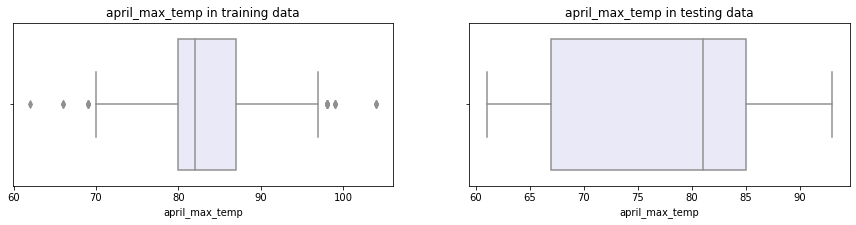

Summary for training: count    75757.000000
mean        82.661932
std          4.101028
min         62.000000
25%         80.000000
50%         82.000000
75%         87.000000
max        104.000000
Name: april_max_temp, dtype: float64
Summary for testing: count    9705.000000
mean       78.395775
std         9.263683
min        61.000000
25%        67.000000
50%        81.000000
75%        85.000000
max        93.000000
Name: april_max_temp, dtype: float64


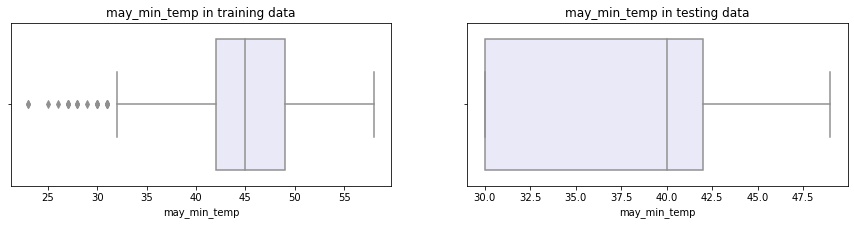

Summary for training: count    75757.000000
mean        44.706179
std          4.200319
min         23.000000
25%         42.000000
50%         45.000000
75%         49.000000
max         58.000000
Name: may_min_temp, dtype: float64
Summary for testing: count    9705.000000
mean       38.720041
std         5.956980
min        30.000000
25%        30.000000
50%        40.000000
75%        42.000000
max        49.000000
Name: may_min_temp, dtype: float64


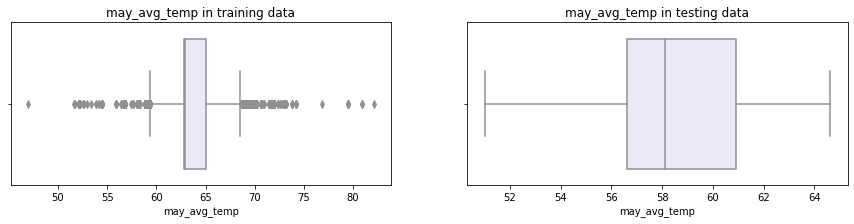

Summary for training: count    75757.000000
mean        63.742547
std          2.792919
min         46.950000
25%         62.790323
50%         62.887097
75%         65.096774
max         82.112903
Name: may_avg_temp, dtype: float64
Summary for testing: count    9705.000000
mean       59.170865
std         2.729821
min        51.000000
25%        56.596774
50%        58.112903
75%        60.903226
max        64.629032
Name: may_avg_temp, dtype: float64


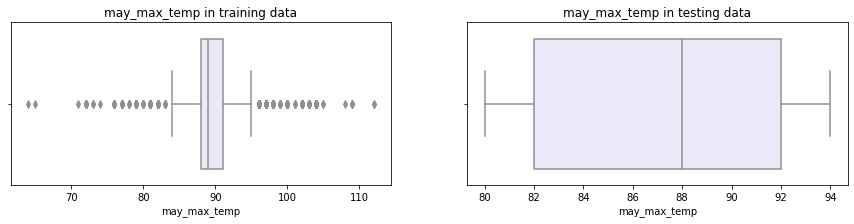

Summary for training: count    75757.000000
mean        88.987856
std          2.864669
min         64.000000
25%         88.000000
50%         89.000000
75%         91.000000
max        112.000000
Name: may_max_temp, dtype: float64
Summary for testing: count    9705.000000
mean       87.359093
std         4.449191
min        80.000000
25%        82.000000
50%        88.000000
75%        92.000000
max        94.000000
Name: may_max_temp, dtype: float64


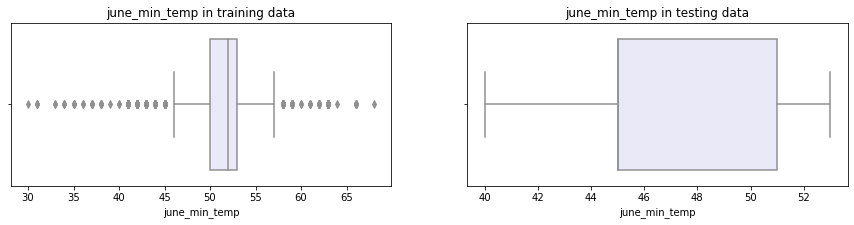

Summary for training: count    75757.000000
mean        51.131763
std          3.415926
min         30.000000
25%         50.000000
50%         52.000000
75%         53.000000
max         68.000000
Name: june_min_temp, dtype: float64
Summary for testing: count    9705.000000
mean       45.991860
std         3.500417
min        40.000000
25%        45.000000
50%        45.000000
75%        51.000000
max        53.000000
Name: june_min_temp, dtype: float64


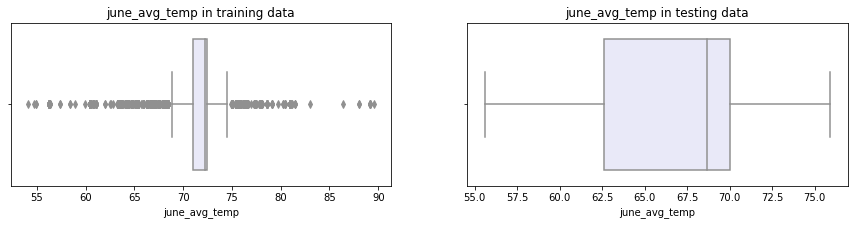

Summary for training: count    75757.000000
mean        71.066384
std          2.861681
min         54.100000
25%         70.983333
50%         72.250000
75%         72.450000
max         89.550000
Name: june_avg_temp, dtype: float64
Summary for testing: count    9705.000000
mean       67.560717
std         4.890466
min        55.583333
25%        62.583333
50%        68.689655
75%        70.033333
max        75.916667
Name: june_avg_temp, dtype: float64


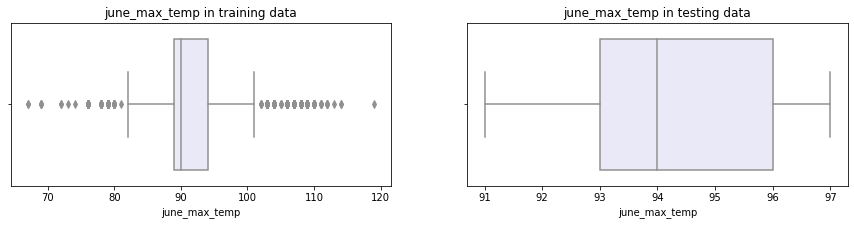

Summary for training: count    75757.000000
mean        91.400280
std          3.604068
min         67.000000
25%         89.000000
50%         90.000000
75%         94.000000
max        119.000000
Name: june_max_temp, dtype: float64
Summary for testing: count    9705.000000
mean       93.926945
std         1.758773
min        91.000000
25%        93.000000
50%        94.000000
75%        96.000000
max        97.000000
Name: june_max_temp, dtype: float64


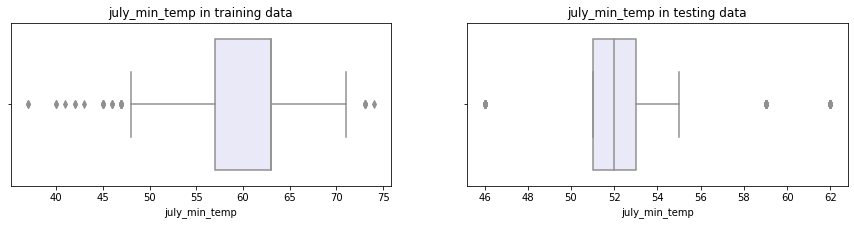

Summary for training: count    75757.000000
mean        60.571604
std          4.177109
min         37.000000
25%         57.000000
50%         63.000000
75%         63.000000
max         74.000000
Name: july_min_temp, dtype: float64
Summary for testing: count    9705.000000
mean       53.061721
std         2.843906
min        46.000000
25%        51.000000
50%        52.000000
75%        53.000000
max        62.000000
Name: july_min_temp, dtype: float64


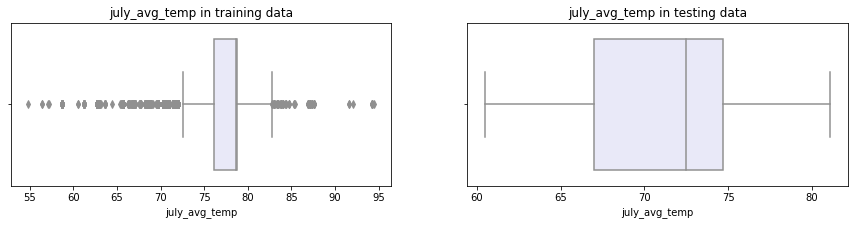

Summary for training: count    75757.000000
mean        76.596879
std          4.090275
min         54.822581
25%         76.145161
50%         78.677419
75%         78.790323
max         94.435484
Name: july_avg_temp, dtype: float64
Summary for testing: count    9705.000000
mean       71.433595
std         5.391688
min        60.467742
25%        67.016129
50%        72.483871
75%        74.677419
max        81.083333
Name: july_avg_temp, dtype: float64


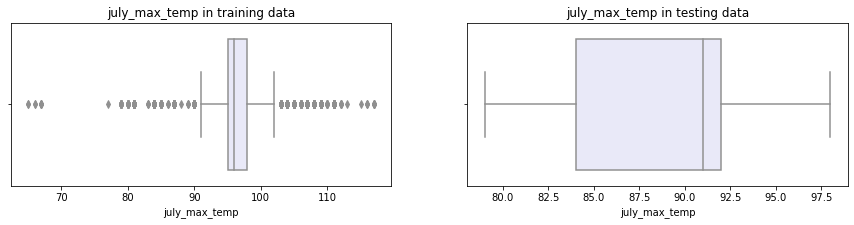

Summary for training: count    75757.000000
mean        95.543950
std          4.157118
min         65.000000
25%         95.000000
50%         96.000000
75%         98.000000
max        117.000000
Name: july_max_temp, dtype: float64
Summary for testing: count    9705.000000
mean       89.392581
std         5.116091
min        79.000000
25%        84.000000
50%        91.000000
75%        92.000000
max        98.000000
Name: july_max_temp, dtype: float64


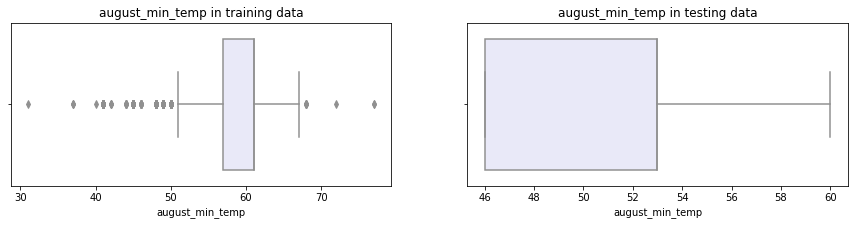

Summary for training: count    75757.000000
mean        58.515068
std          4.441992
min         31.000000
25%         57.000000
50%         61.000000
75%         61.000000
max         77.000000
Name: august_min_temp, dtype: float64
Summary for testing: count    9705.000000
mean       52.151984
std         4.540679
min        46.000000
25%        46.000000
50%        53.000000
75%        53.000000
max        60.000000
Name: august_min_temp, dtype: float64


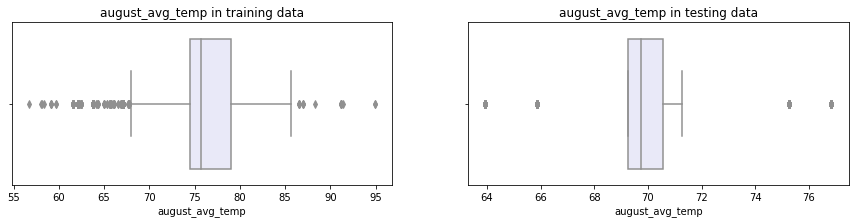

Summary for training: count    75757.000000
mean        75.348749
std          3.818895
min         56.693548
25%         74.516129
50%         75.725806
75%         78.967742
max         94.903226
Name: august_avg_temp, dtype: float64
Summary for testing: count    9705.000000
mean       70.449585
std         3.079811
min        63.946429
25%        69.274194
50%        69.741935
75%        70.564516
max        76.838710
Name: august_avg_temp, dtype: float64


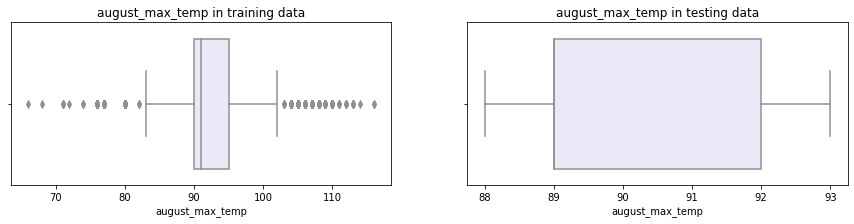

Summary for training: count    75757.000000
mean        92.572581
std          4.139685
min         66.000000
25%         90.000000
50%         91.000000
75%         95.000000
max        116.000000
Name: august_max_temp, dtype: float64
Summary for testing: count    9705.000000
mean       90.545183
std         1.815490
min        88.000000
25%        89.000000
50%        89.000000
75%        92.000000
max        93.000000
Name: august_max_temp, dtype: float64


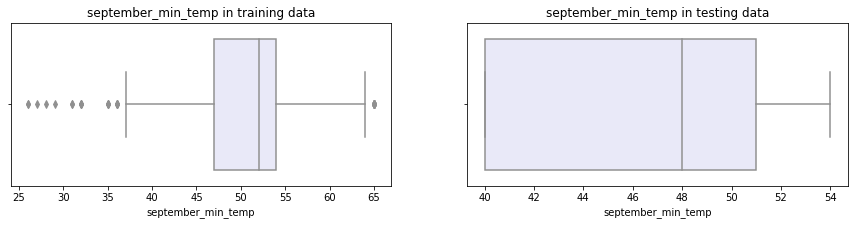

Summary for training: count    75757.000000
mean        50.791689
std          4.290884
min         26.000000
25%         47.000000
50%         52.000000
75%         54.000000
max         65.000000
Name: september_min_temp, dtype: float64
Summary for testing: count    9705.000000
mean       45.989490
std         5.158683
min        40.000000
25%        40.000000
50%        48.000000
75%        51.000000
max        54.000000
Name: september_min_temp, dtype: float64


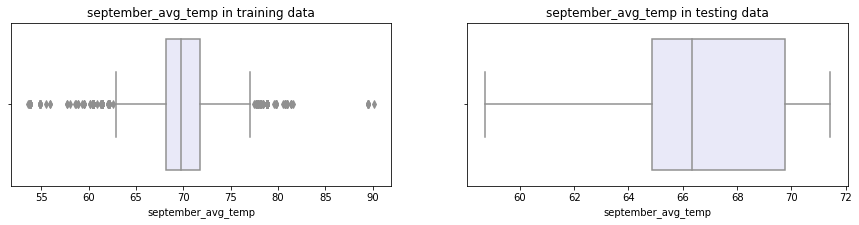

Summary for training: count    75757.000000
mean        69.597545
std          3.603773
min         53.600000
25%         68.200000
50%         69.733333
75%         71.800000
max         90.116667
Name: september_avg_temp, dtype: float64
Summary for testing: count    9705.000000
mean       66.947623
std         2.330802
min        58.700000
25%        64.866667
50%        66.333333
75%        69.766667
max        71.433333
Name: september_avg_temp, dtype: float64


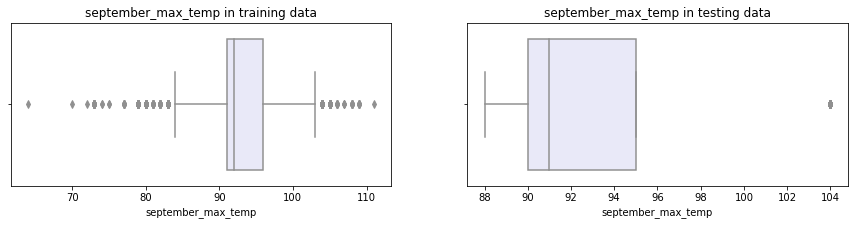

Summary for training: count    75757.000000
mean        92.171139
std          5.011708
min         64.000000
25%         91.000000
50%         92.000000
75%         96.000000
max        111.000000
Name: september_max_temp, dtype: float64
Summary for testing: count    9705.000000
mean       93.104894
std         4.247122
min        88.000000
25%        90.000000
50%        91.000000
75%        95.000000
max       104.000000
Name: september_max_temp, dtype: float64


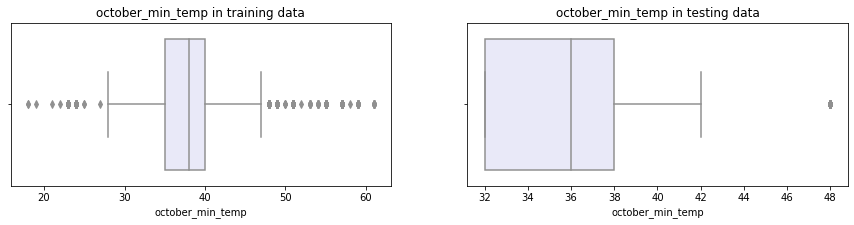

Summary for training: count    75757.000000
mean        38.210911
std          5.093899
min         18.000000
25%         35.000000
50%         38.000000
75%         40.000000
max         61.000000
Name: october_min_temp, dtype: float64
Summary for testing: count    9705.000000
mean       36.179907
std         4.645734
min        32.000000
25%        32.000000
50%        36.000000
75%        38.000000
max        48.000000
Name: october_min_temp, dtype: float64


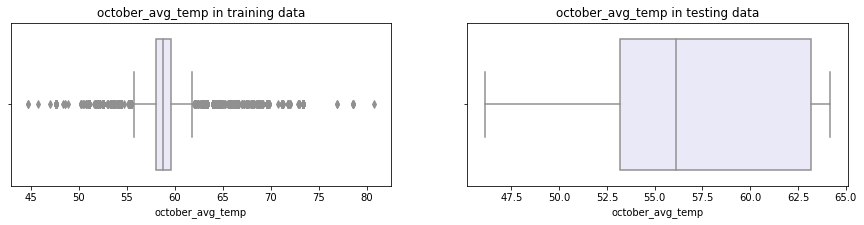

Summary for training: count    75757.000000
mean        58.727038
std          2.641300
min         44.693548
25%         58.048387
50%         58.758065
75%         59.629032
max         80.741935
Name: october_avg_temp, dtype: float64
Summary for testing: count    9705.000000
mean       57.384655
std         4.163043
min        46.096774
25%        53.177419
50%        56.112903
75%        63.160714
max        64.193548
Name: october_avg_temp, dtype: float64


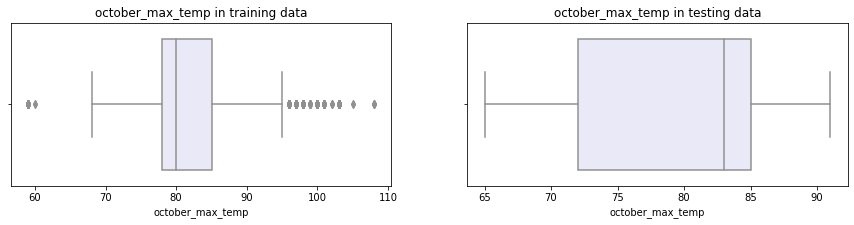

Summary for training: count    75757.000000
mean        81.135671
std          5.579513
min         59.000000
25%         78.000000
50%         80.000000
75%         85.000000
max        108.000000
Name: october_max_temp, dtype: float64
Summary for testing: count    9705.000000
mean       80.440392
std         6.501742
min        65.000000
25%        72.000000
50%        83.000000
75%        85.000000
max        91.000000
Name: october_max_temp, dtype: float64


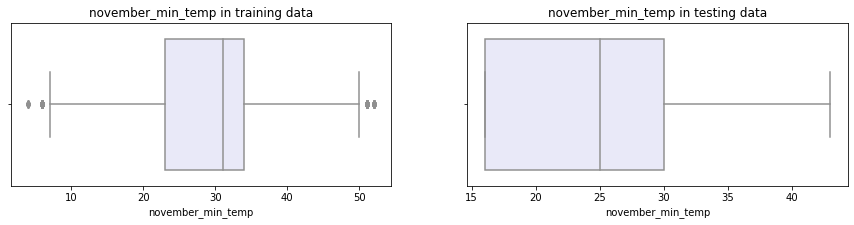

Summary for training: count    75757.000000
mean        28.630397
std          7.153244
min          4.000000
25%         23.000000
50%         31.000000
75%         34.000000
max         52.000000
Name: november_min_temp, dtype: float64
Summary for testing: count    9705.000000
mean       25.163627
std         8.502825
min        16.000000
25%        16.000000
50%        25.000000
75%        30.000000
max        43.000000
Name: november_min_temp, dtype: float64


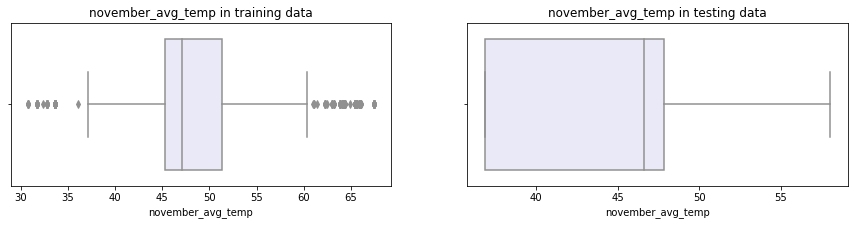

Summary for training: count    75757.000000
mean        48.123133
std          4.094207
min         30.766667
25%         45.250000
50%         47.116667
75%         51.339286
max         67.416667
Name: november_avg_temp, dtype: float64
Summary for testing: count    9705.000000
mean       44.772780
std         6.270954
min        36.850000
25%        36.850000
50%        46.616667
75%        47.833333
max        58.050000
Name: november_avg_temp, dtype: float64


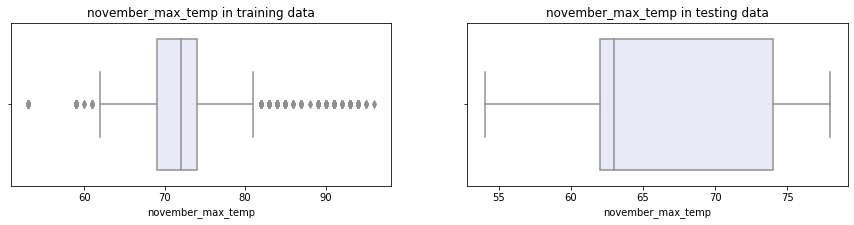

Summary for training: count    75757.000000
mean        71.202397
std          4.373374
min         53.000000
25%         69.000000
50%         72.000000
75%         74.000000
max         96.000000
Name: november_max_temp, dtype: float64
Summary for testing: count    9705.000000
mean       67.195878
std         6.215263
min        54.000000
25%        62.000000
50%        63.000000
75%        74.000000
max        78.000000
Name: november_max_temp, dtype: float64


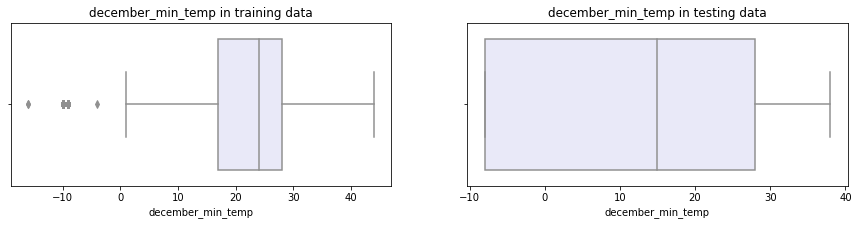

Summary for training: count    75757.000000
mean        22.736777
std          9.014047
min        -16.000000
25%         17.000000
50%         24.000000
75%         28.000000
max         44.000000
Name: december_min_temp, dtype: float64
Summary for testing: count    9705.000000
mean       14.127357
std        16.447838
min        -8.000000
25%        -8.000000
50%        15.000000
75%        28.000000
max        38.000000
Name: december_min_temp, dtype: float64


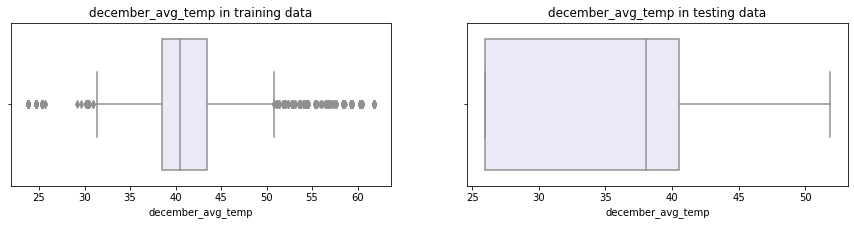

Summary for training: count    75757.000000
mean        41.625569
std          5.869386
min         23.790323
25%         38.532258
50%         40.516129
75%         43.435484
max         61.790323
Name: december_avg_temp, dtype: float64
Summary for testing: count    9705.000000
mean       36.065571
std         8.112306
min        25.919355
25%        25.919355
50%        38.048387
75%        40.532258
max        51.887097
Name: december_avg_temp, dtype: float64


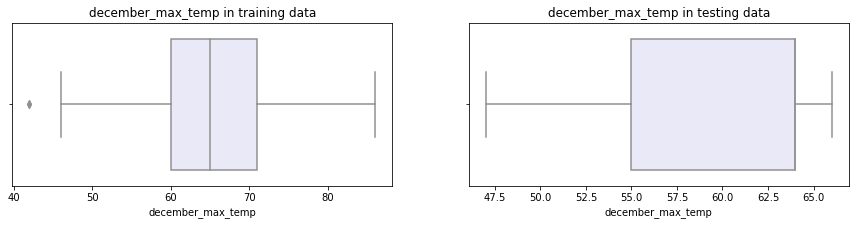

Summary for training: count    75757.000000
mean        64.496852
std          6.054104
min         42.000000
25%         60.000000
50%         65.000000
75%         71.000000
max         86.000000
Name: december_max_temp, dtype: float64
Summary for testing: count    9705.000000
mean       60.251726
std         4.538741
min        47.000000
25%        55.000000
50%        64.000000
75%        64.000000
max        66.000000
Name: december_max_temp, dtype: float64


In [28]:
no_temp = ['Year_Factor', 'State_Factor', 'building_class', 'facility_type', 'floor_area', 'year_built', 'energy_star_rating', 
           'ELEVATION', 'cooling_degree_days', 'heating_degree_days', 'precipitation_inches', 'snowfall_inches', 
           'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F', 'days_below_10F', 'days_below_0F', 
           'days_above_80F', 'days_above_90F', 'days_above_100F', 'days_above_110F', 'direction_max_wind_speed',
           'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog', 'site_eui', 'id']
temp = train.columns
temp = [x for x in temp if x not in no_temp]

for temp_var in temp:
    plt.figure(figsize = (15,3))
    plt.subplot(121)
    sns.boxplot(train[temp_var], color = 'lavender')
    plt.title(f"{temp_var} in training data")
    plt.subplot(122)
    sns.boxplot(test[temp_var], color = 'lavender')  
    plt.title(f"{temp_var} in testing data")
    plt.show()
    print(f"Summary for training: {train[temp_var].describe()}")
    print(f"Summary for testing: {test[temp_var].describe()}")

## cooling_degree_days

In [29]:
feature = 'cooling_degree_days'

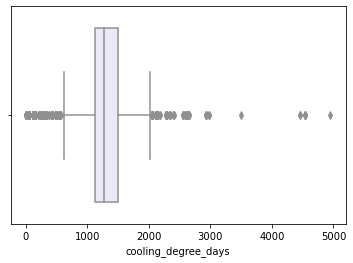

In [30]:
sns.boxplot(train[feature], color = 'lavender')
plt.show()

In [31]:
train[feature].describe()

count    75757.000000
mean      1202.250446
std        391.561780
min          0.000000
25%       1128.000000
50%       1277.000000
75%       1489.000000
max       4948.000000
Name: cooling_degree_days, dtype: float64

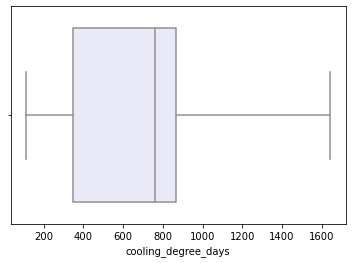

In [32]:
sns.boxplot(test[feature], color = 'lavender')
plt.show()

In [33]:
test[feature].describe()

count    9705.000000
mean      733.361875
std       452.168118
min       110.000000
25%       345.000000
50%       761.000000
75%       866.000000
max      1643.000000
Name: cooling_degree_days, dtype: float64

## heating_degree_days

In [34]:
feature = 'heating_degree_days'

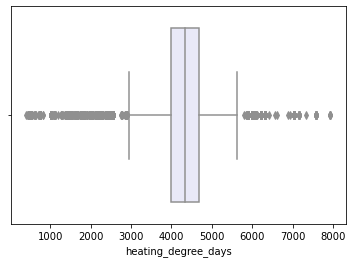

In [35]:
sns.boxplot(train[feature], color = 'lavender')
plt.show()

In [36]:
train[feature].describe()

count    75757.000000
mean      4324.957390
std        824.366727
min        398.000000
25%       3978.000000
50%       4337.000000
75%       4670.000000
max       7929.000000
Name: heating_degree_days, dtype: float64

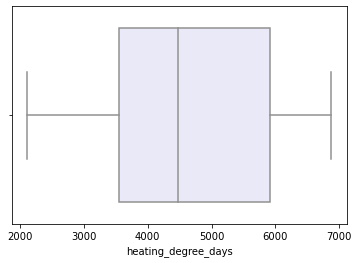

In [37]:
sns.boxplot(test[feature], color = 'lavender')
plt.show()

In [38]:
test[feature].describe()

count    9705.000000
mean     4565.202061
std      1165.539843
min      2112.000000
25%      3555.000000
50%      4478.000000
75%      5907.000000
max      6877.000000
Name: heating_degree_days, dtype: float64

## precipitation_inches*
precipitación anual en pulgadas en la ubicación del edificio

In [39]:
feature = 'precipitation_inches'

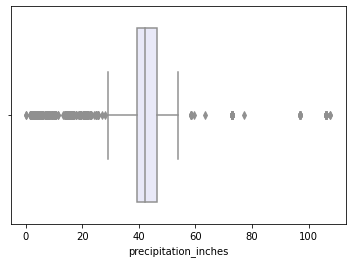

In [40]:
sns.boxplot(train[feature], color = 'lavender')
plt.show()

In [41]:
train[feature].describe()

count    75757.000000
mean        42.430651
std         10.592205
min          0.000000
25%         39.350000
50%         42.170000
75%         46.320000
max        107.690000
Name: precipitation_inches, dtype: float64

In [42]:
train[feature].isna().sum()

0

In [43]:
#Solo se imputan valores en los estados donde hay observaciones mayores a q3+1.5*RI y se hace con dicho valor
list(train[train[feature]>np.nanpercentile(train[feature],75)+1.5*(np.nanpercentile(train[feature],75) - np.nanpercentile(train[feature],25))]['State_Factor'].unique())

['State_1', 'State_6', 'State_11']

In [44]:
#Solo el 2%de los datos serán imputados
len(train[train[feature]>np.nanpercentile(train[feature],75)+1.5*(np.nanpercentile(train[feature],75) - np.nanpercentile(train[feature],25))][feature])/len(train)

0.02366777987512705

In [45]:
t1s = np.select([train1[feature]>np.percentile(train1[feature],75)+1.5*(np.percentile(train1[feature],75) - np.percentile(train1[feature],25))], 
                [np.percentile(train1[feature],75)+1.5*(np.percentile(train1[feature],75) - np.percentile(train1[feature],25))], 
                default = train1[feature])
t6s = np.select([train6[feature]>np.percentile(train6[feature],75)+1.5*(np.percentile(train6[feature],75) - np.percentile(train6[feature],25))], 
                [np.percentile(train6[feature],75)+1.5*(np.percentile(train6[feature],75) - np.percentile(train6[feature],25))], 
                default = train6[feature])
t11s = np.select([train11[feature]>np.percentile(train11[feature],75)+1.5*(np.percentile(train11[feature],75) - np.percentile(train11[feature],25))], 
                [np.percentile(train11[feature],75)+1.5*(np.percentile(train11[feature],75) - np.percentile(train11[feature],25))], 
                default = train11[feature])

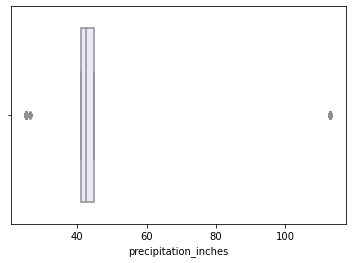

In [46]:
sns.boxplot(test[feature], color = 'lavender')
plt.show()

In [47]:
test[feature].describe()

count    9705.000000
mean       41.586885
std         7.031357
min        25.240000
25%        41.060000
50%        42.550000
75%        44.830000
max       112.920000
Name: precipitation_inches, dtype: float64

In [48]:
#Solo se imputan valores en los estados donde hay observaciones mayores a q3+1.5*RI y se hace con dicho valor
list(test[test[feature]>np.nanpercentile(test[feature],75)+1.5*(np.nanpercentile(test[feature],75) - np.nanpercentile(test[feature],25))]['State_Factor'].unique())

['State_11']

In [49]:
#Solo el .3%de los datos serán imputados
len(test[test[feature]>np.nanpercentile(test[feature],75)+1.5*(np.nanpercentile(test[feature],75) - np.nanpercentile(test[feature],25))][feature])/len(test)

0.003297269448737764

In [50]:
te11s = np.select([test11[feature]>np.percentile(test11[feature],75)+1.5*(np.percentile(test11[feature],75) - np.percentile(test11[feature],25))], 
                [np.percentile(test11[feature],75)+1.5*(np.percentile(test11[feature],75) - np.percentile(test11[feature],25))], 
                default = test11[feature])

In [51]:
#Imputación training
counter = 0
for i in t1index:
    train1[feature][i] = t1s[counter]
    counter = counter+1

counter = 0
for i in t6index:
    train6[feature][i] = t6s[counter]
    counter = counter+1
    
counter = 0
for i in t11index:
    train11[feature][i] = t11s[counter]
    counter = counter+1
    
    
#Imputación testing    
counter = 0
for i in te11index:
    test11[feature][i] = te11s[counter]
    counter = counter+1

## snow*
snowfall_inches: nevadas anuales en pulgadas en la ubicación del edificio

snowdepth_inches: profundidad anual de la nieve en pulgadas en la ubicación del edificio

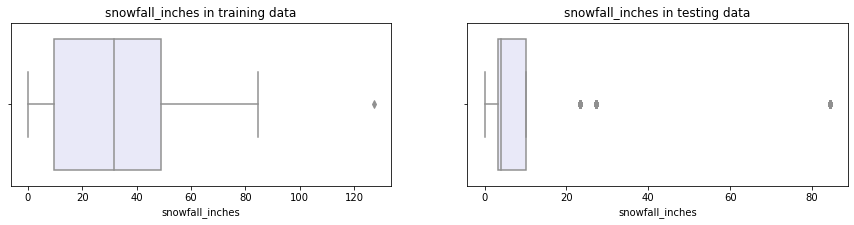

Summary for training: count    75757.000000
mean        29.136379
std         17.810894
min          0.000000
25%          9.600000
50%         31.600000
75%         49.100000
max        127.300000
Name: snowfall_inches, dtype: float64
Summary for testing: count    9705.000000
mean        8.532066
std         9.234709
min         0.000000
25%         3.400000
50%         4.000000
75%        10.200000
max        84.500000
Name: snowfall_inches, dtype: float64


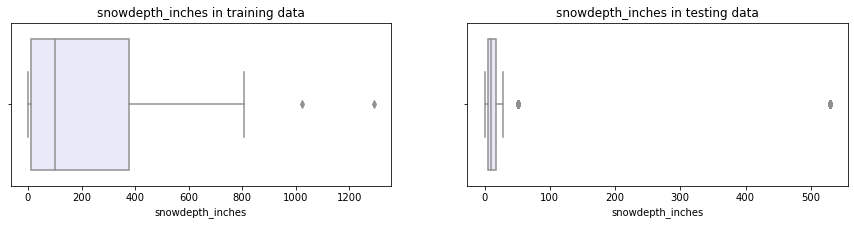

Summary for training: count    75757.000000
mean       164.862455
std        175.275869
min          0.000000
25%         10.000000
50%        101.000000
75%        377.000000
max       1292.000000
Name: snowdepth_inches, dtype: float64
Summary for testing: count    9705.000000
mean       17.275631
std        32.895419
min         0.000000
25%         6.000000
50%        10.000000
75%        17.000000
max       530.000000
Name: snowdepth_inches, dtype: float64


In [52]:
snow = ['snowfall_inches', 'snowdepth_inches']
for s in snow:
    plt.figure(figsize = (15,3))
    plt.subplot(121)
    sns.boxplot(train[s], color = 'lavender')
    plt.title(f"{s} in training data")
    plt.subplot(122)
    sns.boxplot(test[s], color = 'lavender')  
    plt.title(f"{s} in testing data")
    plt.show()
    print(f"Summary for training: {train[s].describe()}")
    print(f"Summary for testing: {test[s].describe()}")

In [53]:
feature = 'snowdepth_inches'

In [54]:
#Solo se imputan valores en los estados donde hay observaciones mayores a q3+1.5*RI y se hace con dicho valor
list(train[train[feature]>np.nanpercentile(train[feature],75)+1.5*(np.nanpercentile(train[feature],75) - np.nanpercentile(train[feature],25))]['State_Factor'].unique())

['State_1']

In [55]:
#Solo 2 datos serán imputados
len(train[train[feature]>np.nanpercentile(train[feature],75)+1.5*(np.nanpercentile(train[feature],75) - np.nanpercentile(train[feature],25))][feature])
#Solo se hace para trainings porque los valores atípicos de trsting siguen estando dentro de un rango aceptable

2

In [56]:
#Los valores mayores a q3+1.5*rango intercuartilico se imputarán con dicho valor
t1s = np.select([train1[feature]>np.percentile(train1[feature],75)+1.5*(np.percentile(train1[feature],75) - np.percentile(train1[feature],25))], 
                [np.percentile(train1[feature],75)+1.5*(np.percentile(train1[feature],75) - np.percentile(train1[feature],25))], 
                default = train1[feature])

In [57]:
#Solo el .3%de los datos serán imputados
len(test[test[feature]>np.nanpercentile(test[feature],75)+1.5*(np.nanpercentile(test[feature],75) - np.nanpercentile(test[feature],25))][feature])/len(test)

0.13086038124678

In [58]:
#Imputación training
counter = 0
for i in t1index:
    train1[feature][i] = t1s[counter]
    counter = counter+1

## avg_temp
temperatura media durante un año en la ubicación del edificio

In [59]:
feature = 'avg_temp'

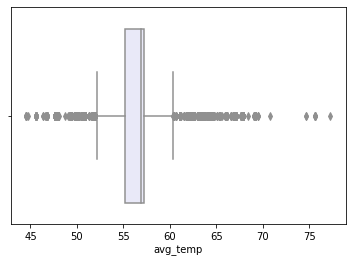

In [60]:
sns.boxplot(train[feature], color = 'lavender')
plt.show()

In [61]:
train[feature].describe()

count    75757.000000
mean        56.176705
std          2.241940
min         44.512329
25%         55.147541
50%         56.835616
75%         57.215847
max         77.245205
Name: avg_temp, dtype: float64

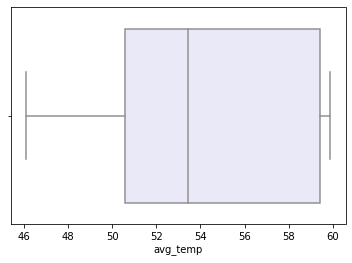

In [62]:
sns.boxplot(test[feature], color = 'lavender')
plt.show()

In [63]:
test[feature].describe()

count    9705.000000
mean       54.210939
std         3.466536
min        46.073204
25%        50.584022
50%        53.420548
75%        59.428969
max        59.894521
Name: avg_temp, dtype: float64

## Days below xF
número total de días por debajo de los x grados Fahrenheit en la ubicación del edificio

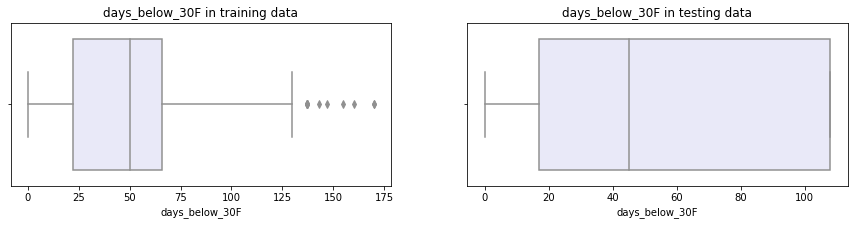

Summary for training: count    75757.000000
mean        48.756511
std         27.587124
min          0.000000
25%         22.000000
50%         50.000000
75%         66.000000
max        170.000000
Name: days_below_30F, dtype: float64
Summary for testing: count    9705.000000
mean       54.256054
std        42.259933
min         0.000000
25%        17.000000
50%        45.000000
75%       108.000000
max       108.000000
Name: days_below_30F, dtype: float64


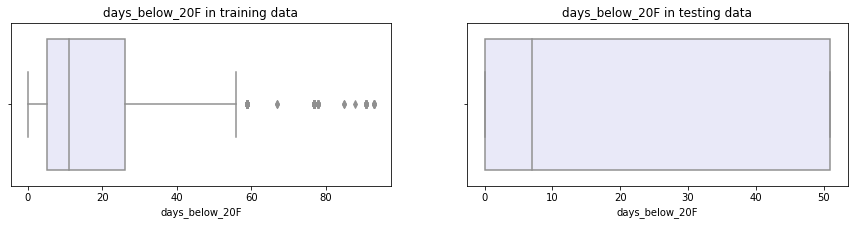

Summary for training: count    75757.000000
mean        17.447932
std         14.469435
min          0.000000
25%          5.000000
50%         11.000000
75%         26.000000
max         93.000000
Name: days_below_20F, dtype: float64
Summary for testing: count    9705.000000
mean       20.443895
std        23.182254
min         0.000000
25%         0.000000
50%         7.000000
75%        51.000000
max        51.000000
Name: days_below_20F, dtype: float64


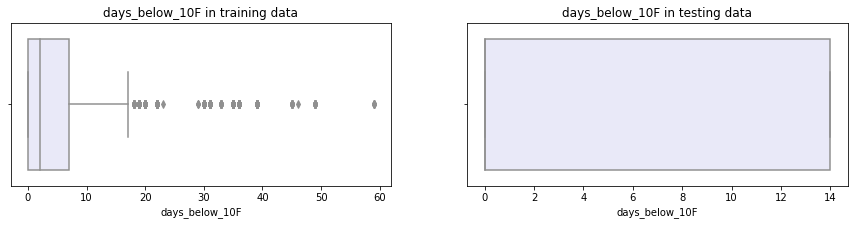

Summary for training: count    75757.000000
mean         4.886532
std          7.071221
min          0.000000
25%          0.000000
50%          2.000000
75%          7.000000
max         59.000000
Name: days_below_10F, dtype: float64
Summary for testing: count    9705.000000
mean        5.371561
std         6.676871
min         0.000000
25%         0.000000
50%         0.000000
75%        14.000000
max        14.000000
Name: days_below_10F, dtype: float64


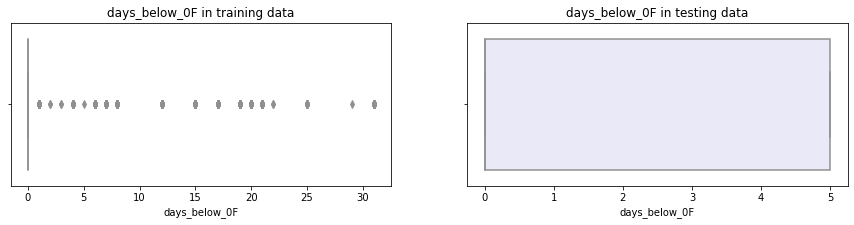

Summary for training: count    75757.000000
mean         0.876764
std          2.894244
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         31.000000
Name: days_below_0F, dtype: float64
Summary for testing: count    9705.000000
mean        1.323029
std         2.205729
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max         5.000000
Name: days_below_0F, dtype: float64


In [64]:
days_below = ['days_below_30F', 'days_below_20F', 'days_below_10F', 'days_below_0F']

for t in days_below:
    plt.figure(figsize = (15,3))
    plt.subplot(121)
    sns.boxplot(train[t], color = 'lavender')
    plt.title(f"{t} in training data")
    plt.subplot(122)
    sns.boxplot(test[t], color = 'lavender')  
    plt.title(f"{t} in testing data")
    plt.show()
    print(f"Summary for training: {train[t].describe()}")
    print(f"Summary for testing: {test[t].describe()}")

In [65]:
train[train.days_below_0F==0][days_below].tail()
#Parece tomar rangos: below_0F tomaría dias<0F pero >9F

days_below_30F  days_below_20F  days_below_10F  days_below_0F
75752               6               0               0              0
75753               6               0               0              0
75754              26               2               0              0
75755              26               2               0              0
75756              17               1               0              0

## Days above xF
número total de días por encima de los x grados Fahrenheit en la ubicación del edificio

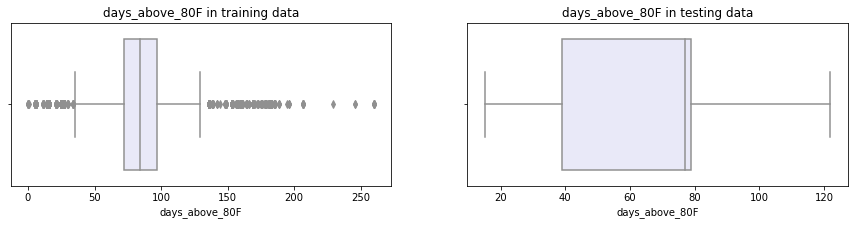

Summary for training: count    75757.000000
mean        82.709809
std         25.282913
min          0.000000
25%         72.000000
50%         84.000000
75%         97.000000
max        260.000000
Name: days_above_80F, dtype: float64
Summary for testing: count    9705.000000
mean       66.820093
std        30.936872
min        15.000000
25%        39.000000
50%        77.000000
75%        79.000000
max       122.000000
Name: days_above_80F, dtype: float64


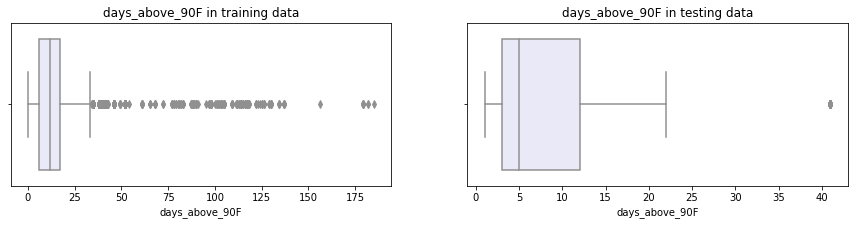

Summary for training: count    75757.000000
mean        14.058701
std         10.943996
min          0.000000
25%          6.000000
50%         12.000000
75%         17.000000
max        185.000000
Name: days_above_90F, dtype: float64
Summary for testing: count    9705.000000
mean       11.941267
std        13.077936
min         1.000000
25%         3.000000
50%         5.000000
75%        12.000000
max        41.000000
Name: days_above_90F, dtype: float64


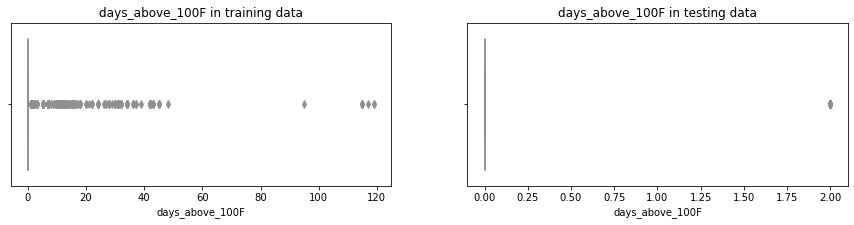

Summary for training: count    75757.000000
mean         0.279539
std          2.252323
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        119.000000
Name: days_above_100F, dtype: float64
Summary for testing: count    9705.000000
mean        0.211643
std         0.615250
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: days_above_100F, dtype: float64


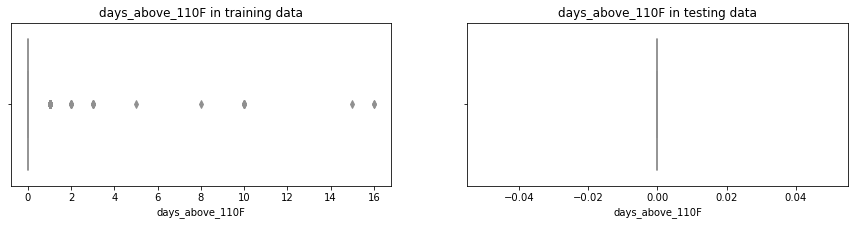

Summary for training: count    75757.000000
mean         0.002442
std          0.142140
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         16.000000
Name: days_above_110F, dtype: float64
Summary for testing: count    9705.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: days_above_110F, dtype: float64


In [66]:
days_above = ['days_above_80F', 'days_above_90F', 'days_above_100F', 'days_above_110F']

for t in days_above:
    plt.figure(figsize = (15,3))
    plt.subplot(121)
    sns.boxplot(train[t], color = 'lavender')
    plt.title(f"{t} in training data")
    plt.subplot(122)
    sns.boxplot(test[t], color = 'lavender')  
    plt.title(f"{t} in testing data")
    plt.show()
    print(f"Summary for training: {train[t].describe()}")
    print(f"Summary for testing: {test[t].describe()}")

# Variables con datos faltantes

## Year_built

In [67]:
feature = 'year_built'

In [68]:
len(list(train[feature].unique()))

181

In [69]:
train[feature].isna().sum()

1837

In [70]:
test[feature].isna().sum()

92

_______
State_1
_______
5618 registros


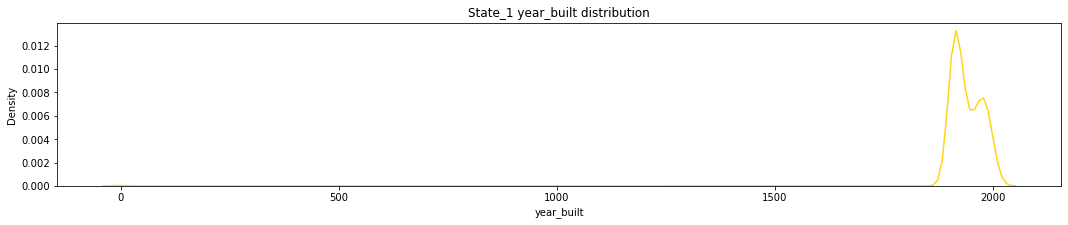

Originalmente hay 879 na's
Se tienen 885 na's, convirtiendo ceros en na's
Información general: count    4733.000000
mean     1940.734629
std        31.684287
min      1889.000000
25%      1911.000000
50%      1927.000000
75%      1970.000000
max      2010.000000
dtype: float64
4733 registros


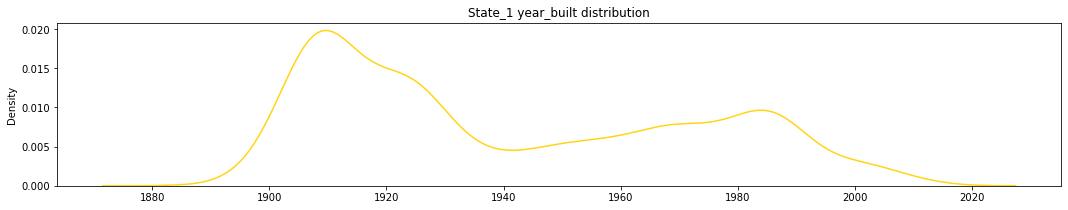

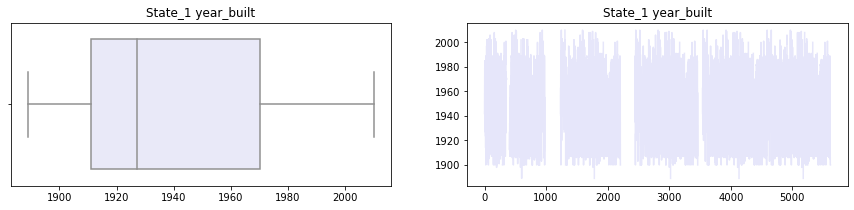

El número óptimo de clústers es 4


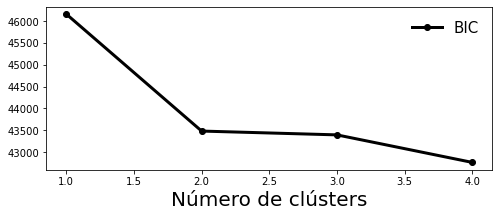

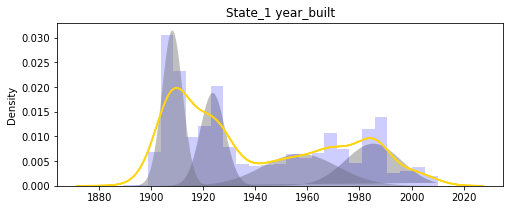

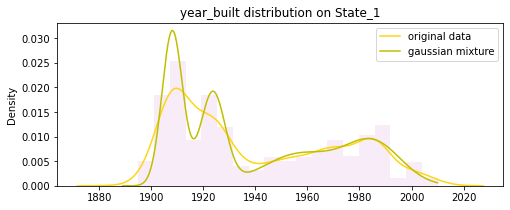

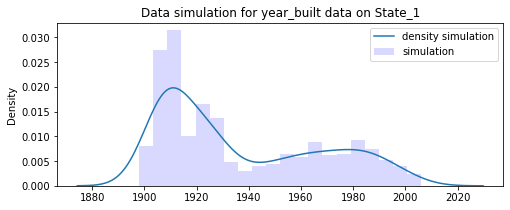

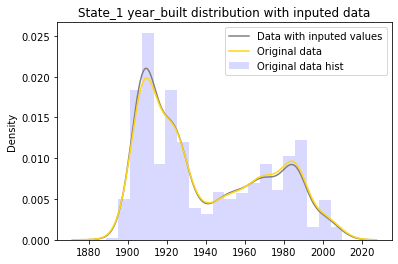

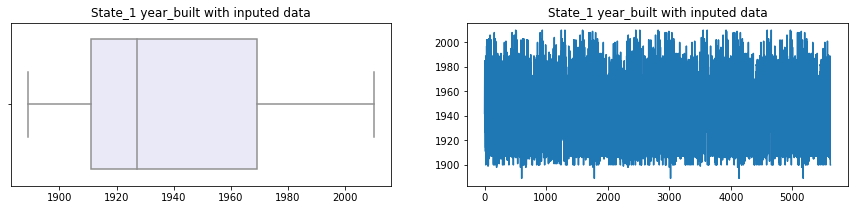

_______
State_2
_______
4871 registros


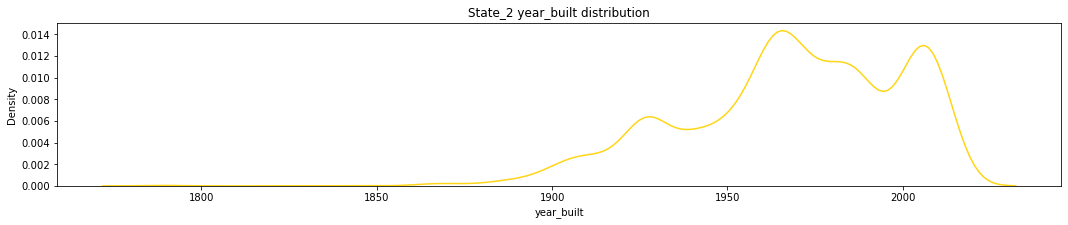

Originalmente hay 107 na's
Se tienen 107 na's, convirtiendo ceros en na's
Información general: count    4764.000000
mean     1968.620067
std        31.174242
min      1789.000000
25%      1950.000000
50%      1970.000000
75%      1992.000000
max      2015.000000
dtype: float64
4764 registros


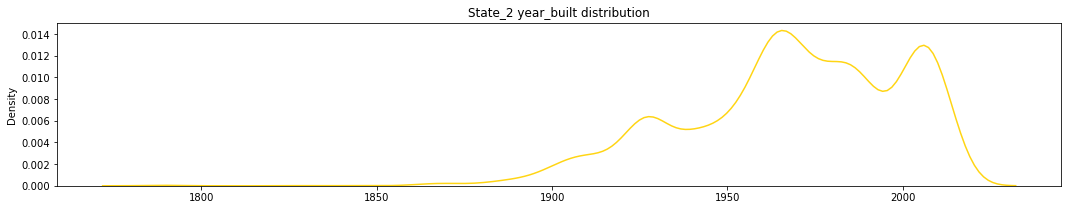

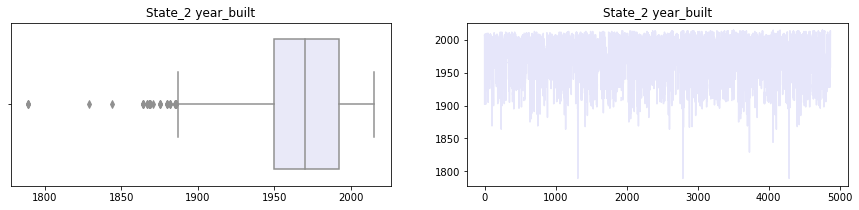

El número óptimo de clústers es 4


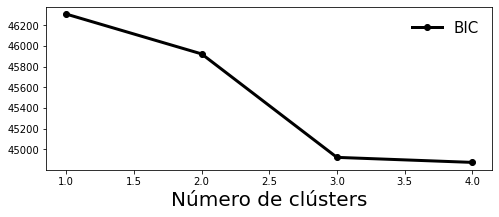

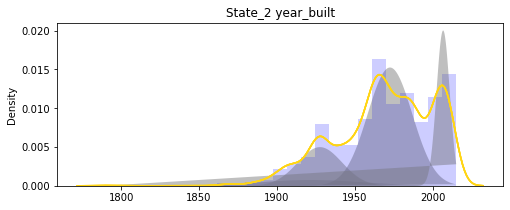

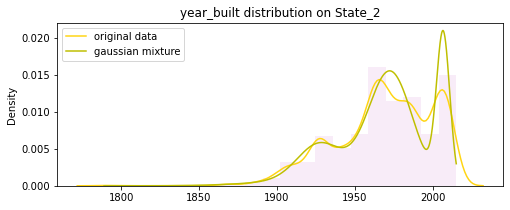

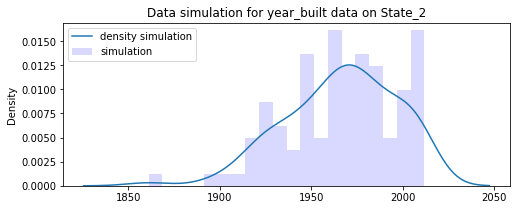

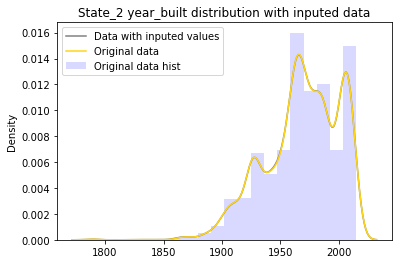

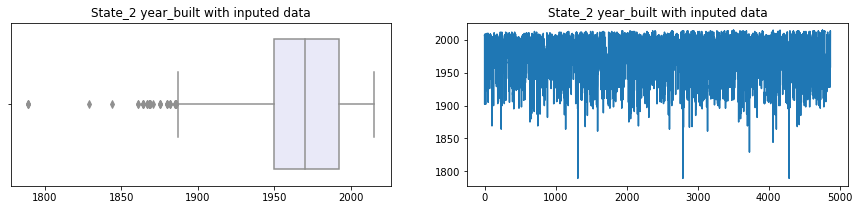

_______
State_4
_______
4300 registros


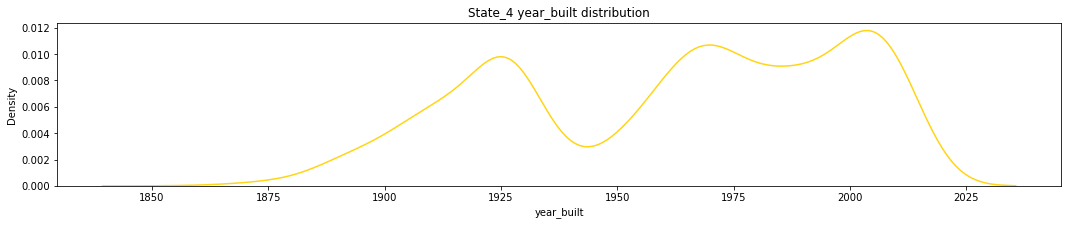

Originalmente hay 10 na's
Se tienen 10 na's, convirtiendo ceros en na's
Información general: count    4290.000000
mean     1961.821445
std        36.525456
min      1860.000000
25%      1927.000000
50%      1969.000000
75%      1995.000000
max      2015.000000
dtype: float64
4290 registros


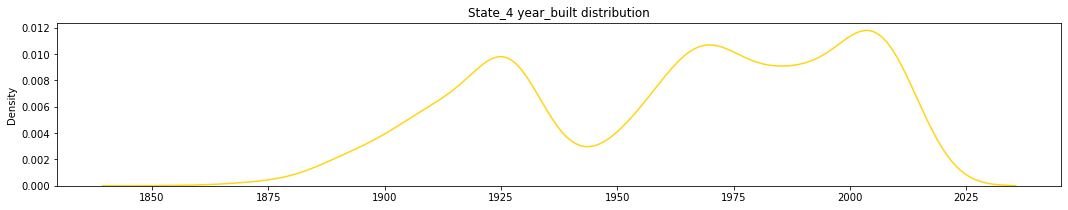

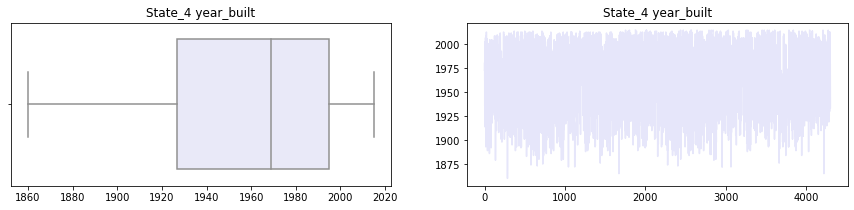

El número óptimo de clústers es 4


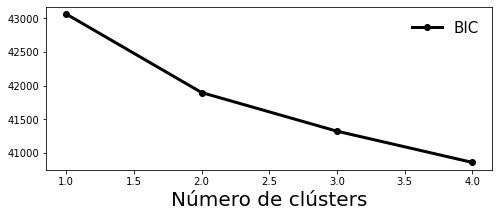

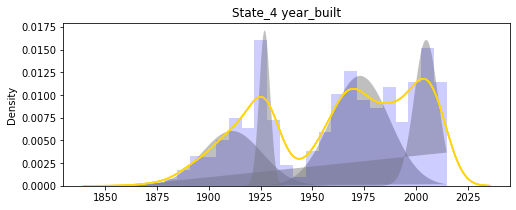

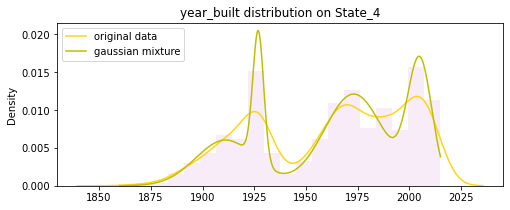

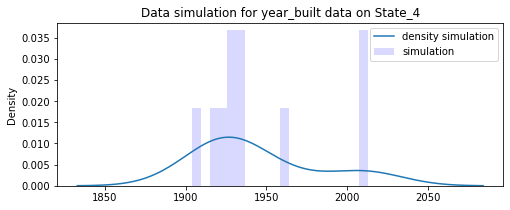

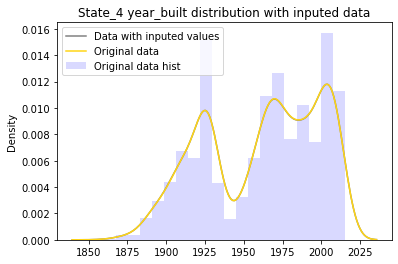

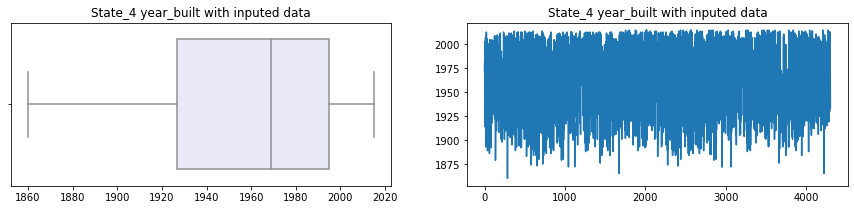

_______
State_6
_______
50840 registros


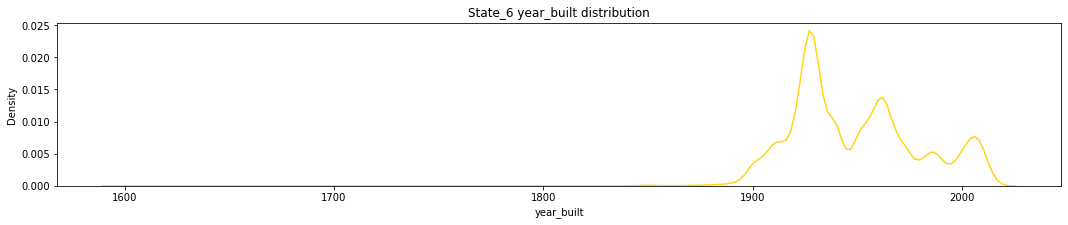

Originalmente hay 833 na's
Se tienen 833 na's, convirtiendo ceros en na's
Información general: count    50007.000000
mean      1948.763073
std         30.613746
min       1600.000000
25%       1927.000000
50%       1941.000000
75%       1967.000000
max       2015.000000
dtype: float64
50007 registros


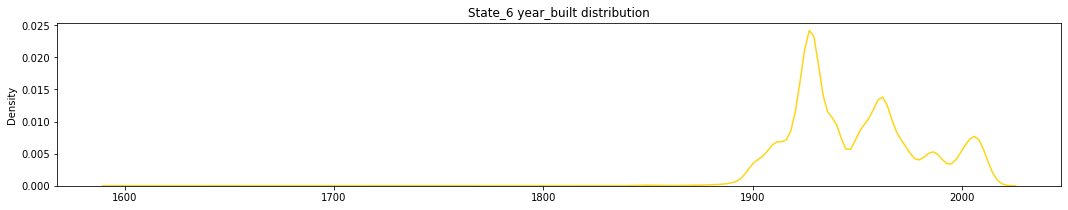

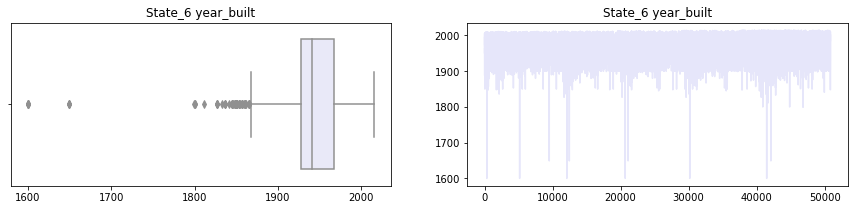

El número óptimo de clústers es 4


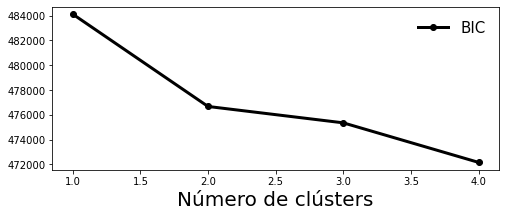

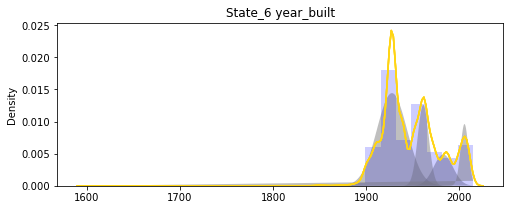

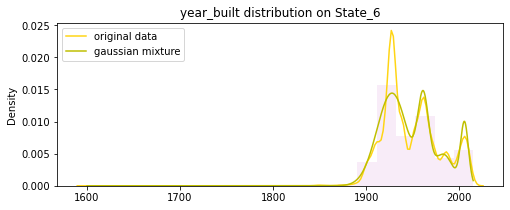

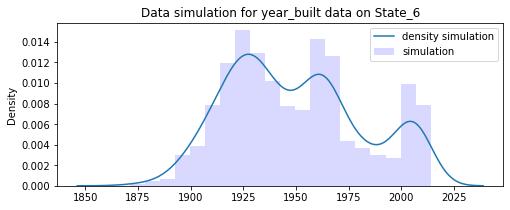

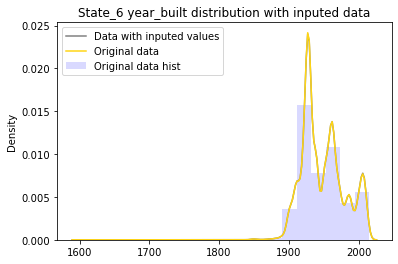

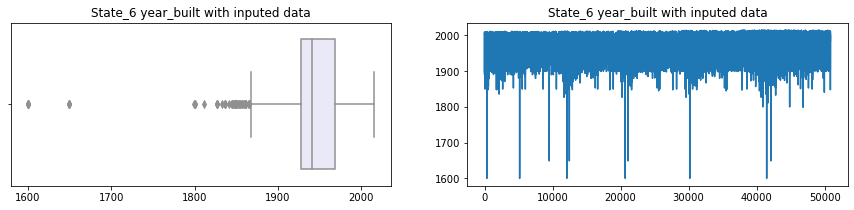

_______
State_8
_______
3701 registros


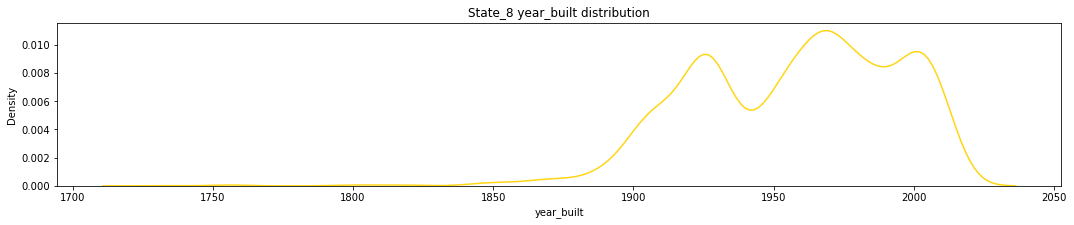

Originalmente hay 6 na's
Se tienen 6 na's, convirtiendo ceros en na's
Información general: count    3695.000000
mean     1957.419486
std        36.653190
min      1732.000000
25%      1928.000000
50%      1963.000000
75%      1987.000000
max      2015.000000
dtype: float64
3695 registros


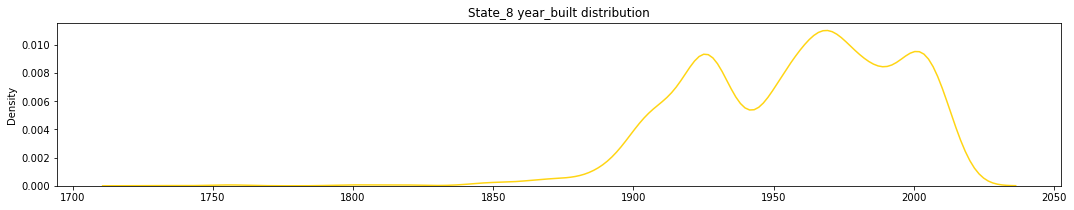

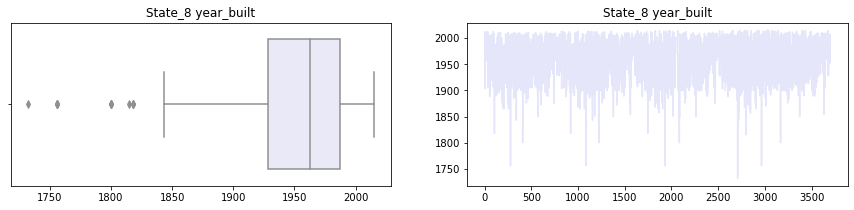

El número óptimo de clústers es 4


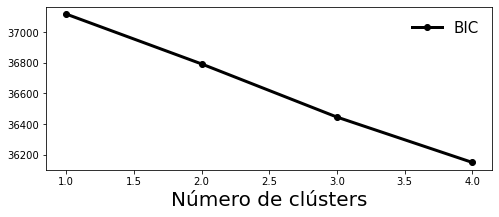

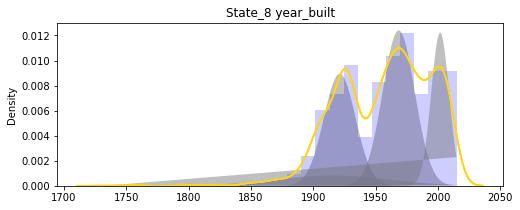

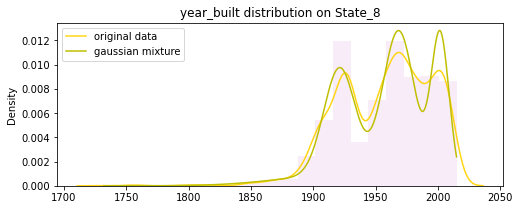

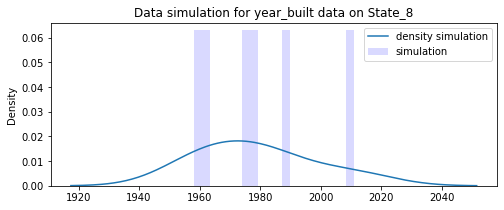

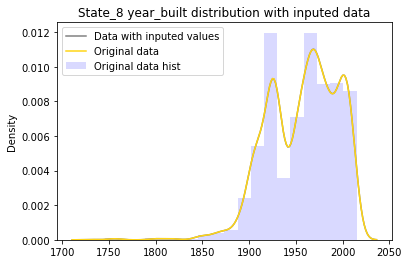

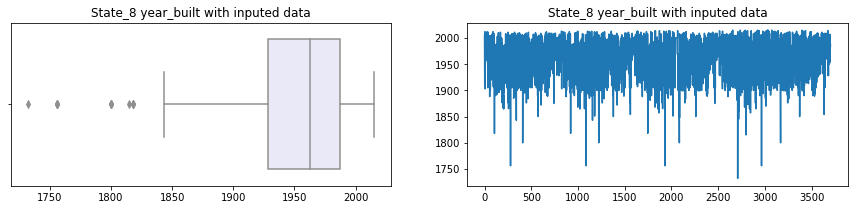

_______
State_10
_______
15 registros


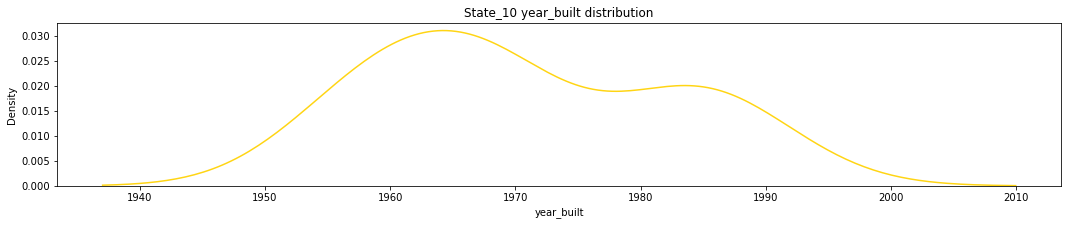

Originalmente hay 0 na's
Se tienen 0 na's, convirtiendo ceros en na's
Información general: count      15.000000
mean     1970.800000
std        11.440529
min      1957.000000
25%      1963.000000
50%      1969.000000
75%      1984.000000
max      1990.000000
dtype: float64
15 registros


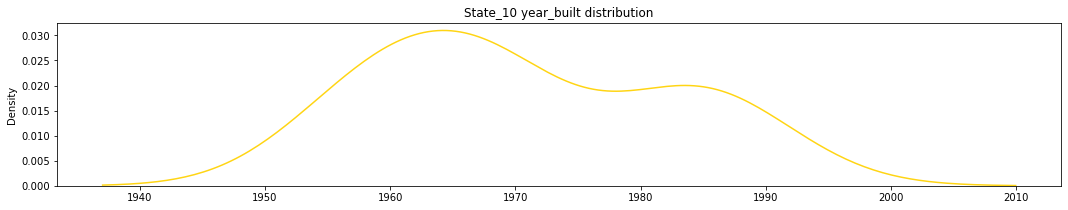

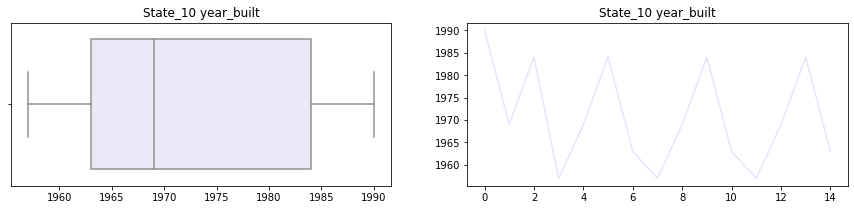

El número óptimo de clústers es 4


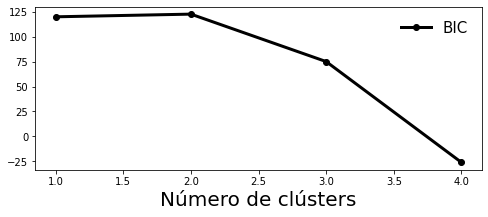

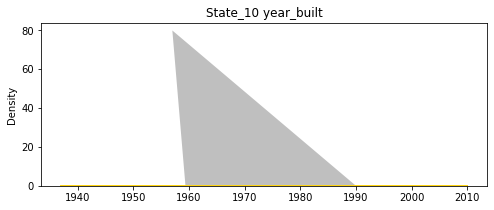

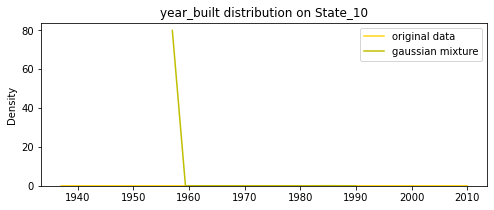

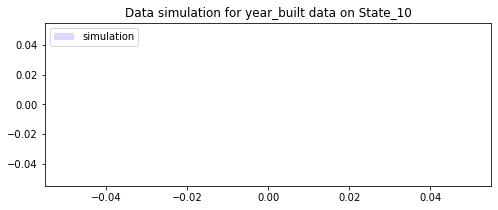

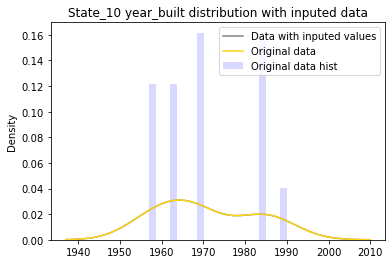

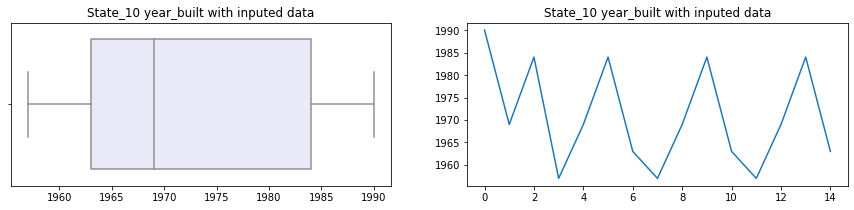

_______
State_11
_______
6412 registros


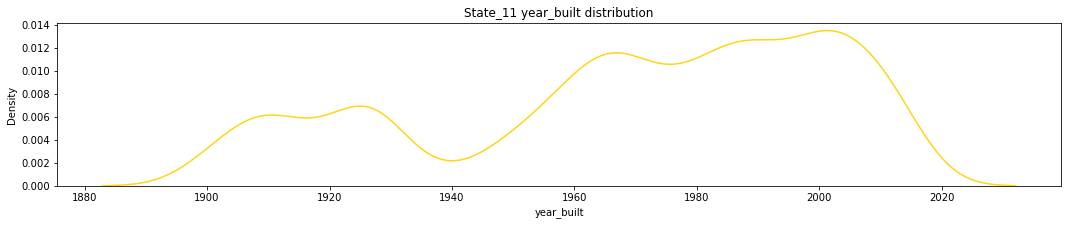

Originalmente hay 2 na's
Se tienen 2 na's, convirtiendo ceros en na's
Información general: count    6410.000000
mean     1968.841966
std        32.849346
min      1900.000000
25%      1949.000000
50%      1975.000000
75%      1997.000000
max      2015.000000
dtype: float64
6410 registros


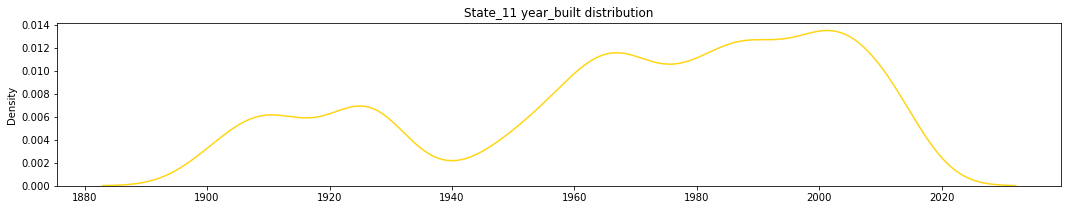

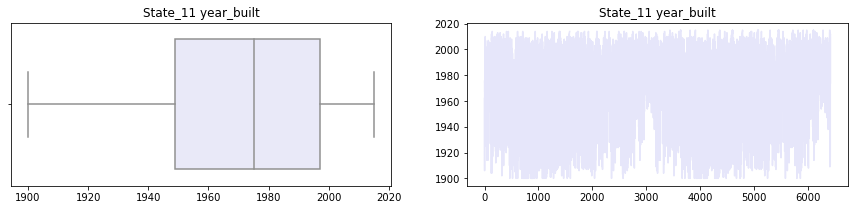

El número óptimo de clústers es 4


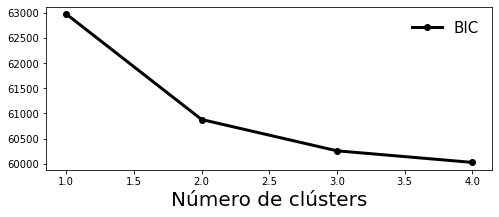

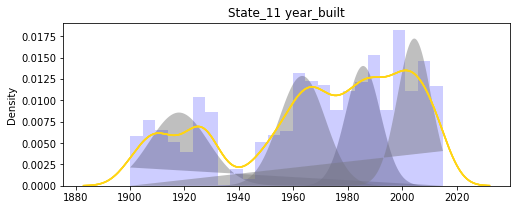

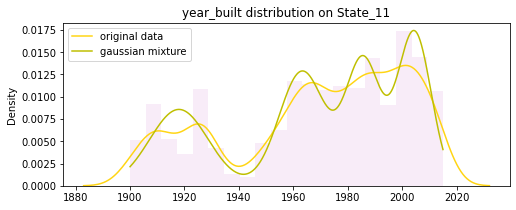

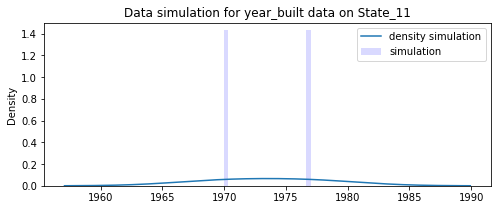

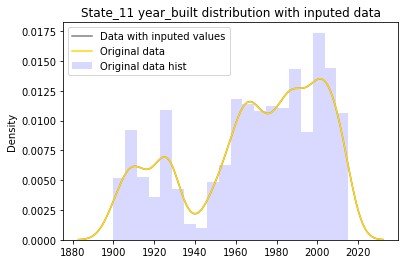

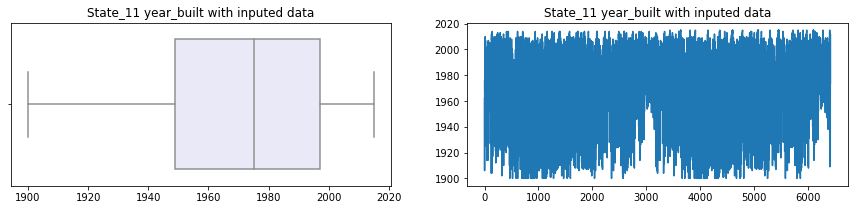

In [71]:
#Simulación training
#Solo valores enteros -> integ = True
#No puede haber valores cero -> zero = False
t1s = list(mixed_normal_sim(data = train1[feature], state = 'State_1', feature = feature, integ = True, zero = False))
t2s = list(mixed_normal_sim(data = train2[feature], state = 'State_2', feature = feature, integ = True, zero = False))
t4s = list(mixed_normal_sim(data = train4[feature], state = 'State_4', feature = feature, integ = True, zero = False))
t6s = list(mixed_normal_sim(data = train6[feature], state = 'State_6', feature = feature, integ = True, zero = False))
t8s = list(mixed_normal_sim(data = train8[feature], state = 'State_8', feature = feature, integ = True, zero = False))
t10s = list(mixed_normal_sim(data = train10[feature], state = 'State_10', feature = feature, integ = True, zero = False))
t11s = list(mixed_normal_sim(data = train11[feature], state = 'State_11', feature = feature, integ = True, zero = False))

_______
State_1
_______
1027 registros


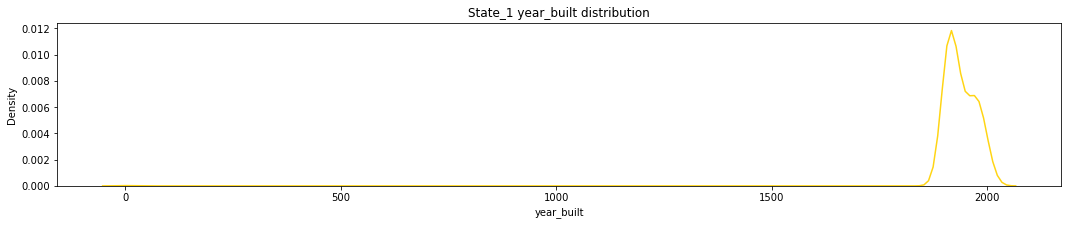

Originalmente hay 52 na's
Se tienen 53 na's, convirtiendo ceros en na's
Información general: count     974.000000
mean     1939.990760
std        31.379436
min      1889.000000
25%      1911.000000
50%      1927.000000
75%      1969.000000
max      2014.000000
dtype: float64
974 registros


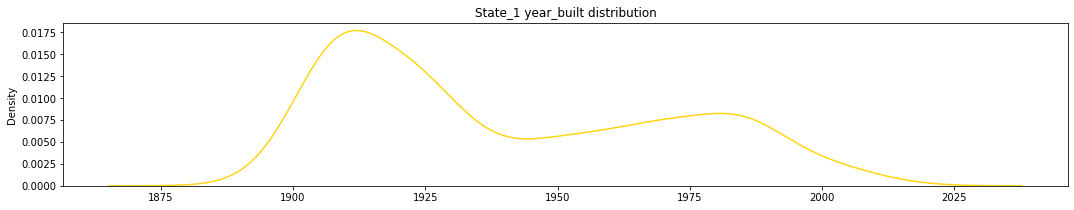

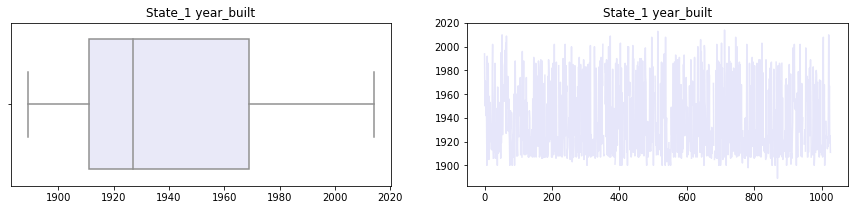

El número óptimo de clústers es 4


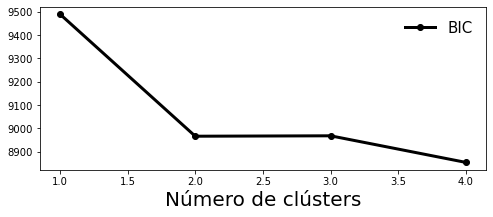

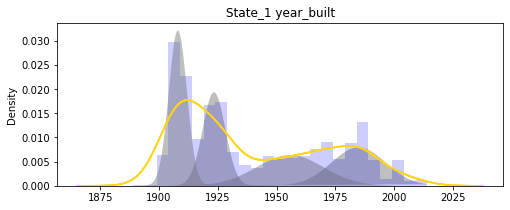

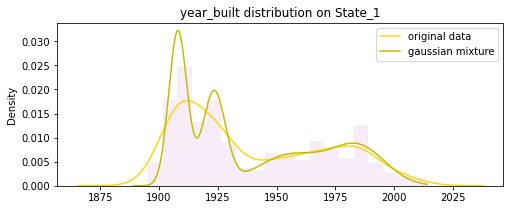

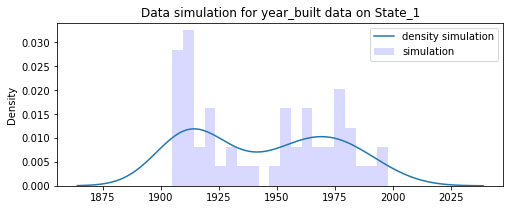

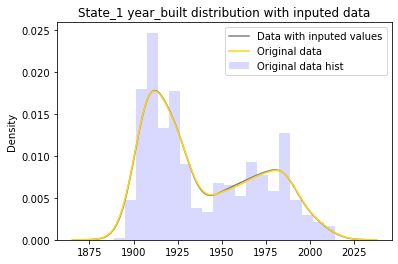

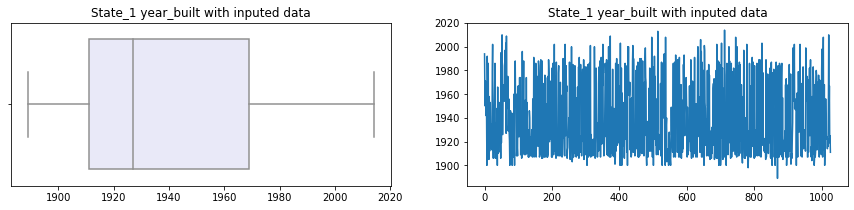

_______
State_2
_______
1515 registros


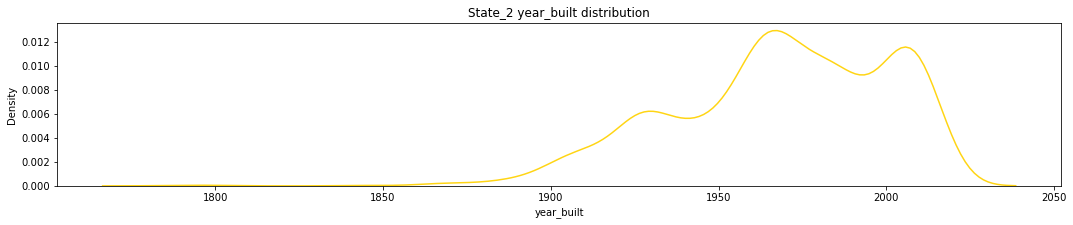

Originalmente hay 28 na's
Se tienen 28 na's, convirtiendo ceros en na's
Información general: count    1487.000000
mean     1968.572293
std        32.437578
min      1789.000000
25%      1949.500000
50%      1970.000000
75%      1996.000000
max      2016.000000
dtype: float64
1487 registros


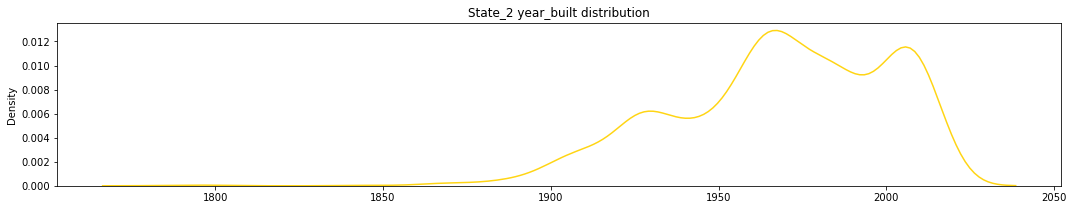

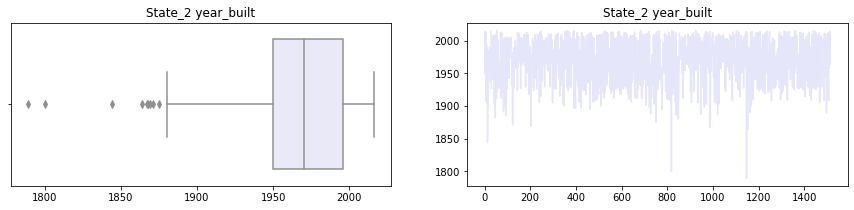

El número óptimo de clústers es 4


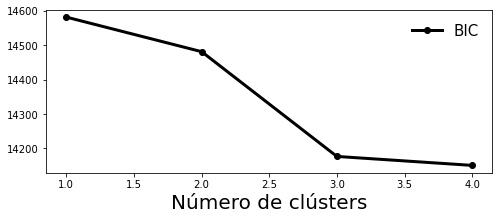

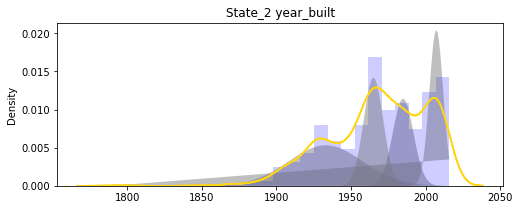

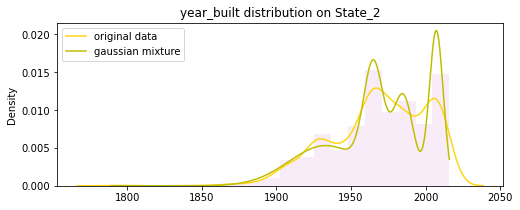

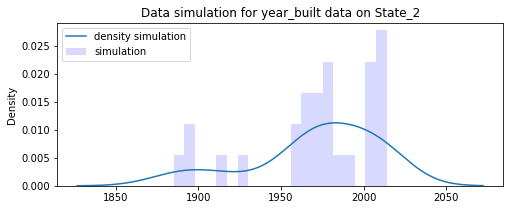

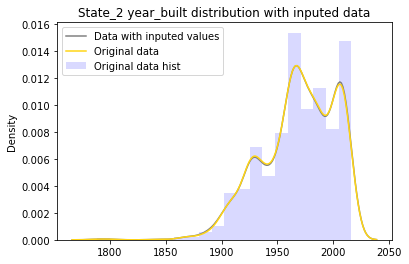

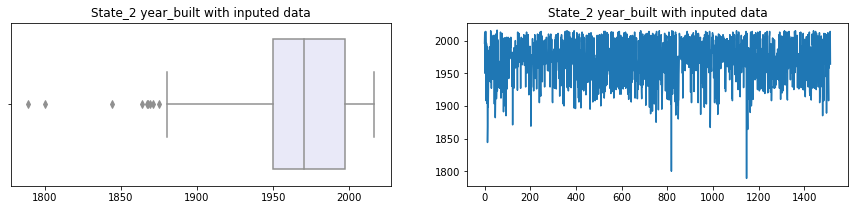

_______
State_4
_______
2568 registros


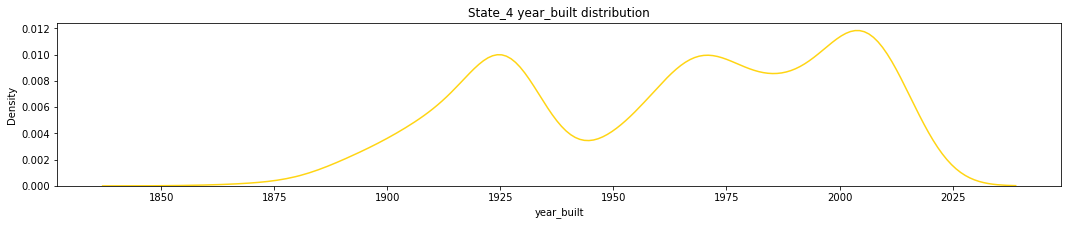

Originalmente hay 5 na's
Se tienen 5 na's, convirtiendo ceros en na's
Información general: count    2563.000000
mean     1962.904409
std        36.785290
min      1860.000000
25%      1927.000000
50%      1969.000000
75%      1997.000000
max      2016.000000
dtype: float64
2563 registros


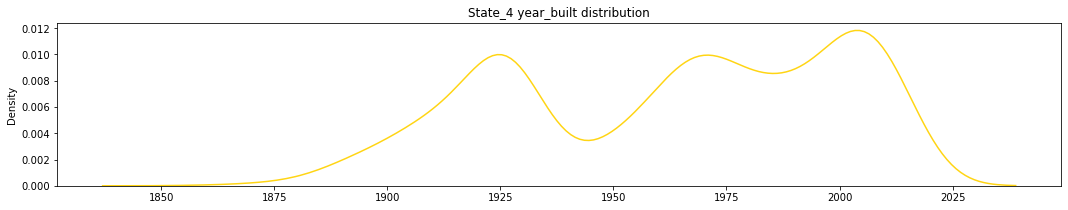

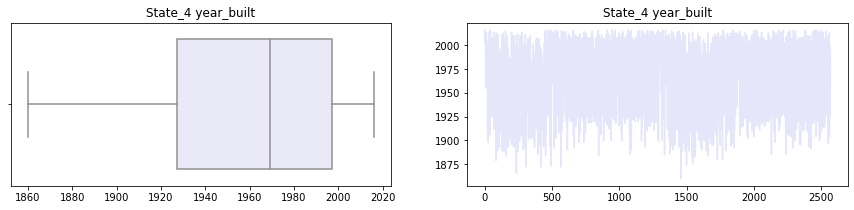

El número óptimo de clústers es 4


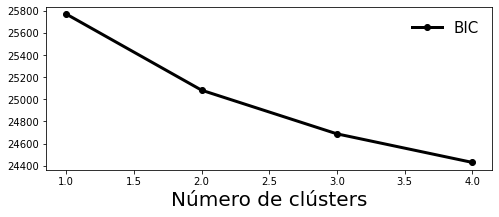

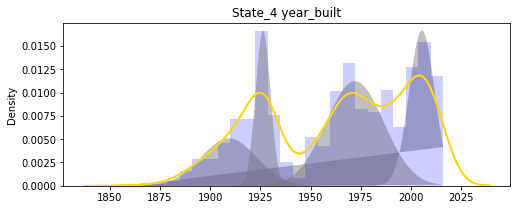

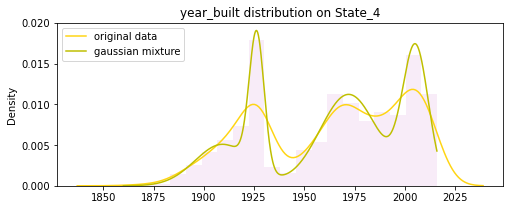

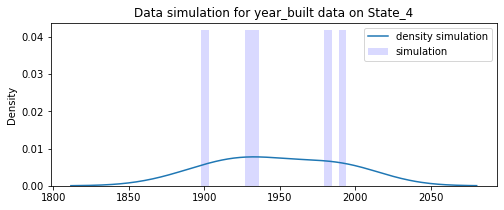

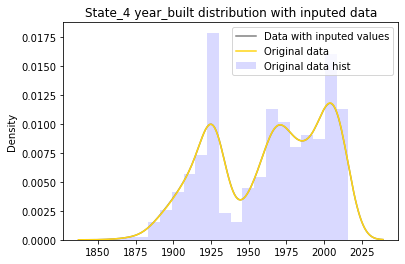

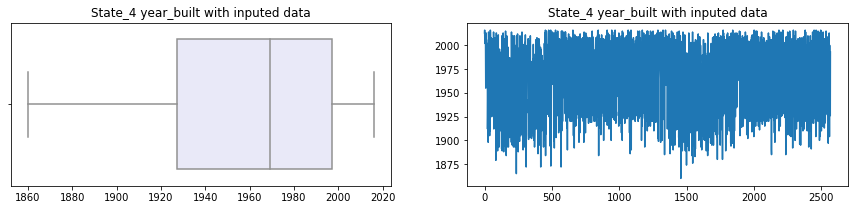

_______
State_8
_______
1323 registros


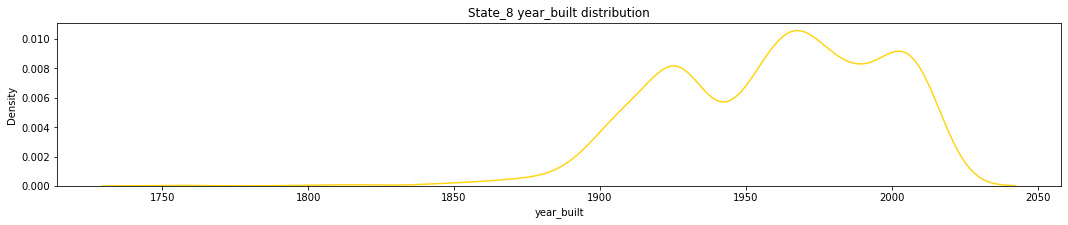

Originalmente hay 4 na's
Se tienen 4 na's, convirtiendo ceros en na's
Información general: count    1319.000000
mean     1959.651251
std        37.108171
min      1756.000000
25%      1929.000000
50%      1964.000000
75%      1990.000000
max      2016.000000
dtype: float64
1319 registros


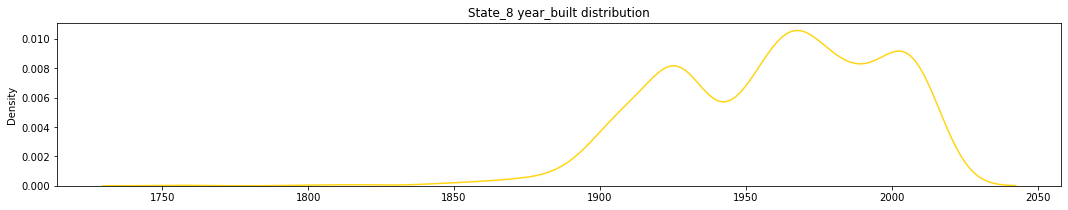

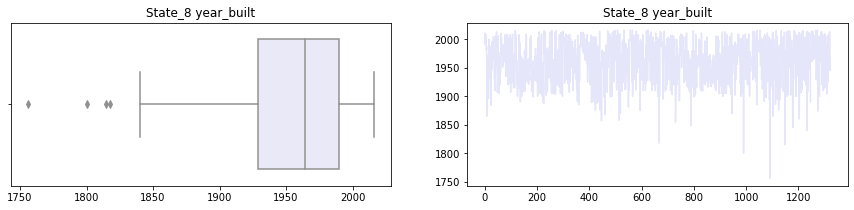

El número óptimo de clústers es 4


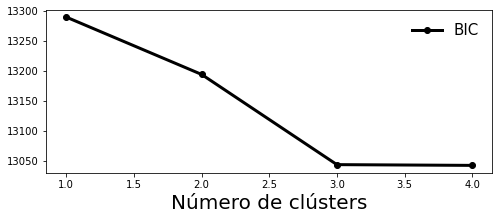

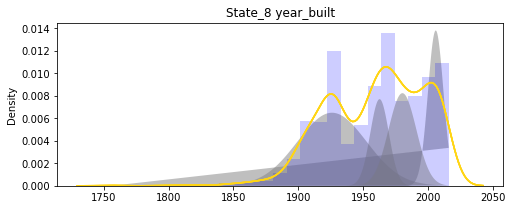

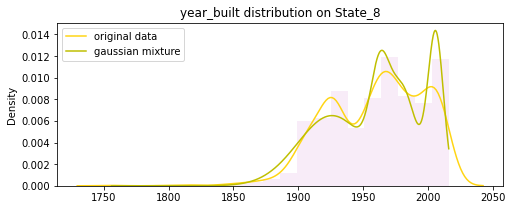

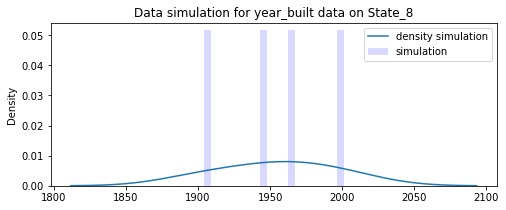

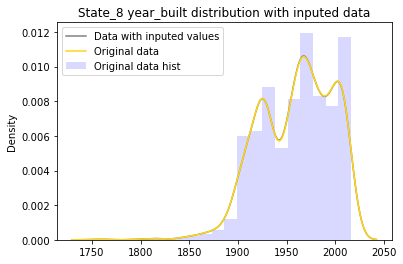

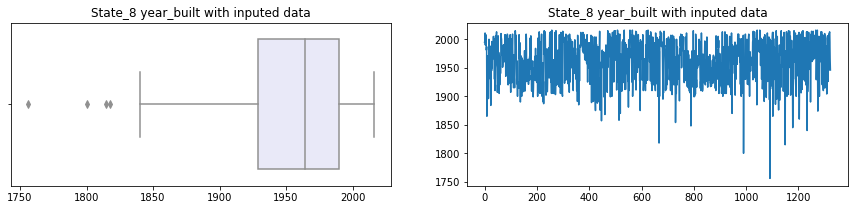

_______
State_10
_______
4 registros


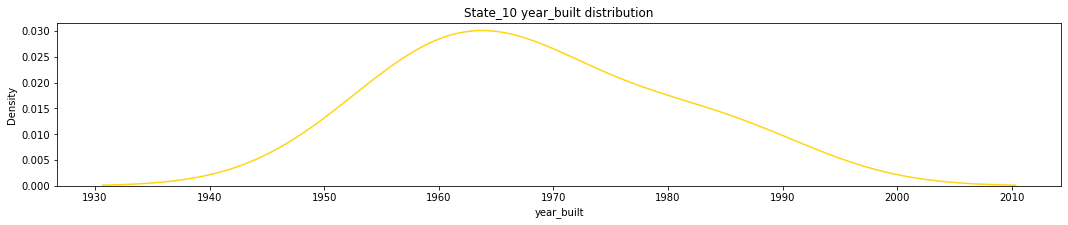

Originalmente hay 0 na's
Se tienen 0 na's, convirtiendo ceros en na's
Información general: count       4.00000
mean     1968.25000
std        11.58663
min      1957.00000
25%      1961.50000
50%      1966.00000
75%      1972.75000
max      1984.00000
dtype: float64
4 registros


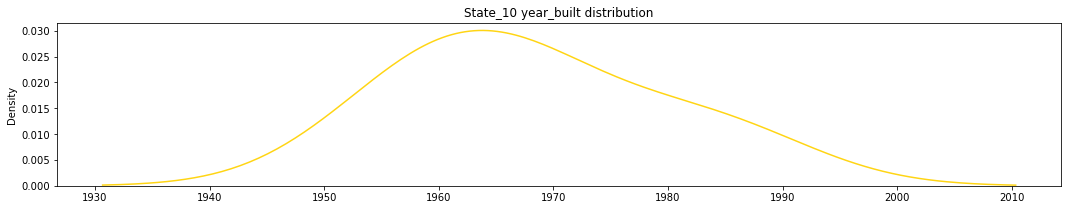

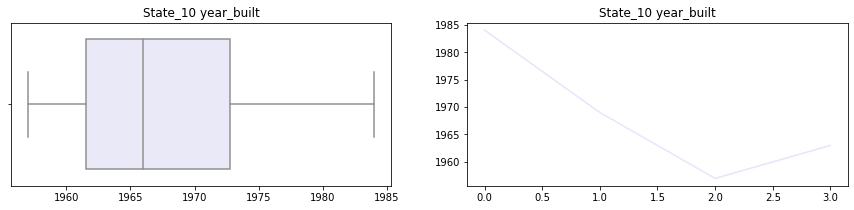

El número óptimo de clústers es 4


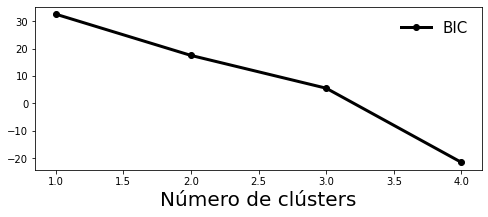

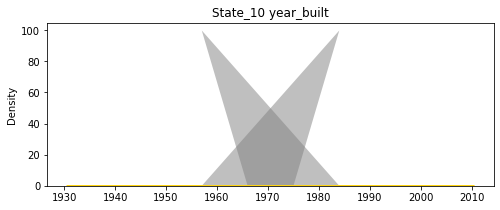

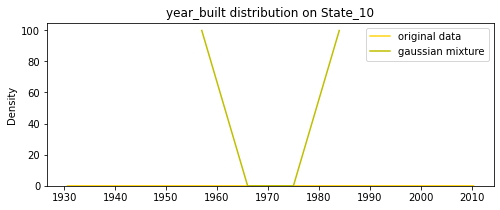

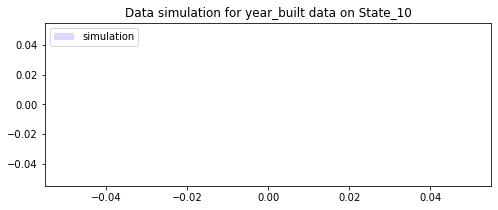

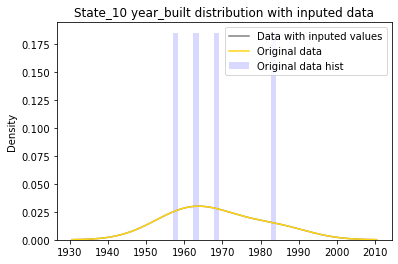

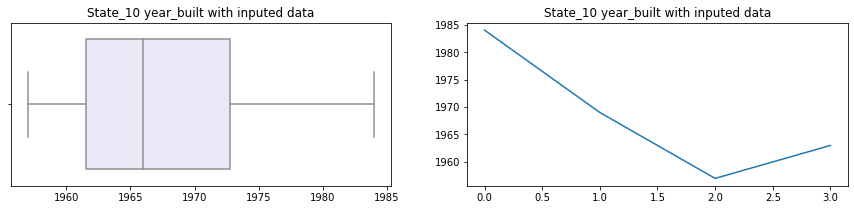

_______
State_11
_______
3268 registros


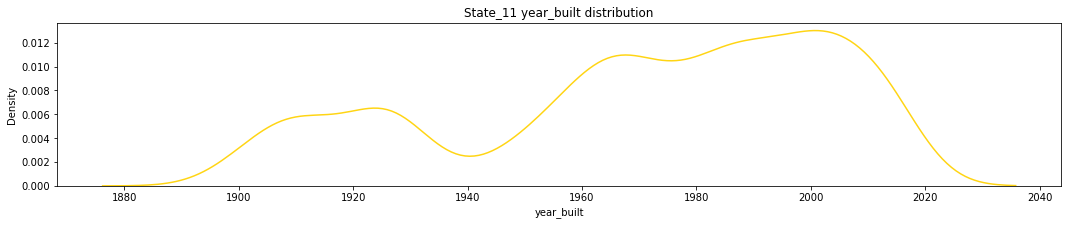

Originalmente hay 3 na's
Se tienen 3 na's, convirtiendo ceros en na's
Información general: count    3265.000000
mean     1969.995406
std        33.316428
min      1896.000000
25%      1950.000000
50%      1977.000000
75%      1999.000000
max      2016.000000
dtype: float64
3265 registros


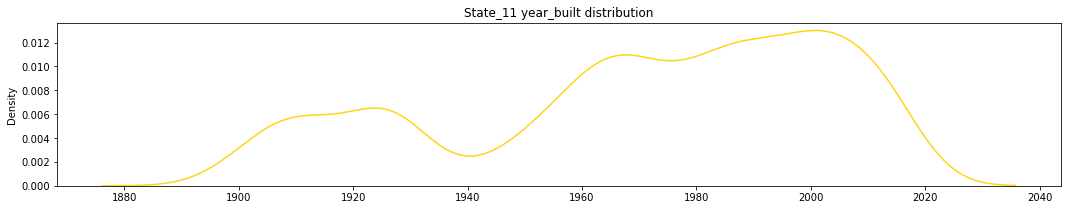

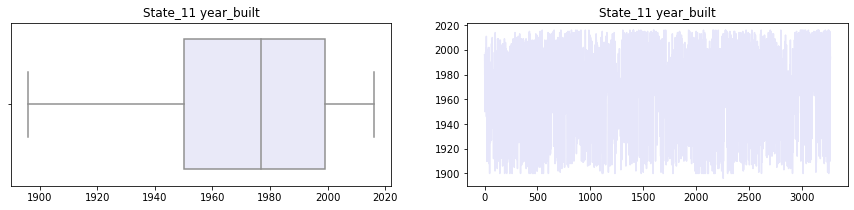

El número óptimo de clústers es 4


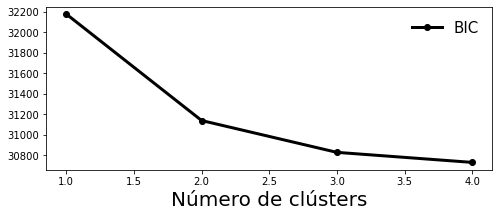

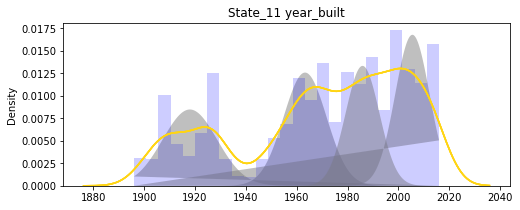

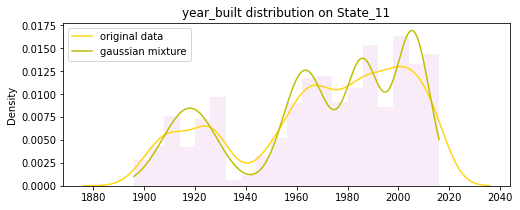

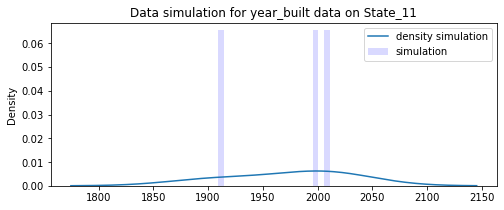

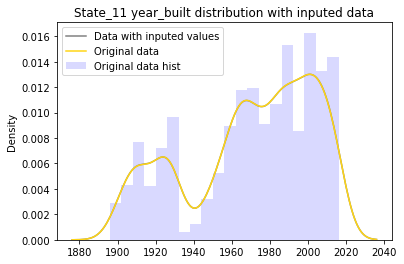

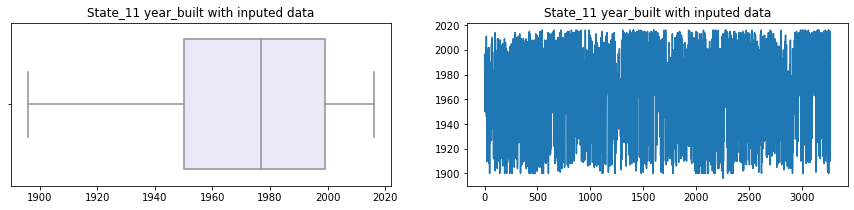

In [72]:
#Simulación testing
#Solo valores enteros -> integ = True
#No puede haber valores cero -> zero = False
te1s = list(mixed_normal_sim(data = test1[feature], state = 'State_1', feature = feature, integ = True, zero = False))
te2s = list(mixed_normal_sim(data = test2[feature], state = 'State_2', feature = feature, integ = True, zero = False))
te4s = list(mixed_normal_sim(data = test4[feature], state = 'State_4', feature = feature, integ = True, zero = False))
te8s = list(mixed_normal_sim(data = test8[feature], state = 'State_8', feature = feature, integ = True, zero = False))
te10s = list(mixed_normal_sim(data = test10[feature], state = 'State_10', feature = feature, integ = True, zero = False))
te11s = list(mixed_normal_sim(data = test11[feature], state = 'State_11', feature = feature, integ = True, zero = False))

In [73]:
#Imputación training
counter = 0
for i in t1index:
    train1[feature][i] = t1s[counter]
    counter = counter+1

counter = 0
for i in t2index:
    train2[feature][i] = t2s[counter]
    counter = counter+1

counter = 0
for i in t4index:
    train4[feature][i] = t4s[counter]
    counter = counter+1

counter = 0
for i in t6index:
    train6[feature][i] = t6s[counter]
    counter = counter+1
    
counter = 0
for i in t8index:
    train8[feature][i] = t8s[counter]
    counter = counter+1
    
counter = 0
for i in t10index:
    train10[feature][i] = t10s[counter]
    counter = counter+1
    
counter = 0
for i in t11index:
    train11[feature][i] = t11s[counter]
    counter = counter+1
    
    
#Imputación testing
counter = 0
for i in te1index:
    test1[feature][i] = te1s[counter]
    counter = counter+1

counter = 0
for i in te2index:
    test2[feature][i] = te2s[counter]
    counter = counter+1

counter = 0
for i in te4index:
    test4[feature][i] = te4s[counter]
    counter = counter+1
    
counter = 0
for i in te8index:
    test8[feature][i] = te8s[counter]
    counter = counter+1
    
counter = 0
for i in te10index:
    test10[feature][i] = te10s[counter]
    counter = counter+1
    
counter = 0
for i in te11index:
    test11[feature][i] = te11s[counter]
    counter = counter+1

## energy_star_rating

In [74]:
feature = 'energy_star_rating'
# feature = 'year_built'

In [75]:
len(list(train[feature].unique()))

102

In [76]:
train[feature].isna().sum()

26709

In [77]:
#Solo se imputan valores en los estados donde hay na's
list(train[train[feature].isna()]['State_Factor'].unique())

['State_1', 'State_2', 'State_4', 'State_6', 'State_8', 'State_10', 'State_11']

In [78]:
test[feature].isna().sum()

2254

_______
State_1
_______
5618 registros


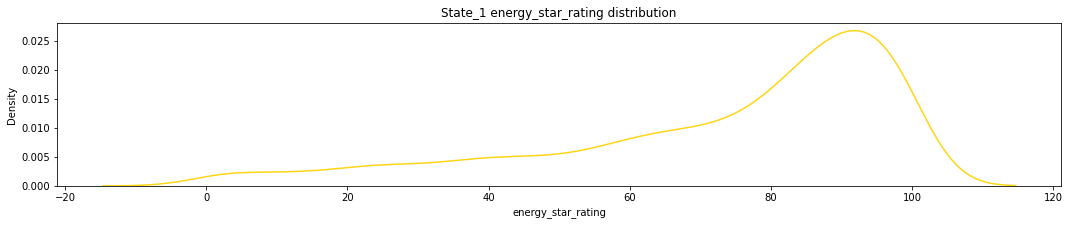

Originalmente hay 2069 na's
Información general: count    3549.000000
mean       72.977740
std        25.089183
min         0.000000
25%        60.000000
50%        82.000000
75%        92.000000
max       100.000000
Name: energy_star_rating, dtype: float64
3549 registros


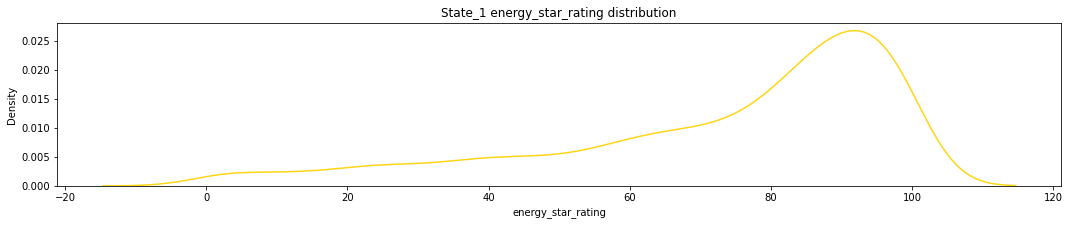

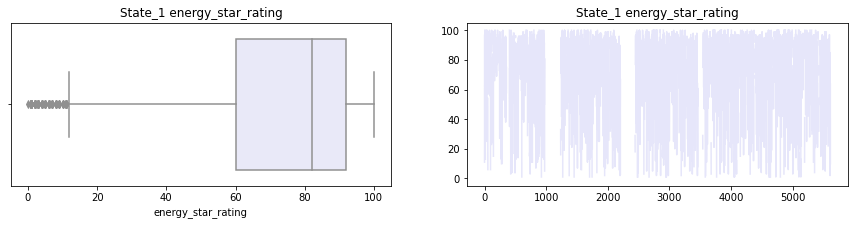

El número óptimo de clústers es 4


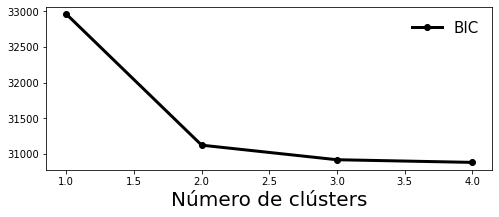

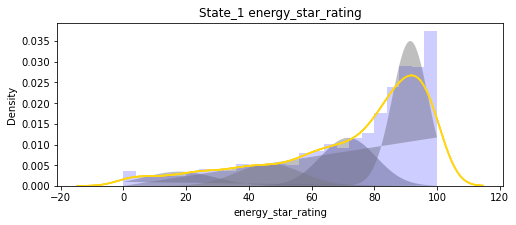

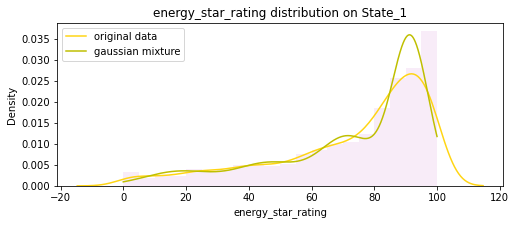

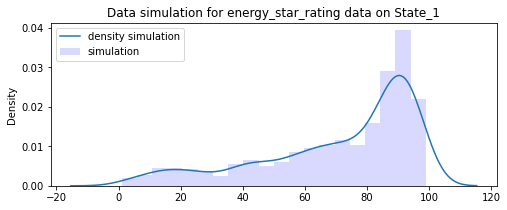

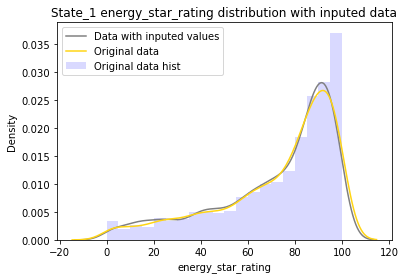

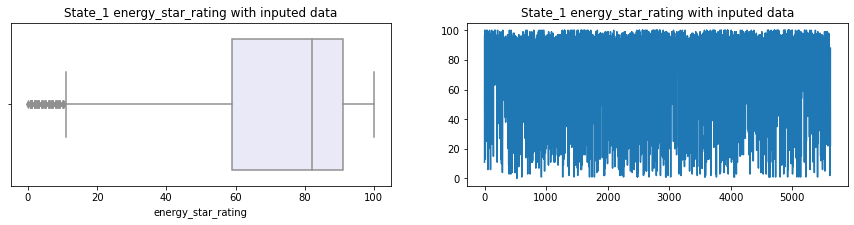

_______
State_4
_______
4300 registros


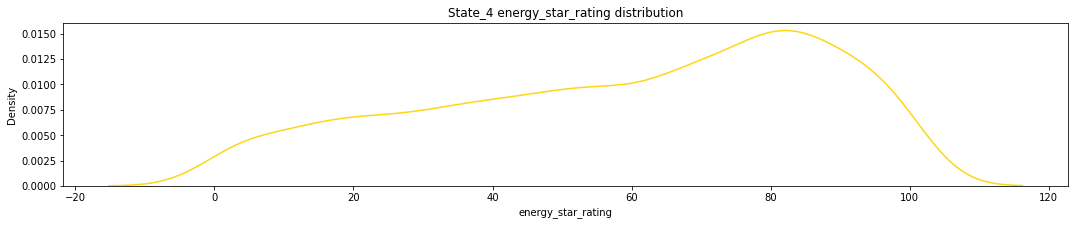

Originalmente hay 704 na's
Información general: count    3596.000000
mean       59.278643
std        27.717203
min         1.000000
25%        38.000000
50%        65.000000
75%        83.000000
max       100.000000
Name: energy_star_rating, dtype: float64
3596 registros


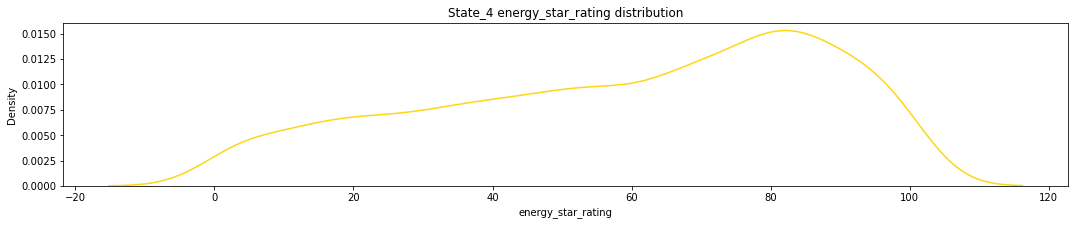

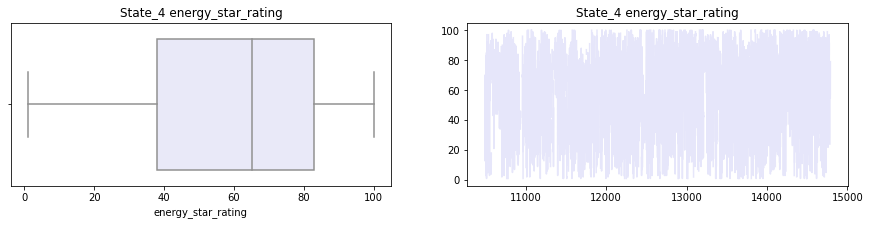

El número óptimo de clústers es 4


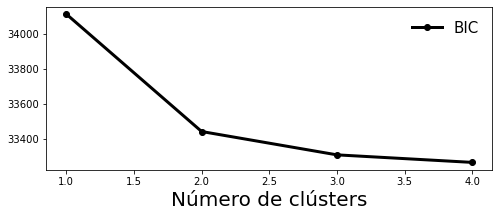

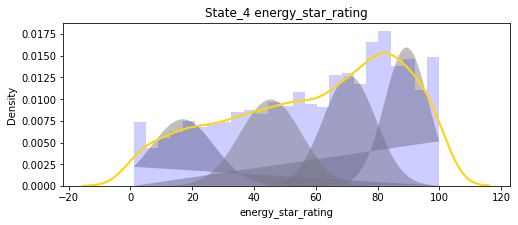

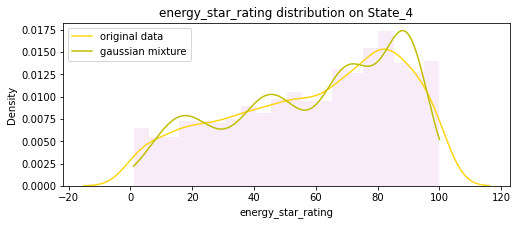

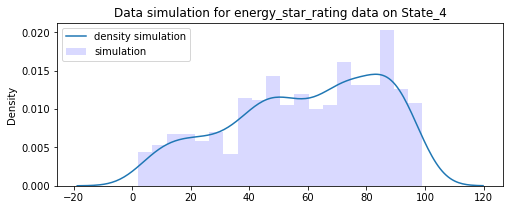

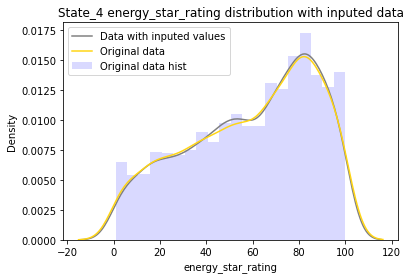

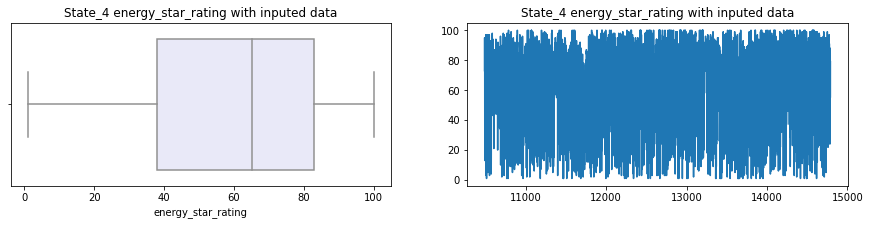

_______
State_6
_______
50840 registros


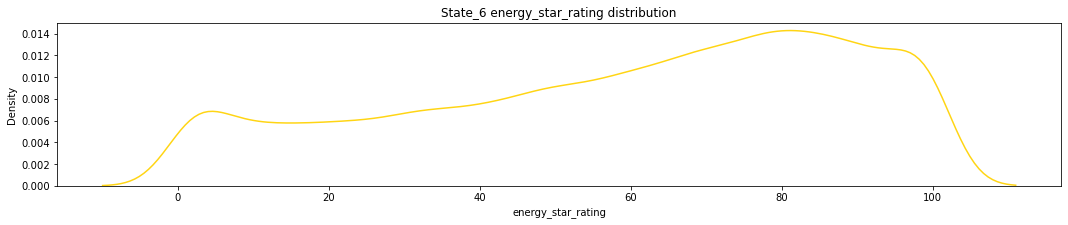

Originalmente hay 20153 na's
Información general: count    30687.000000
mean        59.212989
std         28.928519
min          1.000000
25%         37.000000
50%         65.000000
75%         83.000000
max        100.000000
Name: energy_star_rating, dtype: float64
30687 registros


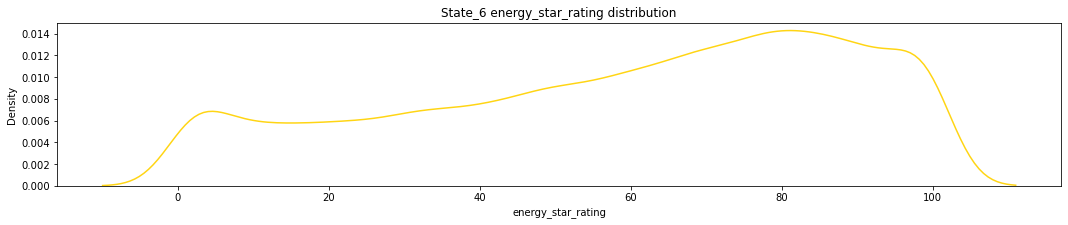

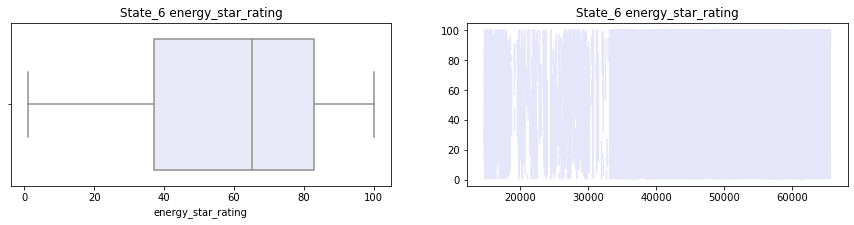

El número óptimo de clústers es 4


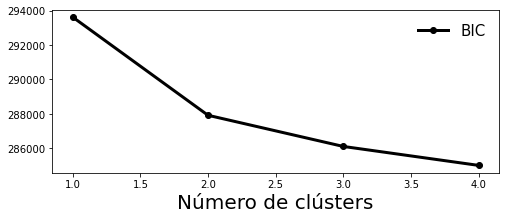

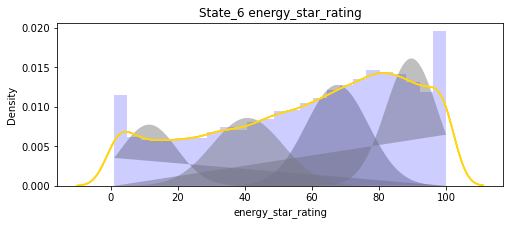

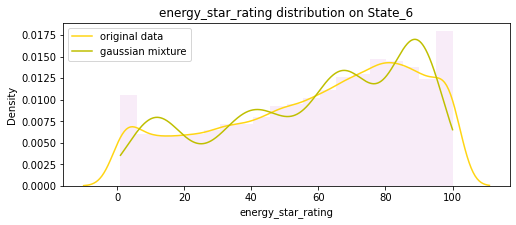

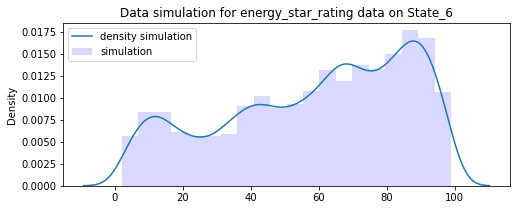

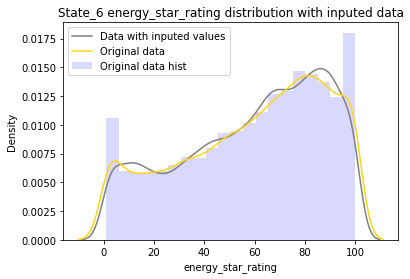

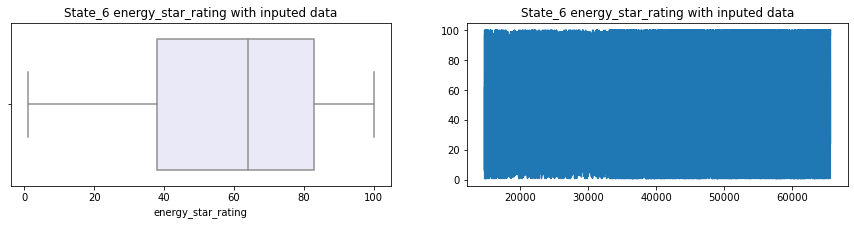

_______
State_8
_______
3701 registros


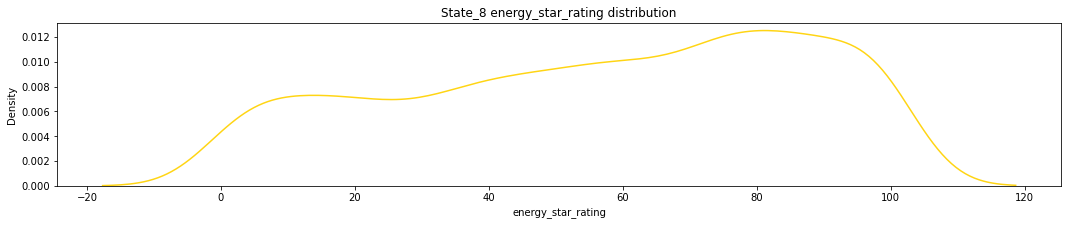

Originalmente hay 1252 na's
Información general: count    2449.000000
mean       57.087383
std        29.647447
min         1.000000
25%        34.000000
50%        61.000000
75%        83.000000
max       100.000000
Name: energy_star_rating, dtype: float64
2449 registros


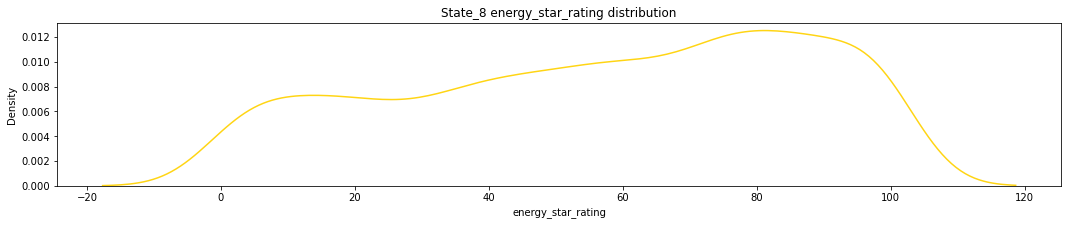

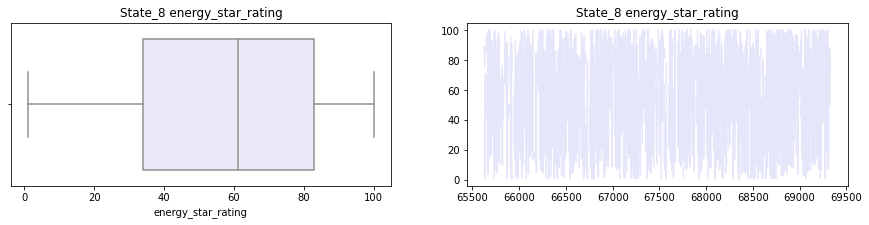

El número óptimo de clústers es 4


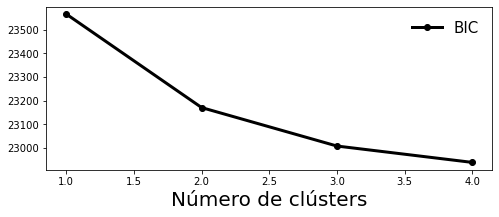

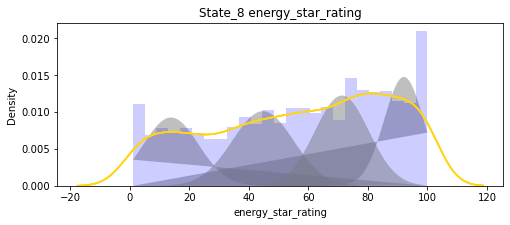

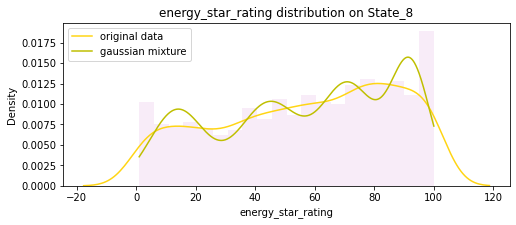

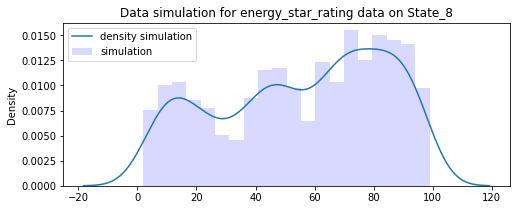

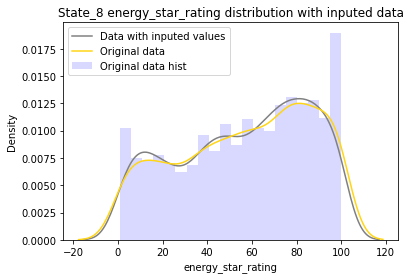

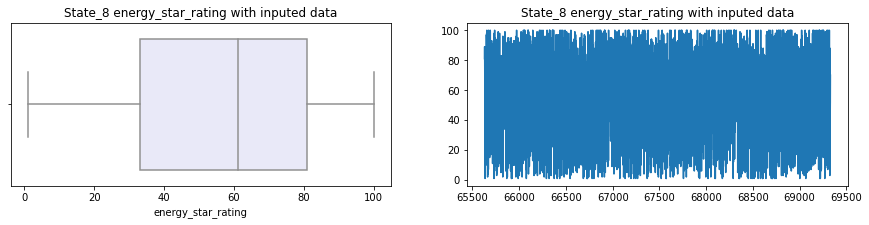

_______
State_11
_______
6412 registros


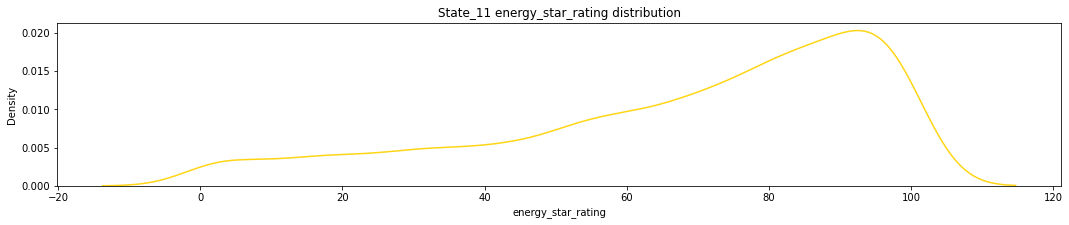

Originalmente hay 1517 na's
Información general: count    4895.000000
mean       68.046374
std        26.853910
min         1.000000
25%        52.000000
50%        76.000000
75%        90.000000
max       100.000000
Name: energy_star_rating, dtype: float64
4895 registros


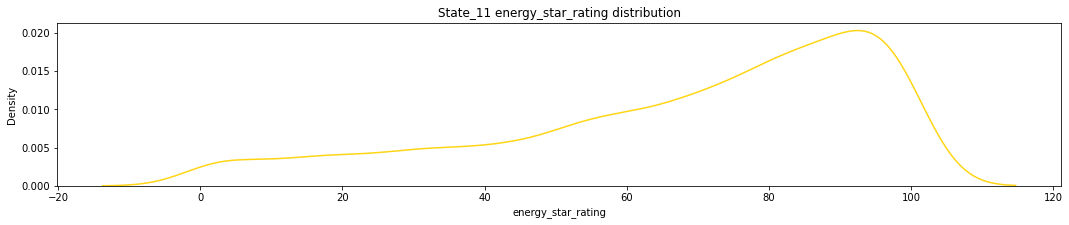

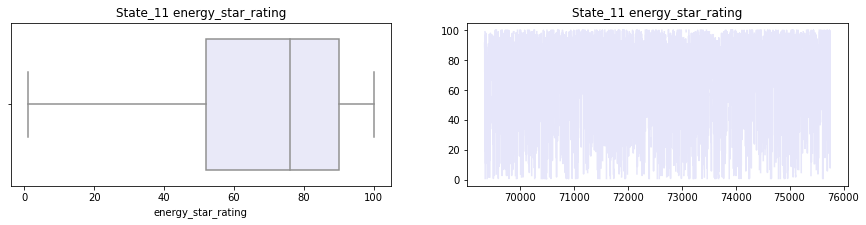

El número óptimo de clústers es 4


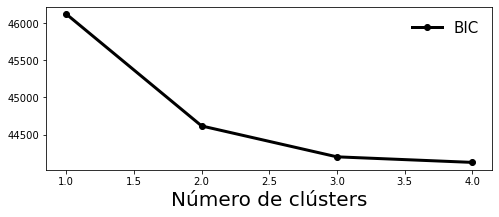

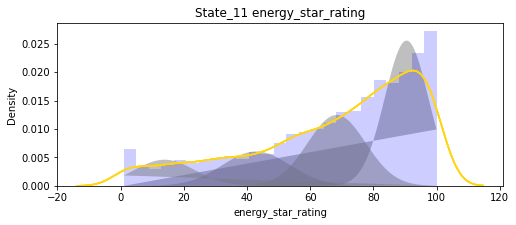

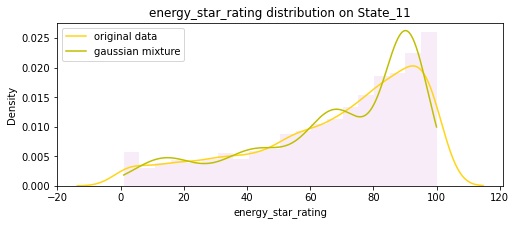

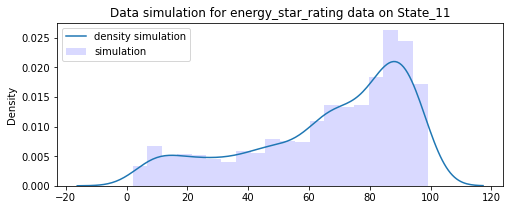

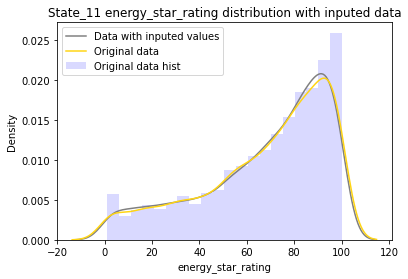

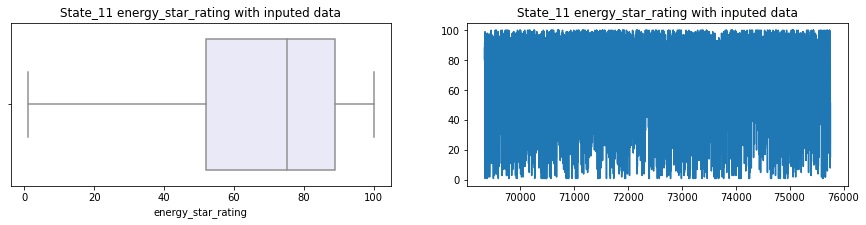

In [79]:
#Simulación training
#Solo valores enteros -> integ = True
#Puede haber valores cero -> zero = True
t1s = list(mixed_normal_sim(data = train1[feature], state = 'State_1', feature = feature, integ = True, zero = True))
# t2s = list(mixed_normal_sim(data = train2[feature], state = 'State_2', feature = feature, integ = True, zero = True))
t4s = list(mixed_normal_sim(data = train4[feature], state = 'State_4', feature = feature, integ = True, zero = True))
t6s = list(mixed_normal_sim(data = train6[feature], state = 'State_6', feature = feature, integ = True, zero = True))
t8s = list(mixed_normal_sim(data = train8[feature], state = 'State_8', feature = feature, integ = True, zero = True))
# t10s = list(mixed_normal_sim(data = train10[feature], state = 'State_10', feature = feature, integ = True, zero = True))
t11s = list(mixed_normal_sim(data = train11[feature], state = 'State_11', feature = feature, integ = True, zero = True))

Train 2
Se tienen 4871 datos
Se tienen 1011 na's
Train 10:
Se tienen 15 datos
Se tienen 3 na's


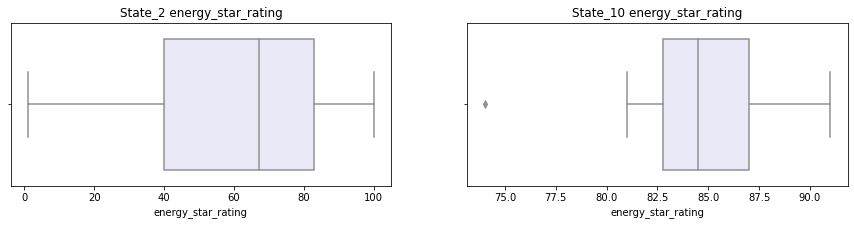

In [80]:
plt.figure(figsize = (15,3))
plt.subplot(121)
sns.boxplot(train2[feature], color = 'lavender')
plt.title('State_2' +' '+feature )
print("Train 2")
print(f"Se tienen {len(train2[feature])} datos")
print(f"Se tienen {train2[feature].isna().sum()} na's")
plt.subplot(122)
sns.boxplot(train10[feature], color = 'lavender')
plt.title('State_10' +' '+feature )
print('Train 10:')
print(f"Se tienen {len(train10[feature])} datos")
print(f"Se tienen {train10[feature].isna().sum()} na's")
plt.show()

In [81]:
t2s = list(train2[feature].fillna(value = train2[feature].mean()))
t10s = list(train10[feature].fillna(value = np.nanpercentile(train10[feature],50)))

In [82]:
#Solo se imputan valores en los estados donde hay na's
list(test[test[feature].isna()]['State_Factor'].unique())

['State_2', 'State_8', 'State_11', 'State_1', 'State_4']

_______
State_1
_______
1027 registros


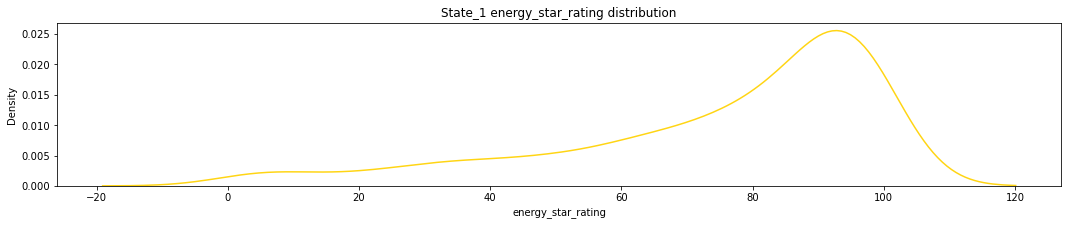

Originalmente hay 307 na's
Información general: count    720.000000
mean      74.698611
std       24.980538
min        1.000000
25%       62.000000
50%       84.000000
75%       94.000000
max      100.000000
Name: energy_star_rating, dtype: float64
720 registros


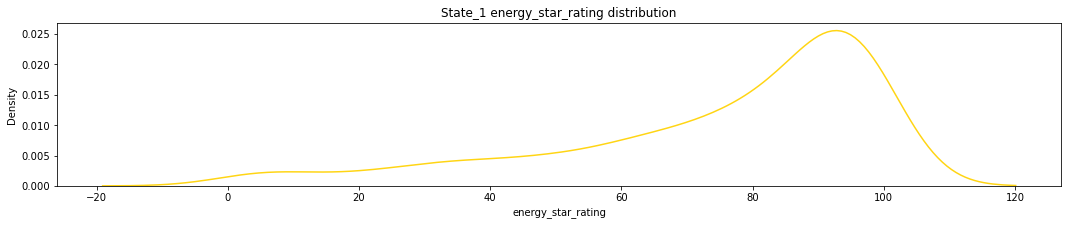

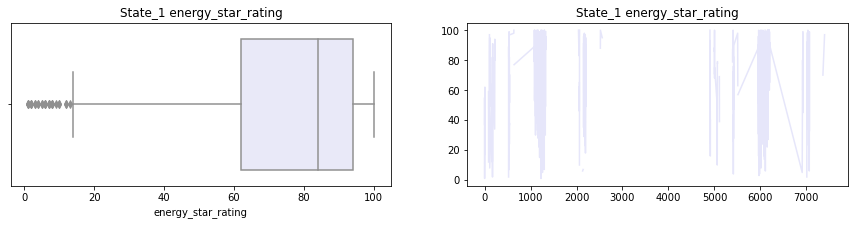

El número óptimo de clústers es 3


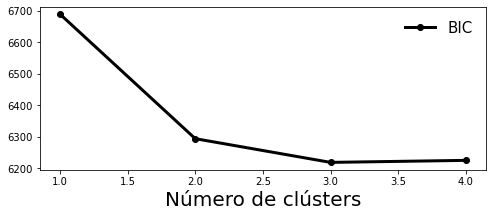

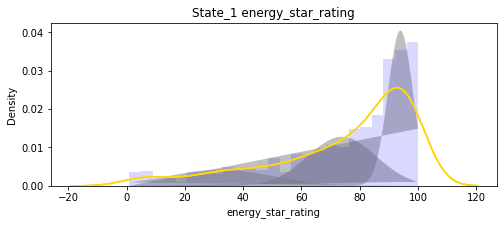

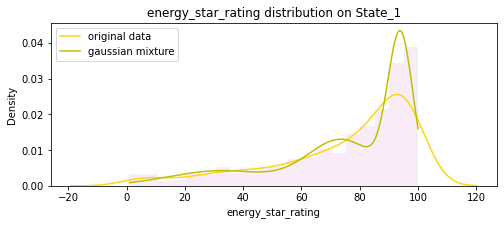

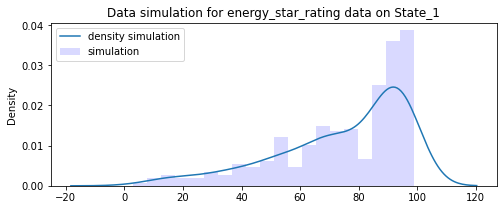

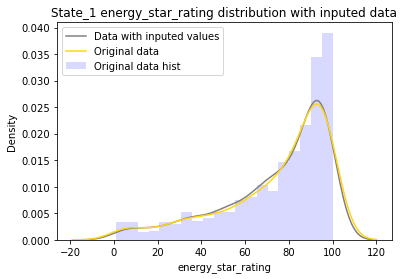

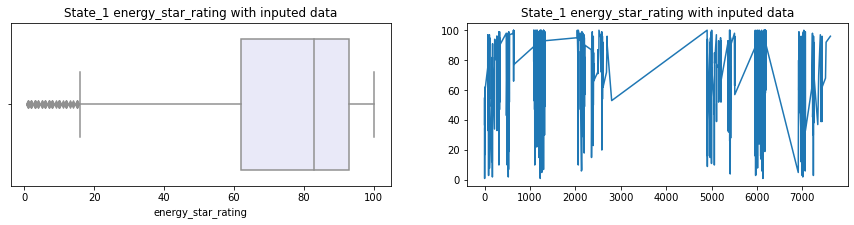

_______
State_4
_______
2568 registros


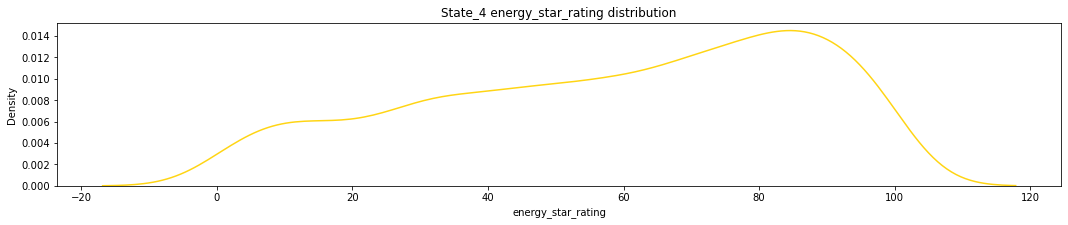

Originalmente hay 344 na's
Información general: count    2224.000000
mean       58.913219
std        27.791608
min         1.000000
25%        37.000000
50%        63.000000
75%        83.000000
max       100.000000
Name: energy_star_rating, dtype: float64
2224 registros


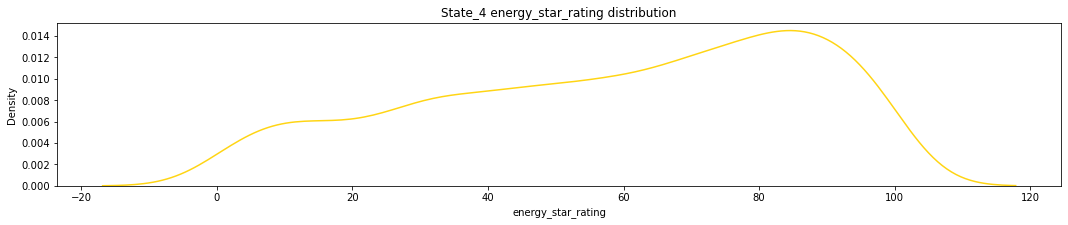

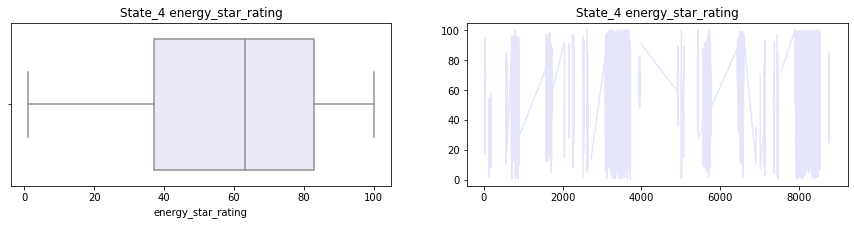

El número óptimo de clústers es 4


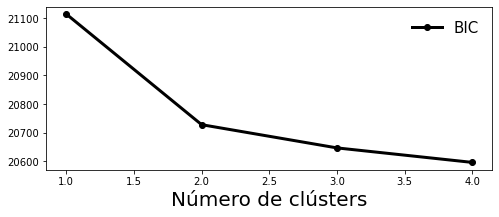

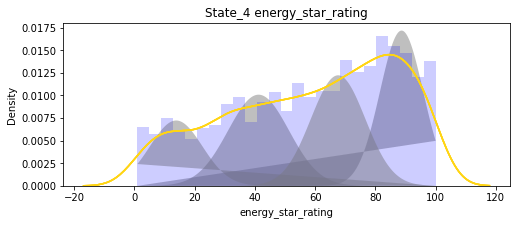

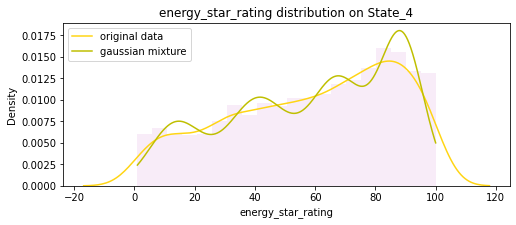

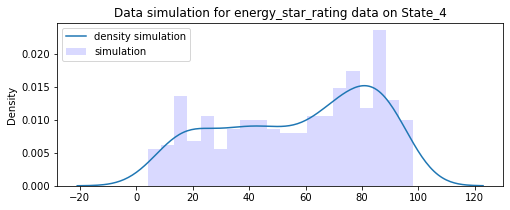

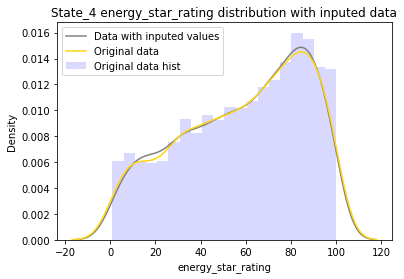

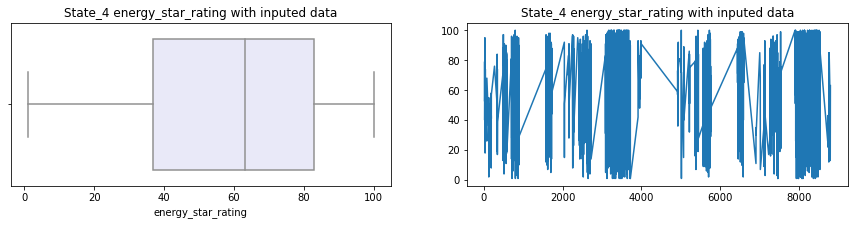

_______
State_8
_______
1323 registros


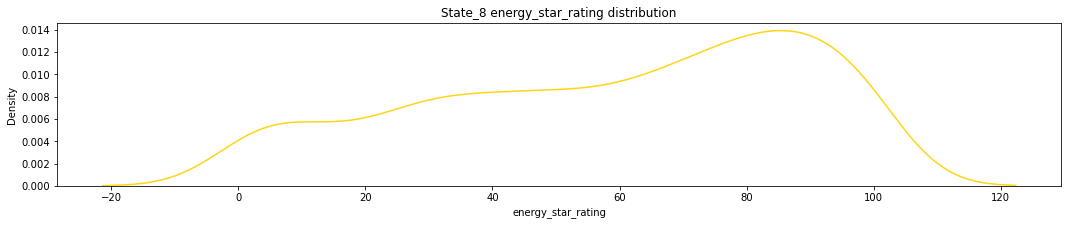

Originalmente hay 351 na's
Información general: count    972.000000
mean      59.131687
std       29.500740
min        1.000000
25%       36.000000
50%       65.000000
75%       85.000000
max      100.000000
Name: energy_star_rating, dtype: float64
972 registros


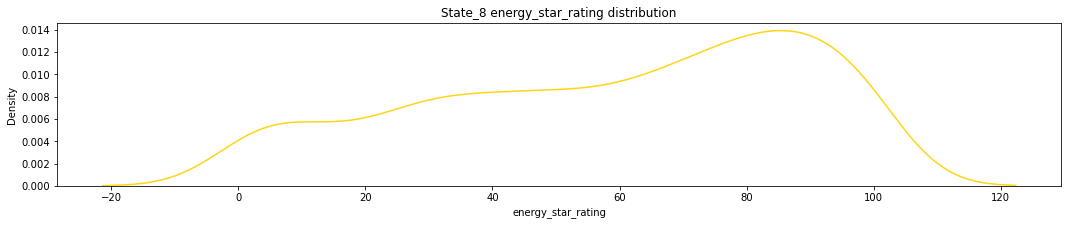

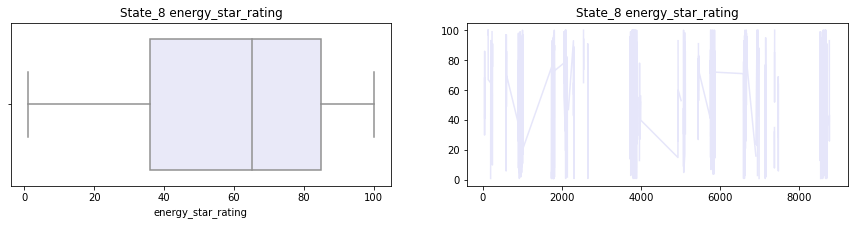

El número óptimo de clústers es 4


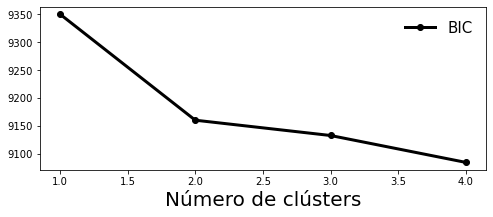

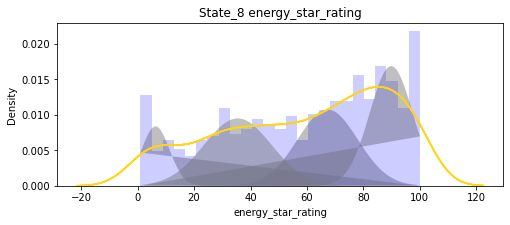

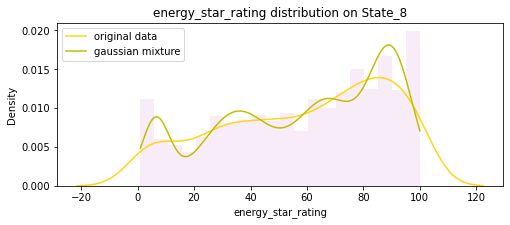

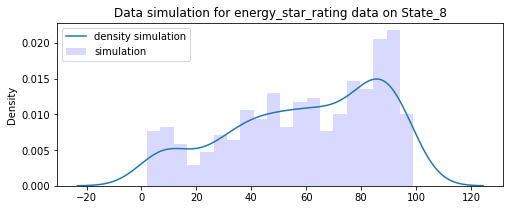

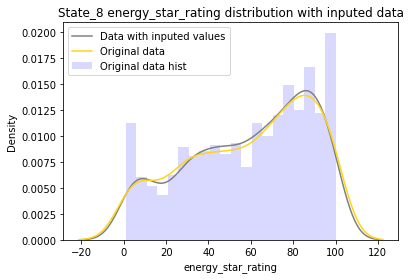

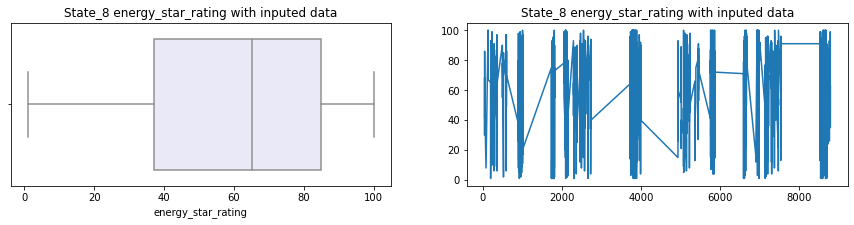

_______
State_11
_______
3268 registros


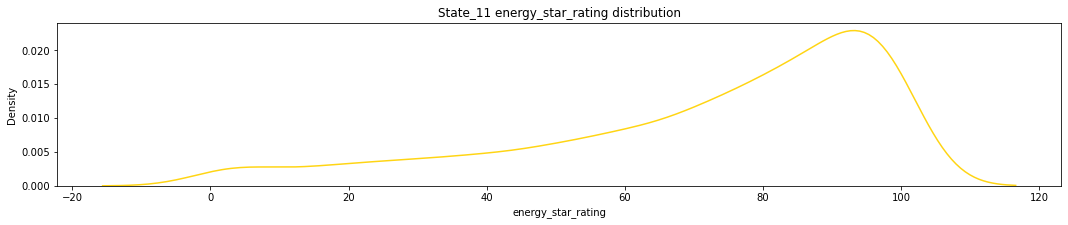

Originalmente hay 928 na's
Información general: count    2340.000000
mean       71.587607
std        26.136347
min         1.000000
25%        58.000000
50%        80.000000
75%        92.000000
max       100.000000
Name: energy_star_rating, dtype: float64
2340 registros


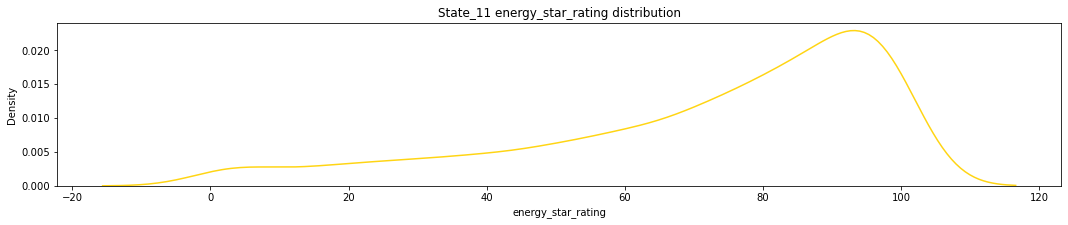

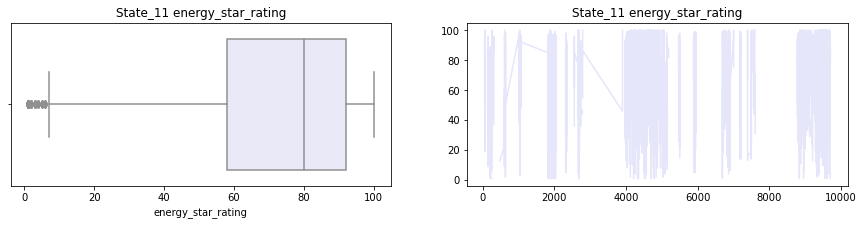

El número óptimo de clústers es 4


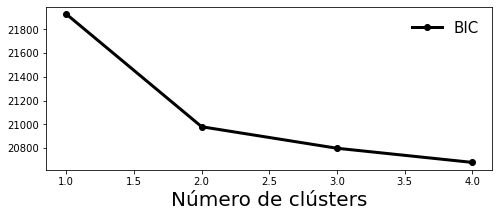

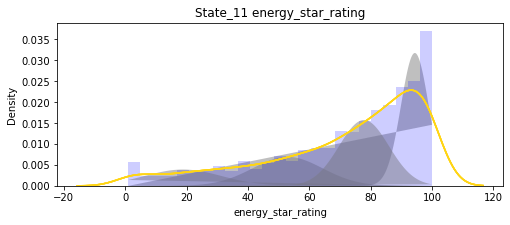

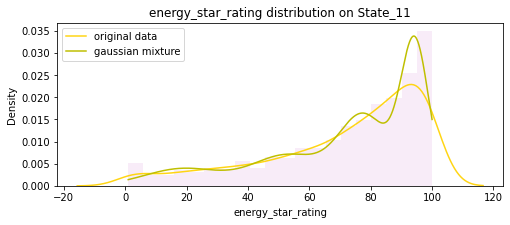

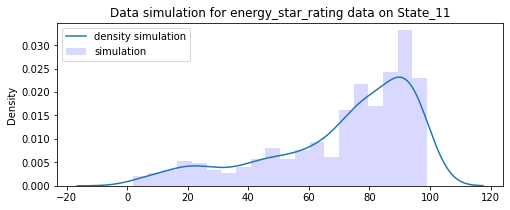

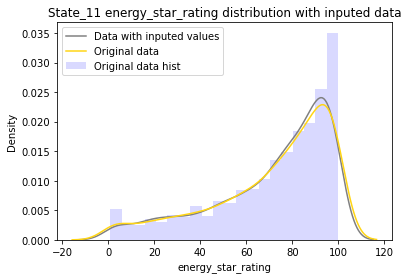

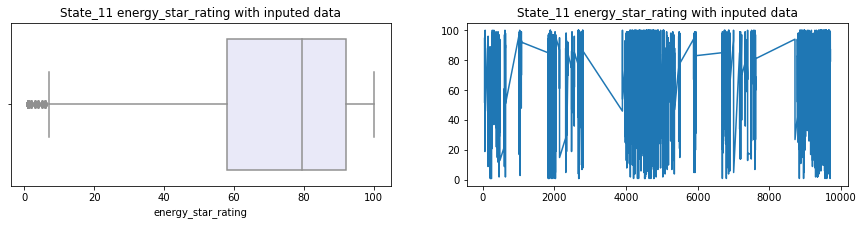

In [83]:
#Simulación testing
#Solo valores enteros -> integ = True
#Puede haber valores cero -> zero = True
te1s = list(mixed_normal_sim(data = test1[feature], state = 'State_1', feature = feature, integ = True, zero = True))
# te2s = list(mixed_normal_sim(data = test2[feature], state = 'State_2', feature = feature, integ = True, zero = True))
te4s = list(mixed_normal_sim(data = test4[feature], state = 'State_4', feature = feature, integ = True, zero = True))
te8s = list(mixed_normal_sim(data = test8[feature], state = 'State_8', feature = feature, integ = True, zero = True))
te11s = list(mixed_normal_sim(data = test11[feature], state = 'State_11', feature = feature, integ = True, zero = True))

In [84]:
te2s = list(test2[feature].fillna(value = test2[feature].mean()))

In [85]:
#Imputación training
counter = 0
for i in t1index:
    train1[feature][i] = t1s[counter]
    counter = counter+1

counter = 0
for i in t2index:
    train2[feature][i] = t2s[counter]
    counter = counter+1

counter = 0
for i in t4index:
    train4[feature][i] = t4s[counter]
    counter = counter+1

counter = 0
for i in t6index:
    train6[feature][i] = t6s[counter]
    counter = counter+1
    
counter = 0
for i in t8index:
    train8[feature][i] = t8s[counter]
    counter = counter+1

counter = 0    
for i in t10index:
    train10[feature][i] = t10s[counter]
    counter = counter+1
    
counter = 0
for i in t11index:
    train11[feature][i] = t11s[counter]
    counter = counter+1
    
    
#Imputación testing
counter = 0
for i in te1index:
    test1[feature][i] = te1s[counter]
    counter = counter+1

counter = 0
for i in te2index:
    test2[feature][i] = te2s[counter]
    counter = counter+1

counter = 0
for i in te4index:
    test4[feature][i] = te4s[counter]
    counter = counter+1
    
counter = 0
for i in te8index:
    test8[feature][i] = te8s[counter]
    counter = counter+1
    
counter = 0
for i in te11index:
    test11[feature][i] = te11s[counter]
    counter = counter+1

# Variables donde la mayoría de sus datos son na's

## days_with_fog
número de días con niebla en la ubicación del edificio

In [86]:
feature = 'days_with_fog'

In [87]:
#Cantidad de valores diferentes
len(list(train[feature].unique()))

43

In [88]:
train[feature].describe()

count    29961.000000
mean       109.142051
std         50.699751
min         12.000000
25%         88.000000
50%        104.000000
75%        131.000000
max        311.000000
Name: days_with_fog, dtype: float64

In [89]:
#Porcentajes de na por estado
print(train1[feature].isna().sum()/len(train1))
print(train2[feature].isna().sum()/len(train2))
print(train4[feature].isna().sum()/len(train4))
print(train6[feature].isna().sum()/len(train6))
print(train8[feature].isna().sum()/len(train8))
print(train10[feature].isna().sum()/len(train10))
print(train11[feature].isna().sum()/len(train11))

0.8787824848700605
0.9252720180661055
0.5504651162790698
0.507690794649882
0.6425290462037287
0.26666666666666666
0.9033063006862133


La mediana es: 88.0
La moda es 88.0


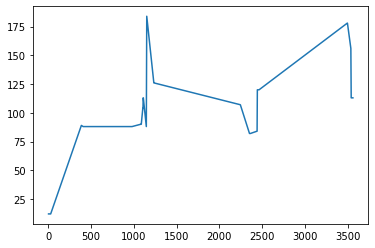

La mediana es: 110.0
La moda es 110.0


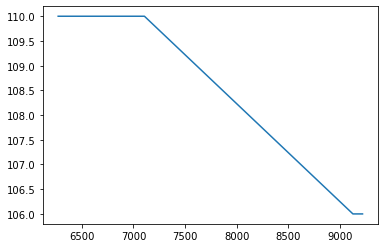

La mediana es: 176.0
La moda es 267.0


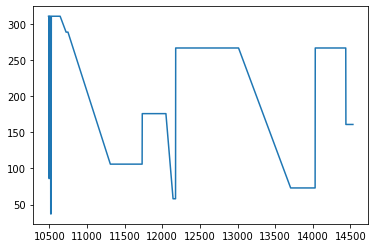

La mediana es: 104.0
La moda es 131.0


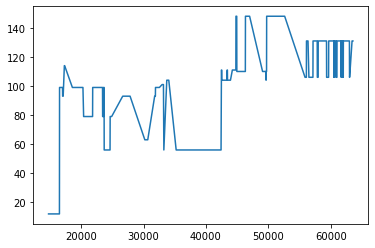

La mediana es: 116.0
La moda es 116.0


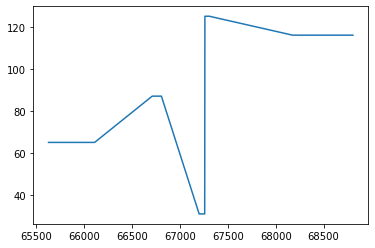

La mediana es: 106.0
La moda es 106.0


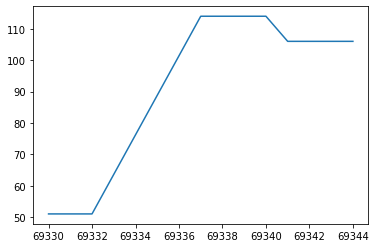

La mediana es: 261.0
La moda es 261.0


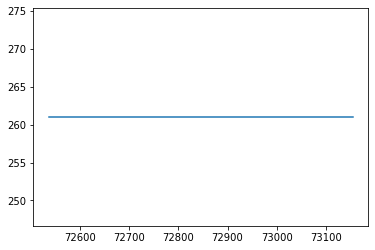

In [90]:
plt.plot(train1[train1[feature].isna() == False][feature])
print(f"La mediana es: {np.nanpercentile(train1[feature],50)}")
print(f"La moda es {scipy.stats.mode(train1[feature])[0][0]}")
plt.show()
plt.plot(train2[train2[feature].isna() == False][feature])
print(f"La mediana es: {np.nanpercentile(train2[feature],50)}")
print(f"La moda es {scipy.stats.mode(train2[feature])[0][0]}")
plt.show()
plt.plot(train4[train4[feature].isna() == False][feature])
print(f"La mediana es: {np.nanpercentile(train4[feature],50)}")
print(f"La moda es {scipy.stats.mode(train4[feature])[0][0]}")
plt.show()
plt.plot(train6[train6[feature].isna() == False][feature])
print(f"La mediana es: {np.nanpercentile(train6[feature],50)}")
print(f"La moda es {scipy.stats.mode(train6[feature])[0][0]}")
plt.show()
plt.plot(train8[train8[feature].isna() == False][feature])
print(f"La mediana es: {np.nanpercentile(train8[feature],50)}")
print(f"La moda es {scipy.stats.mode(train8[feature])[0][0]}")
plt.show()
plt.plot(train10[train10[feature].isna() == False][feature])
print(f"La mediana es: {np.nanpercentile(train10[feature],50)}")
print(f"La moda es {scipy.stats.mode(train10[feature])[0][0]}")
plt.show()
plt.plot(train11[train11[feature].isna() == False][feature])
print(f"La mediana es: {np.nanpercentile(train11[feature],50)}")
print(f"La moda es {scipy.stats.mode(train11[feature])[0][0]}")
plt.show()

In [91]:
#Según el comportamiento de los datos !=na, se imputaron los faltantes
t1s = train1[feature].fillna(value = np.nanpercentile(train1[feature],50))
t2s = train2[feature].fillna(value = np.nanpercentile(train2[feature],50))
t4s = train4[feature].fillna(value = np.nanpercentile(train4[feature],50))
t6s = train6[feature].fillna(value = np.nanpercentile(train6[feature],50))
t8s = train8[feature].fillna(value = np.nanpercentile(train8[feature],50))
t10s = train10[feature].fillna(value = np.nanpercentile(train10[feature],50))
t11s = train11[feature].fillna(value = np.nanpercentile(train11[feature],50))

In [92]:
#Porcentaje de na's en testing
print(test1[feature].isna().sum()/len(test1))
print(test2[feature].isna().sum()/len(test2)) #Todos son na's
print(test4[feature].isna().sum()/len(test4))
print(test8[feature].isna().sum()/len(test8))
print(test10[feature].isna().sum()/len(test10))#No hay nans
print(test11[feature].isna().sum()/len(test11))

0.9902629016553067
1.0
0.911993769470405
0.8359788359788359
0.0
0.9599143206854345


La mediana es: 126.0
La moda es 126.0


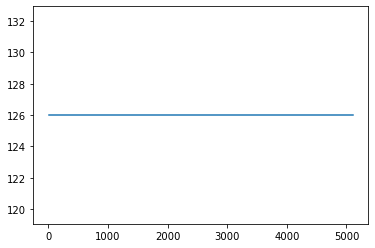

La mediana es: nan
La moda es nan


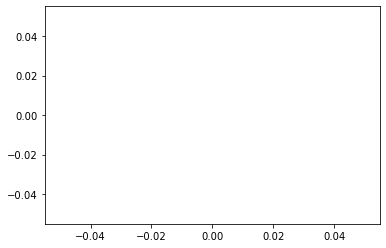

La mediana es: 138.0
La moda es 138.0


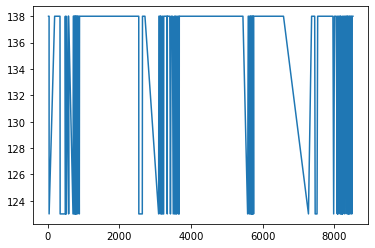

La mediana es: 129.0
La moda es 129.0


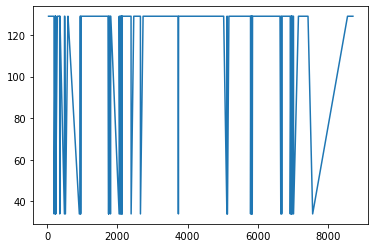

La mediana es: 250.0
La moda es 250.0


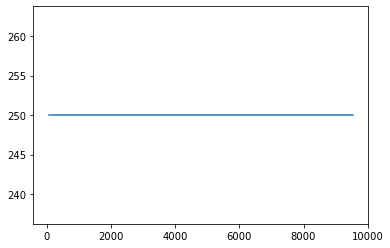

In [93]:
plt.plot(test1[test1[feature].isna() == False][feature])
print(f"La mediana es: {np.nanpercentile(test1[feature],50)}")
print(f"La moda es {scipy.stats.mode(test1[feature])[0][0]}")
plt.show()
plt.plot(test2[test2[feature].isna() == False][feature])
print(f"La mediana es: {np.nanpercentile(test2[feature],50)}")
print(f"La moda es {scipy.stats.mode(test2[feature])[0][0]}")
plt.show()
plt.plot(test4[test4[feature].isna() == False][feature])
print(f"La mediana es: {np.nanpercentile(test4[feature],50)}")
print(f"La moda es {scipy.stats.mode(test4[feature])[0][0]}")
plt.show()
plt.plot(test8[test8[feature].isna() == False][feature])
print(f"La mediana es: {np.nanpercentile(test8[feature],50)}")
print(f"La moda es {scipy.stats.mode(test8[feature])[0][0]}")
plt.show()
plt.plot(test11[test11[feature].isna() == False][feature])
print(f"La mediana es: {np.nanpercentile(test11[feature],50)}")
print(f"La moda es {scipy.stats.mode(test11[feature])[0][0]}")
plt.show()

In [94]:
list(test10[test10[feature].isna() == False][feature])

[107.0, 107.0, 107.0, 107.0]

In [95]:
te1s = test1[feature].fillna(value = np.nanpercentile(test1[feature],50))
te2s = test2[feature].fillna(value = 107)
te4s = test4[feature].fillna(value = np.nanpercentile(test4[feature],50))
te8s = test8[feature].fillna(value = np.nanpercentile(test8[feature],50))
te11s = test11[feature].fillna(value = np.nanpercentile(test11[feature],50))

In [96]:
#Imputación training
for i in t1index:
    train1[feature][i] = t1s[i]

for i in t2index:
    train2[feature][i] = t2s[i]

for i in t4index:
    train4[feature][i] = t4s[i]

for i in t6index:
    train6[feature][i] = t6s[i]

for i in t8index:
    train8[feature][i] = t8s[i]

for i in t10index:
    train10[feature][i] = t10s[i]

for i in t11index:
    train11[feature][i] = t11s[i]
   
    
#Imputación testing
for i in te1index:
    test1[feature][i] = te1s[i]

for i in te2index:
    test2[feature][i] = te2s[i]

for i in te4index:
    test4[feature][i] = te4s[i]

for i in te8index:
    test8[feature][i] = te8s[i]

for i in te11index:
    test11[feature][i] = te11s[i]


## max_wind_speed
velocidad máxima del viento en la ubicación del edificio

In [97]:
feature = 'max_wind_speed'

In [98]:
train[feature].isna().sum()/len(train)

0.5422865213775625

In [99]:
len(list(train[feature].unique()))

17

In [100]:
train[feature].describe()

count    34675.000000
mean         4.190601
std          6.458789
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         23.300000
Name: max_wind_speed, dtype: float64

In [101]:
#Porcentajes de na por estado
print(train1[feature].isna().sum()/len(train1))
print(train2[feature].isna().sum()/len(train2))
print(train4[feature].isna().sum()/len(train4))
print(train6[feature].isna().sum()/len(train6))
print(train8[feature].isna().sum()/len(train8))
print(train10[feature].isna().sum()/len(train10))
print(train11[feature].isna().sum()/len(train11))

0.8652545389818441
0.9252720180661055
0.9044186046511627
0.38796223446105427
0.6228046473925966
0.26666666666666666
0.9033063006862133


La mediana es: 1.0
La moda es 1.0


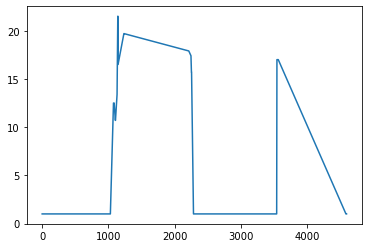

La mediana es: 1.0
La moda es 1.0


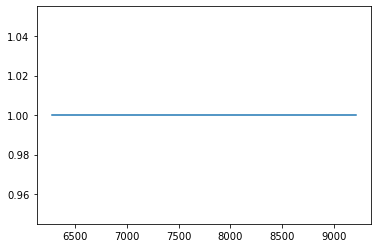

La mediana es: 17.4
La moda es 17.4


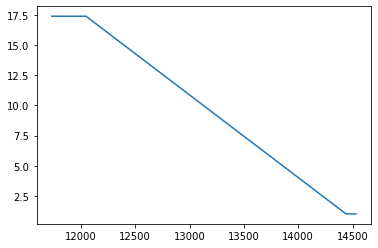

La mediana es: 1.0
La moda es 1.0


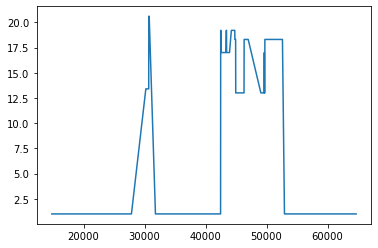

La mediana es: 1.0
La moda es 1.0


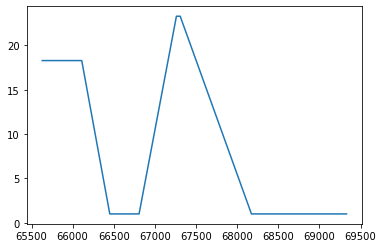

La mediana es: 19.2
La moda es 1.0


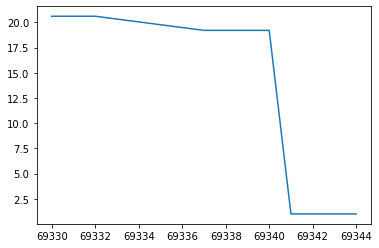

La mediana es: 1.0
La moda es 1.0


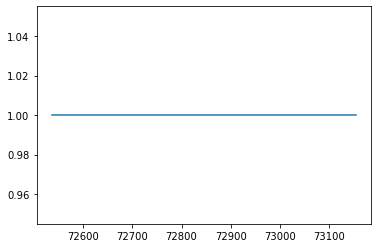

In [102]:
plt.plot(train1[train1[feature].isna() == False][feature])
print(f"La mediana es: {np.nanpercentile(train1[feature],50)}")
print(f"La moda es {scipy.stats.mode(train1[feature])[0][0]}")
plt.show()
plt.plot(train2[train2[feature].isna() == False][feature])
print(f"La mediana es: {np.nanpercentile(train2[feature],50)}")
print(f"La moda es {scipy.stats.mode(train2[feature])[0][0]}")
plt.show()
plt.plot(train4[train4[feature].isna() == False][feature])
print(f"La mediana es: {np.nanpercentile(train4[feature],50)}")
print(f"La moda es {scipy.stats.mode(train4[feature])[0][0]}")
plt.show()
plt.plot(train6[train6[feature].isna() == False][feature])
print(f"La mediana es: {np.nanpercentile(train6[feature],50)}")
print(f"La moda es {scipy.stats.mode(train6[feature])[0][0]}")
plt.show()
plt.plot(train8[train8[feature].isna() == False][feature])
print(f"La mediana es: {np.nanpercentile(train8[feature],50)}")
print(f"La moda es {scipy.stats.mode(train8[feature])[0][0]}")
plt.show()
plt.plot(train10[train10[feature].isna() == False][feature])
print(f"La mediana es: {np.nanpercentile(train10[feature],50)}")
print(f"La moda es {scipy.stats.mode(train10[feature])[0][0]}")
plt.show()
plt.plot(train11[train11[feature].isna() == False][feature])
print(f"La mediana es: {np.nanpercentile(train11[feature],50)}")
print(f"La moda es {scipy.stats.mode(train11[feature])[0][0]}")
plt.show()

In [103]:
#Según el comportamiento de los datos !=na, se imputaron los faltantes
t1s = train1[feature].fillna(value = np.nanpercentile(train1[feature],50))
t2s = train2[feature].fillna(value = np.nanpercentile(train2[feature],50))
t4s = train4[feature].fillna(value = np.nanpercentile(train4[feature],50))
t6s = train6[feature].fillna(value = np.nanpercentile(train6[feature],50))
t8s = train8[feature].fillna(value = np.nanpercentile(train8[feature],50))
t10s = train10[feature].fillna(value = np.nanpercentile(train10[feature],50))
t11s = train11[feature].fillna(value = np.nanpercentile(train11[feature],50))

In [104]:
#Porcentaje de na's en testing
print(test1[feature].isna().sum()/len(test1))
print(test2[feature].isna().sum()/len(test2)) #Todos son na's
print(test4[feature].isna().sum()/len(test4))
print(test8[feature].isna().sum()/len(test8))
print(test10[feature].isna().sum()/len(test10))#No hay nans
print(test11[feature].isna().sum()/len(test11))

0.9902629016553067
1.0
0.7655763239875389
0.8556311413454271
0.0
0.9011627906976745


La mediana es: 22.8
La moda es 22.8


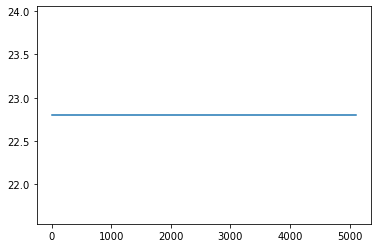

La mediana es: nan
La moda es nan


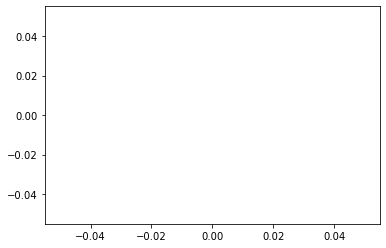

La mediana es: 19.2
La moda es 20.6


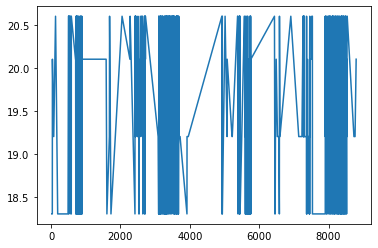

La mediana es: 17.9
La moda es 17.9


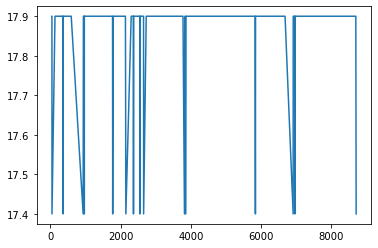

La mediana es: 14.8
La moda es 14.8


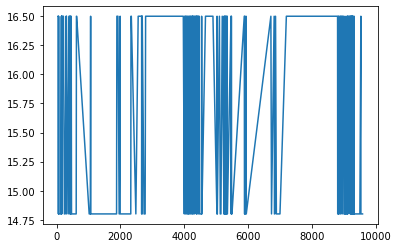

In [105]:
plt.plot(test1[test1[feature].isna() == False][feature])
print(f"La mediana es: {np.nanpercentile(test1[feature],50)}")
print(f"La moda es {scipy.stats.mode(test1[feature])[0][0]}")
plt.show()
plt.plot(test2[test2[feature].isna() == False][feature])
print(f"La mediana es: {np.nanpercentile(test2[feature],50)}")
print(f"La moda es {scipy.stats.mode(test2[feature])[0][0]}")
plt.show()
plt.plot(test4[test4[feature].isna() == False][feature])
print(f"La mediana es: {np.nanpercentile(test4[feature],50)}")
print(f"La moda es {scipy.stats.mode(test4[feature])[0][0]}")
plt.show()
plt.plot(test8[test8[feature].isna() == False][feature])
print(f"La mediana es: {np.nanpercentile(test8[feature],50)}")
print(f"La moda es {scipy.stats.mode(test8[feature])[0][0]}")
plt.show()
plt.plot(test11[test11[feature].isna() == False][feature])
print(f"La mediana es: {np.nanpercentile(test11[feature],50)}")
print(f"La moda es {scipy.stats.mode(test11[feature])[0][0]}")
plt.show()

In [106]:
list(test10[test10[feature].isna() == False][feature])

[23.3, 23.3, 23.3, 23.3]

In [107]:
te1s = test1[feature].fillna(value = np.nanpercentile(test1[feature],50))
te2s = test2[feature].fillna(value = 23.3)
te4s = test4[feature].fillna(value = np.nanpercentile(test4[feature],50))
te8s = test8[feature].fillna(value = np.nanpercentile(test8[feature],50))
te11s = test11[feature].fillna(value = np.nanpercentile(test11[feature],50))

In [108]:
#Imputación training
for i in t1index:
    train1[feature][i] = t1s[i]

for i in t2index:
    train2[feature][i] = t2s[i]

for i in t4index:
    train4[feature][i] = t4s[i]

for i in t6index:
    train6[feature][i] = t6s[i]

for i in t8index:
    train8[feature][i] = t8s[i]

for i in t10index:
    train10[feature][i] = t10s[i]

for i in t11index:
    train11[feature][i] = t11s[i]
   
    
#Imputación testing

for i in te1index:
    test1[feature][i] = te1s[i]

for i in te2index:
    test2[feature][i] = te2s[i]

for i in te4index:
    test4[feature][i] = te4s[i]

for i in te8index:
    test8[feature][i] = te8s[i]

for i in te11index:
    test11[feature][i] = te11s[i]


## direction_max_wind_speed
dirección del viento para la velocidad máxima de ráfagas de viento en la ubicación del edificio. Dado en direcciones de punto de brújula de 360 ​​grados (por ejemplo, 360 = norte, 180 = sur, etc.).

In [109]:
feature = 'direction_max_wind_speed'

In [110]:
train[feature].isna().sum()/len(train)

0.5422865213775625

In [111]:
list(train[feature].unique())

[1.0, nan, 270.0, 360.0, 300.0, 320.0, 330.0, 340.0, 280.0, 310.0, 350.0]

In [112]:
#Cambiar valores 1 a 360°
train1[feature] = np.select([train1[feature]==1],
                          [360],
                          default = train1[feature])
train2[feature] = np.select([train2[feature]==1],
                          [360],
                          default = train2[feature])
train4[feature] = np.select([train4[feature]==1],
                          [360],
                          default = train4[feature])
train6[feature] = np.select([train6[feature]==1],
                          [360],
                          default = train6[feature])
train8[feature] = np.select([train8[feature]==1],
                          [360],
                          default = train8[feature])
train10[feature] = np.select([train10[feature]==1],
                          [360],
                          default = train10[feature])
train11[feature] = np.select([train11[feature]==1],
                          [360],
                          default = train11[feature])
list(train1[feature].unique())

[360.0, nan, 270.0, 300.0, 320.0, 330.0, 340.0, 280.0]

In [113]:
#Porcentajes de na por estado
print(train1[feature].isna().sum()/len(train1))
print(train2[feature].isna().sum()/len(train2))
print(train4[feature].isna().sum()/len(train4))
print(train6[feature].isna().sum()/len(train6))
print(train8[feature].isna().sum()/len(train8))
print(train10[feature].isna().sum()/len(train10))
print(train11[feature].isna().sum()/len(train11))

0.8652545389818441
0.9252720180661055
0.9044186046511627
0.38796223446105427
0.6228046473925966
0.26666666666666666
0.9033063006862133


In [114]:
t1s = train1[feature].fillna(value = np.nanpercentile(train1[feature],50))
t2s = train2[feature].fillna(value = np.nanpercentile(train2[feature],50))
t4s = train4[feature].fillna(value = np.nanpercentile(train4[feature],50))
t6s = train6[feature].fillna(value = np.nanpercentile(train6[feature],50))
t8s = train8[feature].fillna(value = np.nanpercentile(train8[feature],50))
t10s = train10[feature].fillna(value = np.nanpercentile(train10[feature],50))
t11s = train11[feature].fillna(value = np.nanpercentile(train11[feature],50))

In [115]:
list(test[feature].unique())

[nan, 340.0, 320.0, 310.0, 330.0, 280.0, 360.0]

In [116]:
#Porcentaje de na's en testing
print(test1[feature].isna().sum()/len(test1))
print(test2[feature].isna().sum()/len(test2)) #Todos son na's
print(test4[feature].isna().sum()/len(test4))
print(test8[feature].isna().sum()/len(test8))
print(test10[feature].isna().sum()/len(test10))#No hay nans 
print(test11[feature].isna().sum()/len(test11))

0.9902629016553067
1.0
0.7655763239875389
0.8556311413454271
0.0
0.9011627906976745


In [117]:
te1s = test1[feature].fillna(value = np.nanpercentile(test1[feature],50))
te2s = test2[feature].fillna(value = 360)
te4s = test4[feature].fillna(value = np.nanpercentile(test4[feature],50))
te8s = test8[feature].fillna(value = np.nanpercentile(test8[feature],50))
te11s = test11[feature].fillna(value = np.nanpercentile(test11[feature],50))

In [118]:
#Imputación training

for i in t1index:
    train1[feature][i] = t1s[i]

for i in t2index:
    train2[feature][i] = t2s[i]

for i in t4index:
    train4[feature][i] = t4s[i]

for i in t6index:
    train6[feature][i] = t6s[i]

for i in t8index:
    train8[feature][i] = t8s[i]

for i in t10index:
    train10[feature][i] = t10s[i]

for i in t11index:
    train11[feature][i] = t11s[i]
   
    
#Imputación testing
for i in te1index:
    test1[feature][i] = te1s[i]

for i in te2index:
    test2[feature][i] = te2s[i]

for i in te4index:
    test4[feature][i] = te4s[i]

for i in te8index:
    test8[feature][i] = te8s[i]

for i in te11index:
    test11[feature][i] = te11s[i]

## direction_peak_wind_speed
dirección del viento para la velocidad máxima de ráfagas de viento en la ubicación del edificio. Dado en direcciones de punto de brújula de 360 ​​grados (por ejemplo, 360 = norte, 180 = sur, etc.).

In [119]:
feature = 'direction_peak_wind_speed'

In [120]:
train[feature].isna().sum()/len(train)

0.5519093945113983

In [121]:
list(train[feature].unique())

[1.0, nan, 270.0, 320.0, 340.0, 360.0, 330.0, 310.0, 350.0]

In [122]:
#Cambiar valores 1 a 360°
train1[feature] = np.select([train1[feature]==1],
                          [360],
                          default = train1[feature])
train2[feature] = np.select([train2[feature]==1],
                          [360],
                          default = train2[feature])
train4[feature] = np.select([train4[feature]==1],
                          [360],
                          default = train4[feature])
train6[feature] = np.select([train6[feature]==1],
                          [360],
                          default = train6[feature])
train8[feature] = np.select([train8[feature]==1],
                          [360],
                          default = train8[feature])
train10[feature] = np.select([train10[feature]==1],
                          [360],
                          default = train10[feature])
train11[feature] = np.select([train11[feature]==1],
                          [360],
                          default = train11[feature])
list(train1[feature].unique())

[360.0, nan, 270.0, 320.0, 340.0, 330.0]

In [123]:
#Porcentajes de na por estado
print(train1[feature].isna().sum()/len(train1))
print(train2[feature].isna().sum()/len(train2))
print(train4[feature].isna().sum()/len(train4))
print(train6[feature].isna().sum()/len(train6))
print(train8[feature].isna().sum()/len(train8))
print(train10[feature].isna().sum()/len(train10))
print(train11[feature].isna().sum()/len(train11))

0.8720185119259523
0.9252720180661055
0.9044186046511627
0.4015538945712038
0.6228046473925966
0.26666666666666666
0.9033063006862133


In [124]:
t1s = train1[feature].fillna(value = np.nanpercentile(train1[feature],50))
t2s = train2[feature].fillna(value = np.nanpercentile(train2[feature],50))
t4s = train4[feature].fillna(value = np.nanpercentile(train4[feature],50))
t6s = train6[feature].fillna(value = np.nanpercentile(train6[feature],50))
t8s = train8[feature].fillna(value = np.nanpercentile(train8[feature],50))
t10s = train10[feature].fillna(value = np.nanpercentile(train10[feature],50))
t11s = train11[feature].fillna(value = np.nanpercentile(train11[feature],50))

In [125]:
list(test[feature].unique())

[nan, 330.0, 320.0, 340.0, 350.0, 270.0, 240.0]

In [126]:
#Porcentaje de na's en testing
print(test1[feature].isna().sum()/len(test1))
print(test2[feature].isna().sum()/len(test2)) #Todos son na's
print(test4[feature].isna().sum()/len(test4))
print(test8[feature].isna().sum()/len(test8))
print(test10[feature].isna().sum()/len(test10))#No hay nans
print(test11[feature].isna().sum()/len(test11))

0.9902629016553067
1.0
0.7655763239875389
0.8556311413454271
0.0
0.9011627906976745


In [127]:
te1s = test1[feature].fillna(value = np.nanpercentile(test1[feature],50))
te2s = test2[feature].fillna(value = 360)
te4s = test4[feature].fillna(value = np.nanpercentile(test4[feature],50))
te8s = test8[feature].fillna(value = np.nanpercentile(test8[feature],50))
te11s = test11[feature].fillna(value = np.nanpercentile(test11[feature],50))

In [128]:
#Imputación training
for i in t1index:
    train1[feature][i] = t1s[i]

for i in t2index:
    train2[feature][i] = t2s[i]

for i in t4index:
    train4[feature][i] = t4s[i]

for i in t6index:
    train6[feature][i] = t6s[i]

for i in t8index:
    train8[feature][i] = t8s[i]

for i in t10index:
    train10[feature][i] = t10s[i]

for i in t11index:
    train11[feature][i] = t11s[i]
    
#Imputación testing
for i in te1index:
    test1[feature][i] = te1s[i]

for i in te2index:
    test2[feature][i] = te2s[i]

for i in te4index:
    test4[feature][i] = te4s[i]
    
for i in te8index:
    test8[feature][i] = te8s[i]

for i in te11index:
    test11[feature][i] = te11s[i]

In [129]:
new_train = pd.concat([train1,train2,train4,train6, train8, train10, train11])
new_train.to_csv('new_train.csv', index = False)

In [130]:
new_test = pd.concat([test1,test2,test4, test8, test10, test11])
new_test.to_csv('new_test.csv', index = False)